## Background

Ngành công nghiệp điện ảnh ngày nay đang ngày càng phát triển mạnh mẽ và trở thành một phần không thể thiếu trong đời sống văn hóa của xã hội. Hàng năm, những bộ phim bom tấn với doanh thu hàng trăm triệu đô la, thậm chí vượt mốc 1 tỷ đô la, ra mắt và thu hút sự chú ý của hàng triệu khán giả trên toàn thế giới, trở thành những tác phẩm điện ảnh xuất sắc. Tuy nhiên, bên cạnh những thành công rực rỡ đó, không ít bộ phim lại thất bại tại phòng vé, không chỉ gây thất vọng về mặt doanh thu mà còn về chất lượng và sự đón nhận từ công chúng.

Mục tiêu của dự án này là phân tích các yếu tố quyết định sự thành công hay thất bại của một bộ phim, đặc biệt là dựa trên một chỉ số quan trọng: doanh thu phòng vé toàn cầu. Với sự phát triển nhanh chóng của ngành điện ảnh, việc hiểu rõ các yếu tố ảnh hưởng đến doanh thu phim là điều rất quan trọng, đặc biệt đối với các nhà sản xuất và những người trong ngành, vì điều này có thể giúp họ đưa ra quyết định sáng suốt hơn trong quá trình sản xuất và phát hành phim.

Ngoài ra, dự án cũng nhằm mục tiêu xây dựng một mô hình dự đoán doanh thu của các bộ phim dựa trên các yếu tố liên quan. Việc có thể dự đoán chính xác doanh thu sẽ giúp các nhà sản xuất và phân phối phim tối ưu hóa chiến lược tiếp thị và đầu tư.

Dự án này được thực hiện với nền tảng là bộ dữ liệu thu thập từ TMDb (The Movie Database), một nguồn tài nguyên điện ảnh lớn với thông tin chi tiết về hàng ngàn bộ phim. Qua quá trình phân tích dữ liệu, kỹ thuật lựa chọn và kỹ thuật tạo đặc trưng (feature engineering), cũng như xây dựng mô hình học máy.

# Importing Library

In [1]:
# Import các thư viện cần thiết
import pandas as pd  # Thư viện xử lý dữ liệu
import numpy as np   # Thư viện toán học cho các phép toán mảng
import category_encoders as ce  # Thư viện mã hóa các biến phân loại
import seaborn as sns  # Thư viện vẽ đồ thị
import matplotlib.pyplot as plt  # Thư viện vẽ đồ thị
%matplotlib inline

from scipy.stats import pearsonr  # Thư viện tính toán Pearson's correlation

from sklearn.compose import make_column_transformer  # Dùng để biến đổi cột trong dữ liệu
from sklearn.pipeline import Pipeline, make_pipeline  # Dùng để xây dựng pipeline trong mô hình học máy

# Thư viện học máy
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
import sklearn.preprocessing as skl_pre
from sklearn.impute import KNNImputer  # Dùng để thay thế giá trị thiếu (missing values) bằng các giá trị gần nhất
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score  # Các chỉ số đánh giá mô hình
from sklearn.preprocessing import LabelEncoder  # Dùng để mã hóa các nhãn phân loại
from sklearn.model_selection import train_test_split  # Dùng để chia dữ liệu thành tập huấn luyện và tập kiểm tra

# Các mô hình hồi quy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor  # Mô hình XGBoost
from lightgbm import LGBMRegressor  # Mô hình LightGBM

# Các kỹ thuật đánh giá mô hình
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer  # Tạo các chỉ số đánh giá tùy chỉnh

# Loading the Data

In [2]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('TMDB_movie_dataset_v11.csv', index_col='id')

# Initial Inspection of the Data

In [3]:
# Kiểm tra thông tin cơ bản của dữ liệu
data.info()
print('This data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Index: 1157889 entries, 27205 to 1413401
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1157876 non-null  object 
 1   vote_average          1157889 non-null  float64
 2   vote_count            1157889 non-null  int64  
 3   status                1157889 non-null  object 
 4   release_date          961828 non-null   object 
 5   revenue               1157889 non-null  int64  
 6   runtime               1157889 non-null  int64  
 7   adult                 1157889 non-null  bool   
 8   backdrop_path         305567 non-null   object 
 9   budget                1157889 non-null  int64  
 10  homepage              122213 non-null   object 
 11  imdb_id               607825 non-null   object 
 12  original_language     1157889 non-null  object 
 13  original_title        1157876 non-null  object 
 14  overview              920074 non-nu

In [4]:
# Xem một vài dòng đầu tiên của dữ liệu
data.head()

title  vote_average  vote_count    status release_date  \
id                                                                         
27205         Inception         8.364       34495  Released   2010-07-15   
157336     Interstellar         8.417       32571  Released   2014-11-05   
155     The Dark Knight         8.512       30619  Released   2008-07-16   
19995            Avatar         7.573       29815  Released   2009-12-15   
24428      The Avengers         7.710       29166  Released   2012-04-25   

           revenue  runtime  adult                     backdrop_path  \
id                                                                     
27205    825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg   
157336   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg   
155     1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg   
19995   2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg   
24428   1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg   

           budget  ...   original_title  \
id                 ...                    
27205   160000000  ...        Inception   
157336  165000000  ...     Interstellar   
155     185000000  ...  The Dark Knight   
19995   237000000  ...           Avatar   
24428   220000000  ...     The Avengers   

                                                 overview popularity  \
id                                                                     
27205   Cobb, a skilled thief who commits corporate es...     83.952   
157336  The adventures of a group of explorers who mak...    140.241   
155     Batman raises the stakes in his war on crime. ...    130.643   
19995   In the 22nd century, a paraplegic Marine is di...     79.932   
24428   When an unexpected enemy emerges and threatens...     98.082   

                             poster_path  \
id                                         
27205   /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
157336  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
155     /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
19995   /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
24428    /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                                  tagline  \
id                                                          
27205                Your mind is the scene of the crime.   
157336  Mankind was born on Earth. It was never meant ...   
155                     Welcome to a world without rules.   
19995                         Enter the world of Pandora.   
24428                             Some assembly required.   

                                             genres  \
id                                                    
27205            Action, Science Fiction, Adventure   
157336            Adventure, Drama, Science Fiction   
155                  Drama, Action, Crime, Thriller   
19995   Action, Adventure, Fantasy, Science Fiction   
24428            Science Fiction, Action, Adventure   

                                     production_companies  \
id                                                          
27205   Legendary Pictures, Syncopy, Warner Bros. Pict...   
157336  Legendary Pictures, Syncopy, Lynda Obst Produc...   
155     DC Comics, Legendary Pictures, Syncopy, Isobel...   
19995   Dune Entertainment, Lightstorm Entertainment, ...   
24428                                      Marvel Studios   

                            production_countries  \
id                                                 
27205   United Kingdom, United States of America   
157336  United Kingdom, United States of America   
155     United Kingdom, United States of America   
19995   United States of America, United Kingdom   
24428                   United States of America   

                          spoken_languages  \
id                                           
27205   English, French, Japanese, Swahili   
157336                             English   
155                      English, Mandarin   
19995                     E

In [5]:
# Kiểm tra số lượng giá trị thiếu
print("Dataset missing values:\n", data.isna().sum())

Dataset missing values:
 title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             196061
revenue                       0
runtime                       0
adult                         0
backdrop_path            852322
budget                        0
homepage                1035676
imdb_id                  550064
original_language             0
original_title               13
overview                 237815
popularity                    0
poster_path              369675
tagline                  995583
genres                   468021
production_companies     637467
production_countries     517298
spoken_languages         497413
keywords                 846539
dtype: int64


# Exploratory Data Analysis and Feature Engineering

Có tổng cộng 22 thuộc tính trong tập dữ liệu này (bao gồm cả doanh thu). Khám phá từng biến riêng lẻ và phân tích đơn biến và hai biến (với doanh thu) khi cần thiết. 

Song song với việc khám phá dữ liệu, bắt đầu thực hiện feature engineering để tạo ra các thuộc tính cho mô hình thể hiện dữ liệu tốt hơn hoặc ở định dạng dễ làm việc hơn

In [6]:
# Khởi tạo danh sách các đặc trưng phân loại và đặc trưng số
cat_features = []
num_features = []
cols_to_drop = []

Trước khi bắt đầu phân tích, tạo ba danh sách đại diện cho 
1. Các thuộc tính sẽ sử dụng 
2. Các thuộc tính sẽ lấy log transform
3. Các cột sẽ loại bỏ hoàn toàn 

Thêm vào các danh sách này khi phân tích từng thuộc tính, giúp việc chọn các cột có liên quan một cách hiệu quả để lập mô hình trở nên dễ dàng hơn.


## Revenue

Biến doanh thu là biến mục tiêu sử dụng cho mô hình, vì vậy sẽ phân tích biến này trước. Thuộc tính này thể hiện doanh thu phòng vé của bộ phim

In [7]:
# Kiểm tra số lượng phim thiếu dữ liệu về doanh thu
print('Movies missing revenue:', data.revenue.isna().sum())

Movies missing revenue: 0


In [8]:
# Tính toán tỷ lệ phần trăm doanh thu bằng 0
percentage_zero_revenue = data[data['revenue'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Revenue equal to 0: {percentage_zero_revenue:.2f}%")

Percentage of Revenue equal to 0: 98.18%


Có thể thấy dữ liệu có doanh thu bằng 0 chiếm tỉ lệ rất lớn trong dữ liệu. Đang xây dựng mô hình dự đoán doanh thu nên các bộ phim có doanh thu bằng 0 và trạng thái đã khởi chiếu hoặc ngược lại sẽ bị coi là outlier và sẽ bị loại bỏ

In [9]:
# Loại bỏ các bản ghi có doanh thu = 0 và phim chưa phát hành
data = data[((data['revenue'] >= 0) & (data['status'] != 'Released')) | ((data['revenue'] != 0) & (data['status'] == 'Released'))]

In [10]:
# Kiểm tra lại tỷ lệ doanh thu bằng 0
percentage_zero_revenue = data[data['revenue'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Revenue equal to 0: {percentage_zero_revenue:.2f}%")

Percentage of Revenue equal to 0: 56.41%


In [11]:
# Tóm tắt thống kê về doanh thu
data.revenue.describe()

count    4.834600e+04
mean     1.652212e+07
std      8.925097e+07
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      6.776608e+05
max      5.000000e+09
Name: revenue, dtype: float64

C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


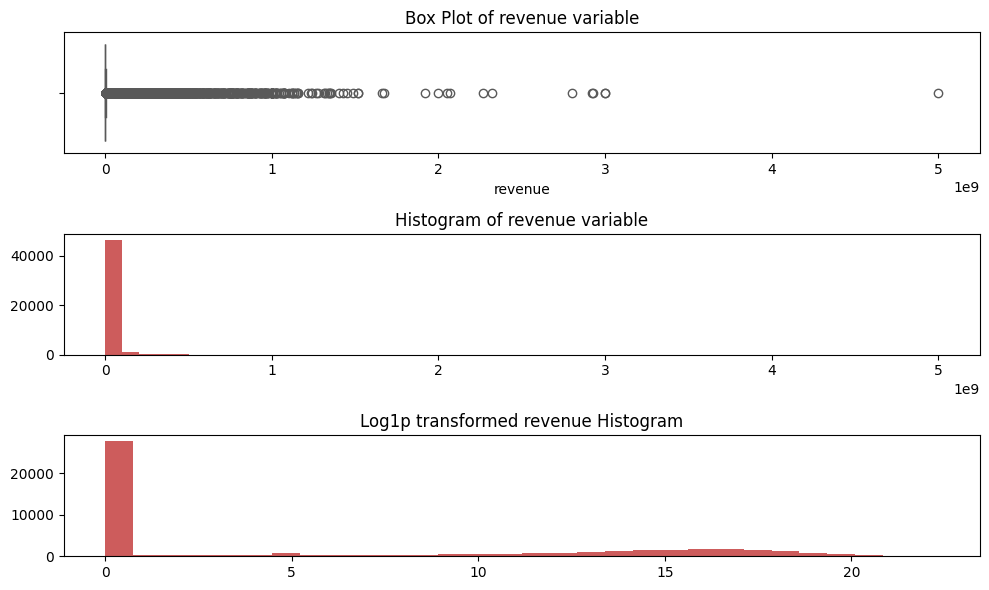

In [12]:
# Vẽ các đồ thị về doanh thu
f, ax = plt.subplots(3, figsize=(10, 6))
plt.rc('figure', figsize=(12, 8))

# Box plot doanh thu
sns.boxplot(x=data.revenue, ax=ax[0], color='indianred')
ax[0].set_title("Box Plot of revenue variable")

# Histogram doanh thu
ax[1].hist(data.revenue, bins=50, color='indianred', alpha=1)
ax[1].set_title("Histogram of revenue variable")

# Histogram của doanh thu sau khi áp dụng log1p
ax[2].hist(np.log1p(data.revenue), bins=30, color='indianred', alpha=1)
ax[2].set_title("Log1p transformed revenue Histogram")

# Căn chỉnh lại các đồ thị
f.tight_layout()

In [13]:
# Kiểm tra tỷ lệ phim có doanh thu dưới 1000$
print('Percentage of movie has revenue under 1000$: ', data[data['revenue'] <= 1000].shape[0] / data.shape[0] * 100)

# Kiểm tra tỷ lệ phim có doanh thu dưới 1000$ nhưng không phải là phim có doanh thu bằng 0
print('Percentage of movie has revenue under 1000$ without 0 revenue: ', data[(data['revenue'] > 0) & (data['revenue'] <= 1000)].shape[0] / data.shape[0] * 100)

Percentage of movie has revenue under 1000$:  64.10871633640839
Percentage of movie has revenue under 1000$ without 0 revenue:  7.698672072146611


Có rất nhiều giá trị cực kỳ thấp và không thực tế trong cột doanh thu. Đây là vấn đề có thể phải giải quyết sau và sẽ xem xét sau khi đã kiểm tra phần còn lại của dữ liệu


In [14]:
# Thêm đặc trưng 'revenue' vào danh sách đặc trưng số
num_features.append("revenue")

## Title

Cột này cho biết tiêu đề của bộ phim. Mặc dù việc kiểm tra nội dung của tiêu đề có thể rất thú vị nhưng việc đó nằm ngoài phạm vi của dự án này

In [15]:
# Kiểm tra số lượng phim thiếu tiêu đề
print('Movies missing a title:', data.title.isna().sum())

Movies missing a title: 2


In [16]:
# Xóa các bản ghi thiếu tiêu đề
data = data.dropna(subset=['title'])

In [17]:
# Thay thế giá trị thiếu trong tiêu đề bằng chuỗi rỗng
data.title.fillna('')

# Tạo cột 'title_len' lưu độ dài của tiêu đề
data['title_len'] = data.title.apply(lambda x: len(str(x)))

Chỉ nhìn vào độ dài của tiêu đề để xem liệu điều này có ảnh hưởng gì đến sức hút của bộ phim hay không. 

Có thể những tiêu đề ngắn hơn sẽ dễ nhớ hơn, giúp chúng hoạt động hiệu quả hơn hoặc có khả năng những tiêu đề dài hơn sẽ độc đáo và hấp dẫn hơn, khiến chúng thu hút nhiều người hơn.

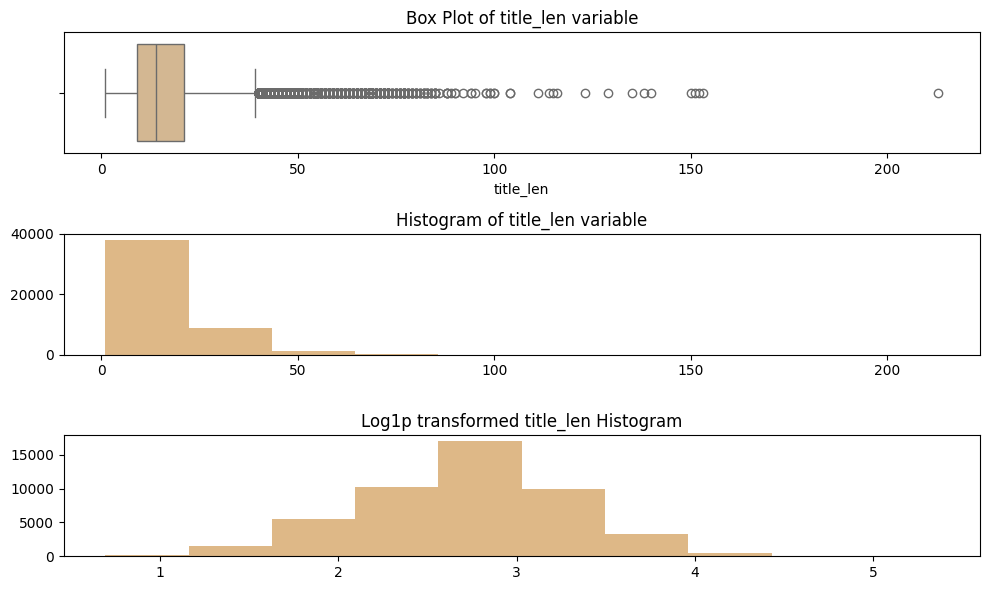

In [18]:
# Vẽ các đồ thị về độ dài tiêu đề
f, ax = plt.subplots(3, figsize=(10, 6))
plt.rc('figure', figsize=(12, 8))

# Box plot độ dài tiêu đề
sns.boxplot(x=data.title_len, ax=ax[0], color='burlywood')
ax[0].set_title("Box Plot of title_len variable")

# Histogram độ dài tiêu đề
ax[1].hist(data.title_len, color='burlywood', alpha=1)
ax[1].set_title("Histogram of title_len variable")

# Histogram của độ dài tiêu đề sau khi áp dụng log1p
ax[2].hist(np.log1p(data.title_len), color='burlywood', alpha=1)
ax[2].set_title("Log1p transformed title_len Histogram")

# Căn chỉnh lại các đồ thị
f.tight_layout()

C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Log Revenue vs log title_len')

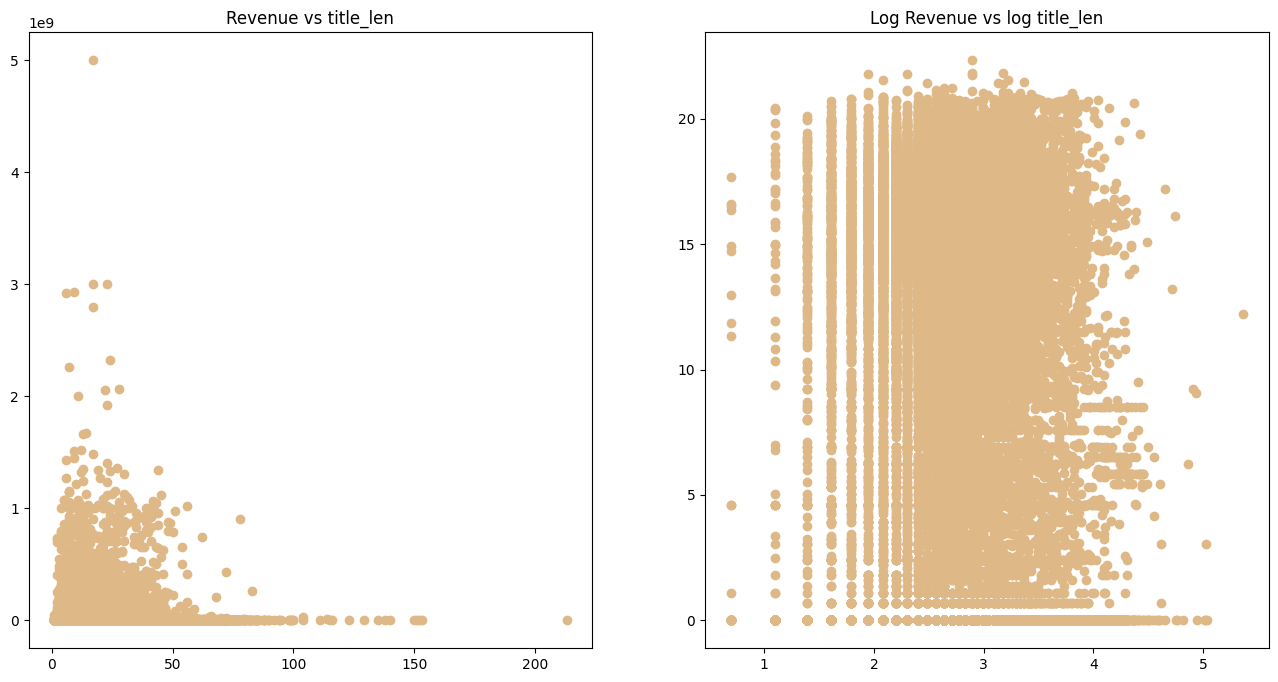

In [19]:
# Vẽ đồ thị quan hệ giữa độ dài tiêu đề và doanh thu
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['title_len'], data['revenue'], color='burlywood')
plt.title('Revenue vs title_len')

# Vẽ đồ thị quan hệ giữa log(Doanh thu) và log(Độ dài tiêu đề)
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['title_len']), np.log1p(data['revenue']), color='burlywood')
plt.title('Log Revenue vs log title_len')

In [20]:
# Tính toán hệ số tương quan Pearson giữa độ dài tiêu đề và doanh thu
corr, _ = pearsonr(data['title_len'], data['revenue'])
print('Pearsons correlation between title_len and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa log(Độ dài tiêu đề) và log(Doanh thu)
corr, _ = pearsonr(np.log1p(data['title_len']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed title_len and log transformed revenue: %.3f' % corr)

Pearsons correlation between title_len and revenue: 0.011
Pearsons correlation between log transformed title_len and log transformed revenue: nan


Có thể thấy rằng có rất ít mối tương quan giữa độ dài của tiêu đề và doanh thu của bộ phim nhưng quyết định vẫn đưa vào mô hình

In [21]:
# Thêm đặc trưng 'title_len' vào danh sách đặc trưng số
num_features.append('title_len')

## Vote Average

Cột này cho biết đánh giá trung bình của phim. Đánh giá trung bình phản ánh chất lượng của một bộ phim từ góc độ của cộng đồng người xem. 

Các bộ phim được đánh giá cao thường nhận được sự đánh giá tích cực từ cộng đồng, điều này có thể tạo ra một ấn tượng tích cực và thu hút nhiều người xem hơn

In [22]:
# Tính tỷ lệ phần trăm số phim có vote_average = 0
percentage_zero_vote_average = data[data['vote_average'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Vote average equal to 0: {percentage_zero_vote_average:.2f}%")

Percentage of Vote average equal to 0: 65.12%


Có thể thấy dữ liệu đánh giá trung bình 0 chiếm tỉ lệ rất lớn trong dữ liệu.

Việc thay thế các giá trị 0 này bằng giá trị trung bình hoặc trung vị sẽ làm ảnh hưởng đáng kể đến chất lượng của dữ liệu. Vì vậy quyết định loại bỏ những bộ phim có đánh giá trung bình bằng 0

In [23]:
# Loại bỏ các bản ghi có vote_average = 0
data = data[data['vote_average'] != 0]

In [24]:
# Tính toán hệ số tương quan Pearson giữa vote_average và revenue
corr, _ = pearsonr(data['vote_average'], data['revenue'])
print('Pearsons correlation between vote_average and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa log biến vote_average và revenue
corr, _ = pearsonr(np.log1p(data['vote_average']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed vote_average and log transformed revenue: %.3f' % corr)

Pearsons correlation between vote_average and revenue: 0.094
Pearsons correlation between log transformed vote_average and log transformed revenue: nan


Quan sát thấy mối tương quan tương đối giữa đánh giá trung bình và doanh thu của một bộ phim, vì vậy sẽ rất hữu ích nếu đưa vào mô hình

In [25]:
# Thêm 'vote_average' vào danh sách đặc trưng số
num_features.append("vote_average")

## Vote Count

Cột này cho biết số lượt đánh giá của bộ phim. Số lượt đánh giá của một bộ phim có thể được xem xét là một thuộc tính quan trọng, đặc biệt là nếu nó là một con số lớn. 

Một bộ phim thu hút nhiều lượt đánh giá có thể chỉ ra rằng nó đã tạo ra sự quan tâm và tiếp cận rộng rãi từ cộng đồng người xem, không quan trọng là đánh giá tích cực hay tiêu cực. 

Vì vậy, quyết định đưa thuộc tính này vào trong mô hình

In [26]:
# Tính tỷ lệ phần trăm số phim có vote_count = 0
percentage_zero_vote_count = data[data['vote_count'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Vote count equal to 0: {percentage_zero_vote_count:.2f}%")

Percentage of Vote count equal to 0: 0.02%


Số bộ phim có số lượt đánh giá bằng 0 là không đáng kể nên sẽ quyết định loại bỏ chúng ra khỏi bộ dữ liệu

In [27]:
# Loại bỏ các bản ghi có vote_count = 0
data = data[data['vote_count'] != 0]

In [28]:
# Tính toán hệ số tương quan Pearson giữa vote_count và revenue
corr, _ = pearsonr(data['vote_count'], data['revenue'])
print('Pearsons correlation between vote_count and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa log biến vote_count và revenue
corr, _ = pearsonr(np.log1p(data['vote_count']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed vote_count and log transformed revenue: %.3f' % corr)

Pearsons correlation between vote_count and revenue: 0.731
Pearsons correlation between log transformed vote_count and log transformed revenue: nan


Quan sát thấy mối tương quan tương đối giữa số lượt đánh giá và doanh thu của một bộ phim, vì vậy sẽ rất hữu ích nếu đưa vào mô hình

In [29]:
# Thêm 'vote_count' vào danh sách đặc trưng số
num_features.append("vote_count")

## Status

Cột này thể hiện trạng thái hiện tại của bộ phim. Như dữ liệu đã lọc từ phần Revenue, những bộ phim đã ra mắt sẽ có doanh thu lớn hơn 0, trong khi những bộ phim chưa ra mắt sẽ có doanh thu bằng 0. 

Vì vậy, quyết định thêm thuộc tính này vào mô hình để nó có thể học được mối liên hệ giữa việc đã ra mắt và doanh thu của một bộ phim

In [30]:
# Kiểm tra phân phối các giá trị trong cột 'status'
data['status'].value_counts()

status
Released           16781
Planned               35
In Production         13
Post Production       12
Rumored               11
Canceled               5
Name: count, dtype: int64

In [31]:
# Chuyển đổi cột 'status' thành dạng nhị phân (1 nếu 'Released', 0 nếu không)
data['status'] = data['status'].map(lambda x: 1 if (x == 'Released') else 0)

In [32]:
# Thêm 'status' vào danh sách đặc trưng phân loại
cat_features.append('status')

## Release Date

Cột này thể hiện ngày đầu tiên bộ phim được phát hành tại rạp. 

Những thứ như thời gian trong năm, ngày trong tuần, mùa, v.v. đều có thể được lấy từ dữ liệu phát hành và tất cả đều có thể quan trọng đối với việc một bộ phim được kỳ vọng sẽ thành công như thế nào ở rạp.

In [33]:
# Kiểm tra giá trị đầu tiên của cột 'release_date'
data['release_date'].head(10)

id
27205     2010-07-15
157336    2014-11-05
155       2008-07-16
19995     2009-12-15
24428     2012-04-25
293660    2016-02-09
299536    2018-04-25
550       1999-10-15
118340    2014-07-30
680       1994-09-10
Name: release_date, dtype: object

Bắt đầu bằng một số bước xử lý trước bằng cách sử dụng datetime để thao tác dữ liệu.

In [34]:
# Loại bỏ các bản ghi thiếu giá trị 'release_date'
data = data.loc[~data['release_date'].isnull()].copy()

# Chuyển đổi cột 'release_date' thành kiểu dữ liệu datetime
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

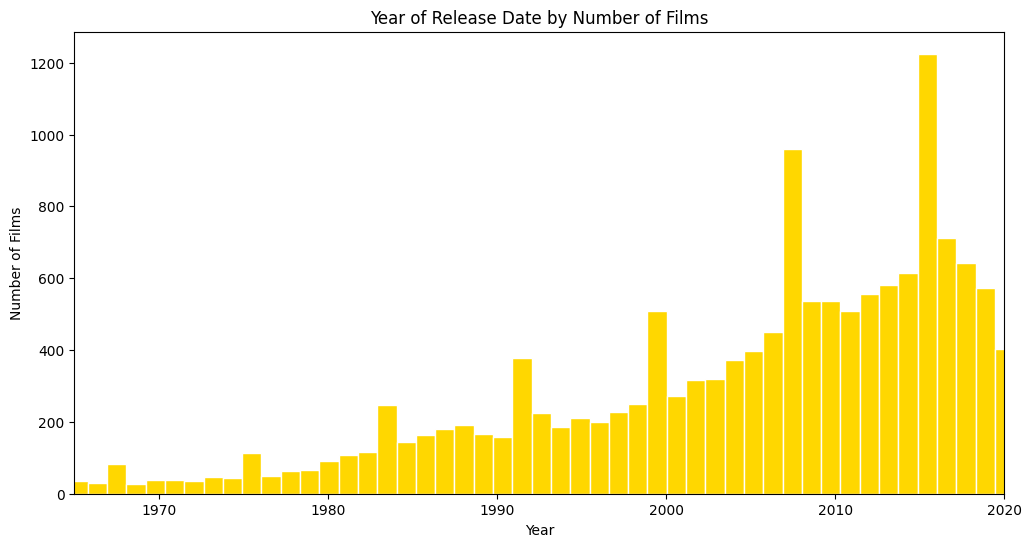

In [35]:
# Vẽ biểu đồ phân phối năm phát hành của các bộ phim
plt.figure(figsize=(12, 6))
plt.hist(data['release_date'].dt.year, bins=99, color='gold', alpha=1, edgecolor='white')
plt.xlim(1965, 2020)
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.title("Year of Release Date by Number of Films") 
plt.show()

Biểu đồ về năm phát hành của tập dữ liệu cho thấy sự gia tăng chung về số lượng phim theo thời gian, điều này có ý nghĩa đối với một ngành đang phát triển. 

Trong khi chủ yếu là tuyến tính, tuy nhiên, sự xuất hiện của một số đỉnh cao bất thường có thể đề xuất sự kiện đặc biệt hoặc những năm có tăng trưởng đột phá so với xu hướng chung. 

Việc tìm ra mối quan hệ giữa những năm có số lượng phim trên trung bình và doanh thu có thể là một hướng điều tra thú vị.

([<matplotlib.axis.XTick at 0x2982ea2a990>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

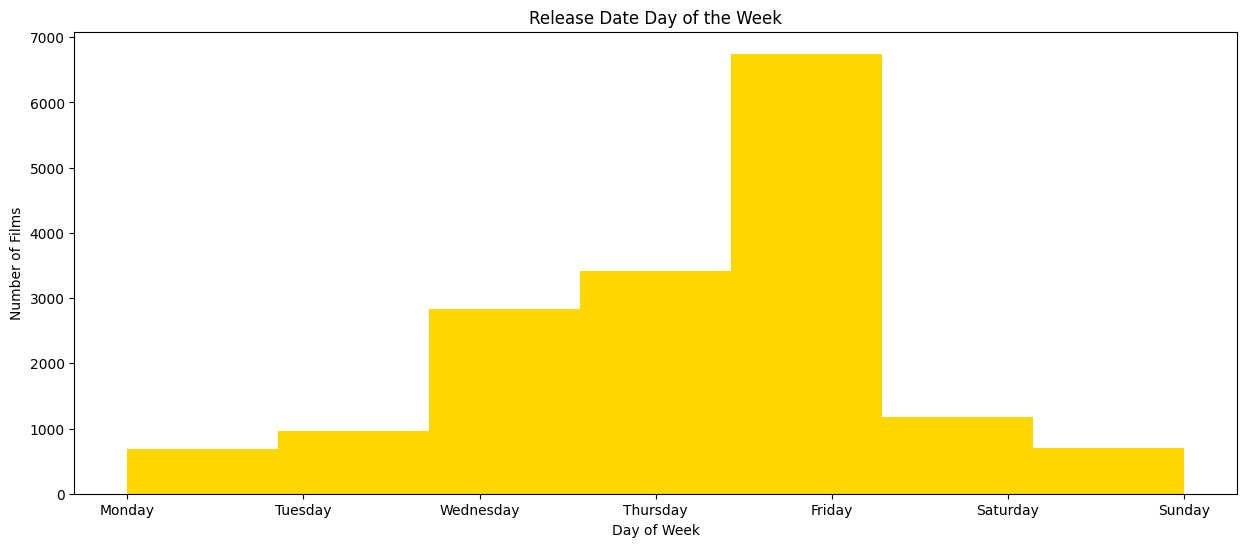

In [36]:
# Vẽ biểu đồ phân phối ngày trong tuần phát hành của các bộ phim
plt.rc('figure', figsize=(15, 6))
plt.hist(data['release_date'].dt.dayofweek, bins=7, color='gold', alpha=1)
plt.xlabel("Day of Week")
plt.ylabel("Number of Films")
plt.title("Release Date Day of the Week")

# Gán nhãn cho các ngày trong tuần
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), labels)

Dữ liệu ngày trong tuần cho thấy sự khác biệt rõ ràng về số phim phát hành vào Thứ Sáu, điều này rõ ràng có phần gắn liền với thời điểm kết thúc tuần làm việc từ Thứ Hai đến Thứ Sáu thông thường, có thể giải thích bởi thói quen của khán giả nghỉ ngơi vào cuối tuần. 

Việc phát hành phim dự kiến ​​sẽ tuân theo các mô hình thị trường có lợi nhất cho phim, vì vậy có giả thuyết rằng ngày phát hành vào thứ Sáu sẽ có tác động tích cực đến doanh thu (và theo tổng doanh thu phòng vé). 

Thật bất ngờ, ngày phát hành thứ Bảy thậm chí còn thấp hơn thứ Ba, thứ Tư và thứ Năm - có lẽ việc ra mắt phim vào các ngày trước đó trong tuần có thể giúp phim tiếp cận được nhiều khán giả hơn, khán giả có thể quan tâm đến các bộ phim mới và có thể lựa chọn xem chúng vào cuối tuần.

Text(0.5, 1.0, 'Release Date Day of the Year')

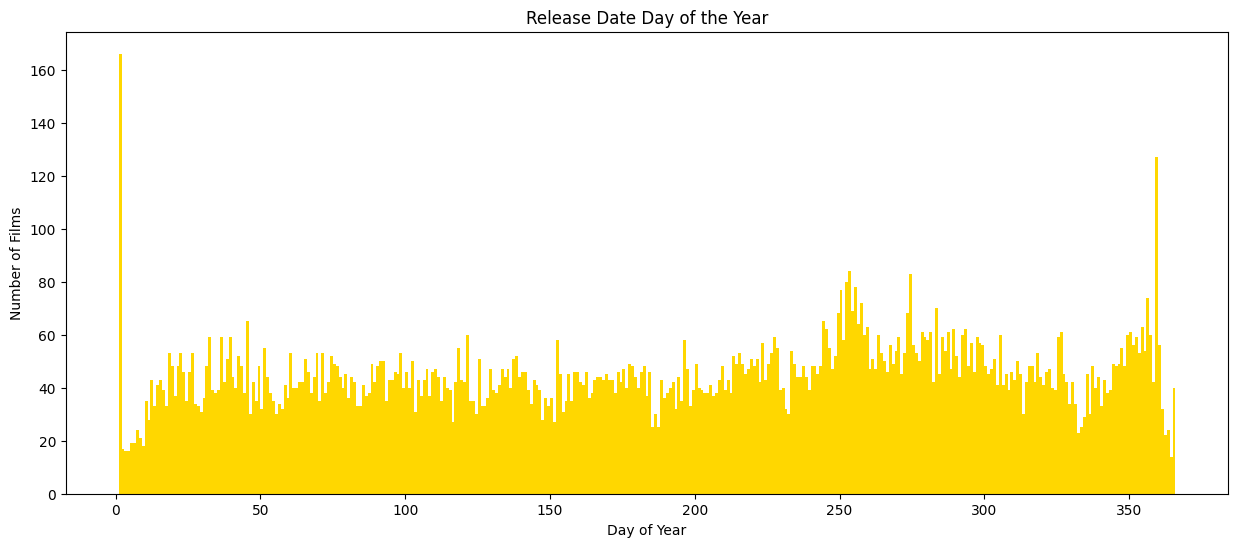

In [37]:
# Vẽ biểu đồ phân phối ngày trong năm phát hành của các bộ phim
plt.rc('figure', figsize=(15,6))
plt.hist(data['release_date'].dt.dayofyear, bins=365, color='gold', alpha=1)
plt.xlabel("Day of Year")
plt.ylabel("Number of Films")
plt.title("Release Date Day of the Year")

Dữ liệu về ngày trong năm có vẻ đồng đều, nhưng nhìn chung, có một số ngày có số lượng phim đặc biệt nhiều. 

Cụ thể, ngày phát hành vào Giáng Sinh và Ngày Tết được biết đến như là những lựa chọn phổ biến. Việc ra mắt phim vào những ngày này có thể là do truyền thống hoặc có thể mang lại lợi nhuận cao, điều này sẽ được xem xét kỹ hơn trong các phần khám phá dữ liệu sau.

Ngoài ra, có một lượng lớn phim được ra mắt vào tháng Chín. Nghiên cứu thêm cho thấy tháng Tám và Tháng Chín thường được gọi là "dump months" khi kỳ vọng thương mại và phê bình của các nhà làm phim và nhà phân phối giảm xuống đối với hầu hết các phim chiếu rạp mới, có dàn diễn viên ít nổi tiếng, hoặc không dễ dàng quảng bá. Điều này có thể liên quan đến việc trẻ em quay lại học sau mùa hè, cùng với các dấu hiệu khác về một giai đoạn suy thoái của ngành công nghiệp điện ảnh. 

Do đó, việc có nhiều phim ra mắt có thể tích cực trong một số trường hợp và tiêu cực trong những trường hợp khác. Ngược lại, những giai đoạn có ít phim ra mắt có thể do sự xuất hiện của một bộ phim lớn (khi các hãng phim muốn giảm cạnh tranh trong doanh thu phòng vé).

Text(0.5, 1.0, 'Release Date Month of the Year')

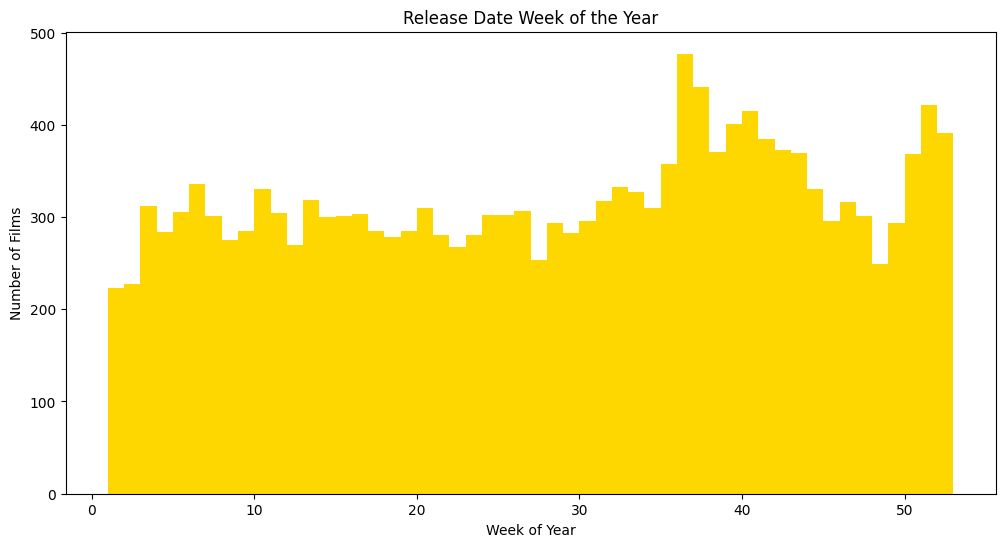

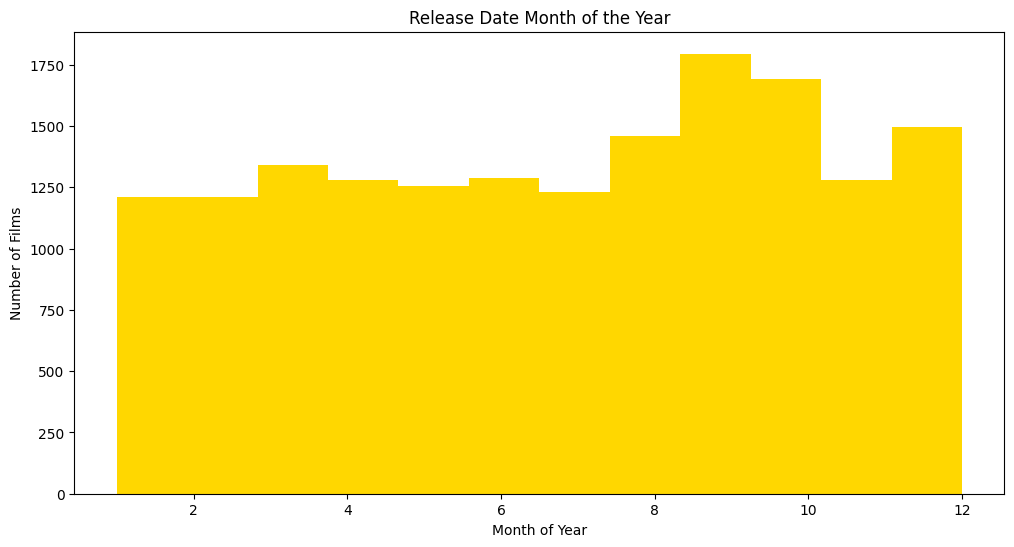

In [38]:
# Vẽ biểu đồ phân phối tuần trong năm phát hành của các bộ phim
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.hist(data['release_date'].dt.isocalendar().week, bins=52, color='gold', alpha=1)
ax1.set_xlabel("Week of Year")
ax1.set_ylabel("Number of Films")
ax1.set_title("Release Date Week of the Year")

# Vẽ biểu đồ phân phối tháng trong năm phát hành của các bộ phim
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.hist(data['release_date'].dt.month, bins=12, color='gold', alpha=1)
ax2.set_xlabel("Month of Year")
ax2.set_ylabel("Number of Films")
ax2.set_title("Release Date Month of the Year")

Tương tự với dữ liệu về ngày trong năm, dữ liệu về tuần trong năm cho thấy số lượng phim cao nhất vào cuối tháng Tám và đầu tháng Chín, trong những tháng được biết đến là "dump months" Điều này có vẻ không phản ánh mối tương quan tích cực với doanh thu. 

Đỉnh thứ hai vào tháng Mười Hai có thể có doanh thu phòng vé tốt hơn do sự ưa chuộng của việc đi xem phim trong kỳ nghỉ lễ. Mùa thu cuối và mùa đông thường được xem là mùa bắt đầu của Mùa Oscar, có thể đồng nghĩa với việc ra mắt các bộ phim có doanh thu cao mặc dù số lượng phim có thể không nhiều.

Do đó, có thể giả định rằng số lượng phim ra mắt trong một tuần cụ thể của năm không quan trọng bằng các đặc điểm của tuần đó liên quan đến các chu kỳ của ngành công nghiệp điện ảnh.

C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\3262862708.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  dx.set_xticklabels(dx.get_xticklabels(), rotation=90)


[Text(0, 0, '1911'),
 Text(1, 0, '1913'),
 Text(2, 0, '1914'),
 Text(3, 0, '1915'),
 Text(4, 0, '1916'),
 Text(5, 0, '1918'),
 Text(6, 0, '1919'),
 Text(7, 0, '1920'),
 Text(8, 0, '1921'),
 Text(9, 0, '1922'),
 Text(10, 0, '1923'),
 Text(11, 0, '1924'),
 Text(12, 0, '1925'),
 Text(13, 0, '1926'),
 Text(14, 0, '1927'),
 Text(15, 0, '1928'),
 Text(16, 0, '1929'),
 Text(17, 0, '1930'),
 Text(18, 0, '1931'),
 Text(19, 0, '1932'),
 Text(20, 0, '1933'),
 Text(21, 0, '1934'),
 Text(22, 0, '1935'),
 Text(23, 0, '1936'),
 Text(24, 0, '1937'),
 Text(25, 0, '1938'),
 Text(26, 0, '1939'),
 Text(27, 0, '1940'),
 Text(28, 0, '1941'),
 Text(29, 0, '1942'),
 Text(30, 0, '1943'),
 Text(31, 0, '1944'),
 Text(32, 0, '1945'),
 Text(33, 0, '1946'),
 Text(34, 0, '1947'),
 Text(35, 0, '1948'),
 Text(36, 0, '1949'),
 Text(37, 0, '1950'),
 Text(38, 0, '1951'),
 Text(39, 0, '1952'),
 Text(40, 0, '1953'),
 Text(41, 0, '1954'),
 Text(42, 0, '1955'),
 Text(43, 0, '1956'),
 Text(44, 0, '1957'),
 Text(45, 0, '1958')

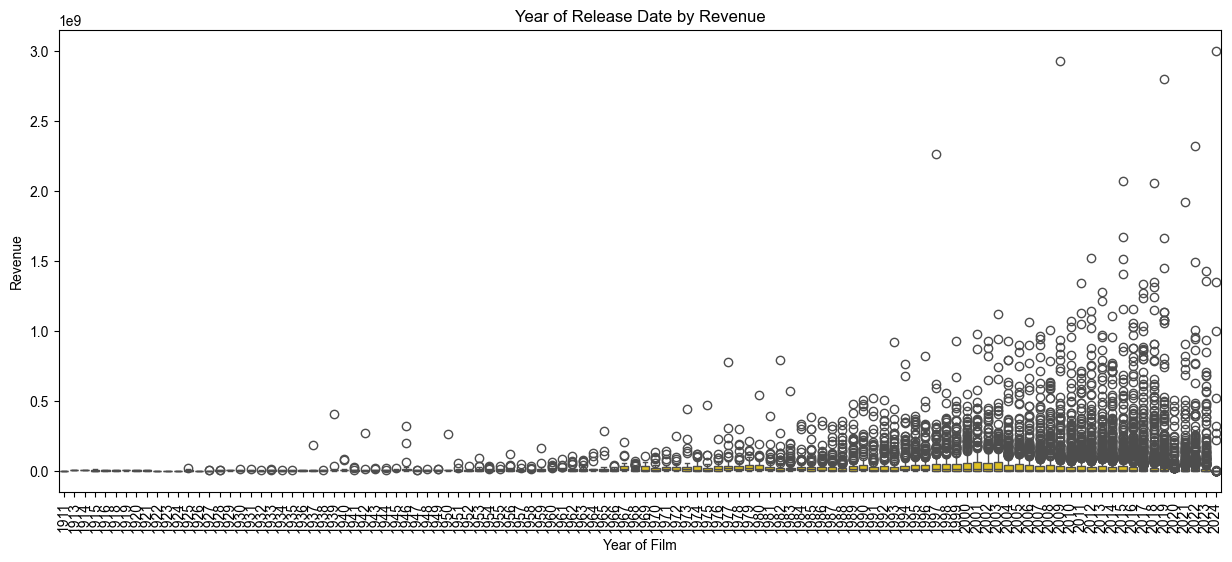

In [39]:
# Biểu đồ boxplot giữa năm phát hành và doanh thu
fig, dx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.year, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 20)})
dx.set_xlabel("Year of Film")
dx.set_ylabel("Revenue")
dx.set_title("Year of Release Date by Revenue")
dx.set_xticklabels(dx.get_xticklabels(), rotation=90)

Doanh thu của phim thường tăng qua từng năm, có năm cao hơn đáng kể so với những năm khác. Năm 2020 và 2021 chứng kiến sự sụt giảm về mặt doanh thu do đại dịch Covid 19

C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\3520842129.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ex.set_xticklabels(labels)


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

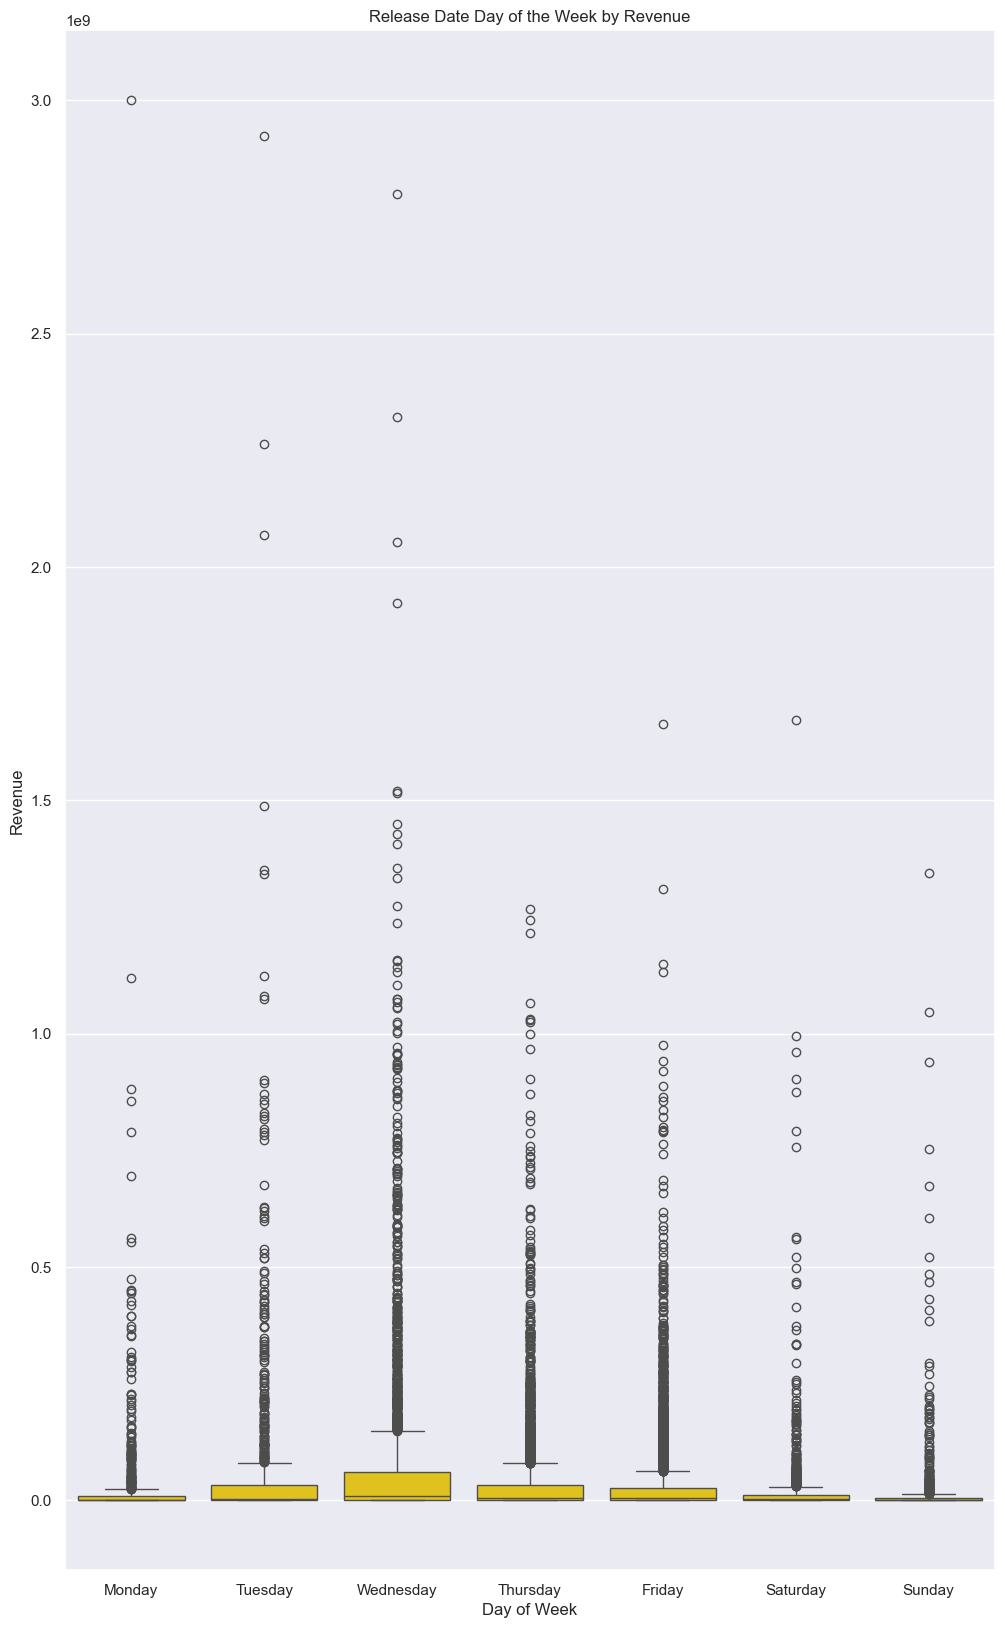

In [40]:
# Biểu đồ boxplot giữa ngày trong tuần và doanh thu
fig, ex = plt.subplots()
sns.boxplot(x=data['release_date'].dt.dayofweek, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})
ex.set_xlabel("Day of Week")
ex.set_ylabel("Revenue")
ex.set_title("Release Date Day of the Week by Revenue")

# Thay đổi nhãn cho các ngày trong tuần
labels = [item.get_text() for item in ex.get_xticklabels()]
labels[0] = 'Monday'
labels[1] = 'Tuesday'
labels[2] = 'Wednesday'
labels[3] = 'Thursday'
labels[4] = 'Friday'
labels[5] = 'Saturday'
labels[6] = 'Sunday'
ex.set_xticklabels(labels)

Đáng ngạc nhiên, mặc dù có giả định rằng thứ Sáu là ngày phát hành phổ biến nhất do có lợi ích tài chính, thì thực tế ngày thứ Tư (tiếp theo là thứ Ba và thứ Năm) lại mang lại doanh thu cao nhất. 

Sẽ rất thú vị khi điều tra lý do tại sao lại như vậy, nhưng dù sao đi nữa, nó sẽ giúp cung cấp thông tin cho mô hình.

Text(0.5, 1.0, 'Release Date Day of the Year by Revenue')

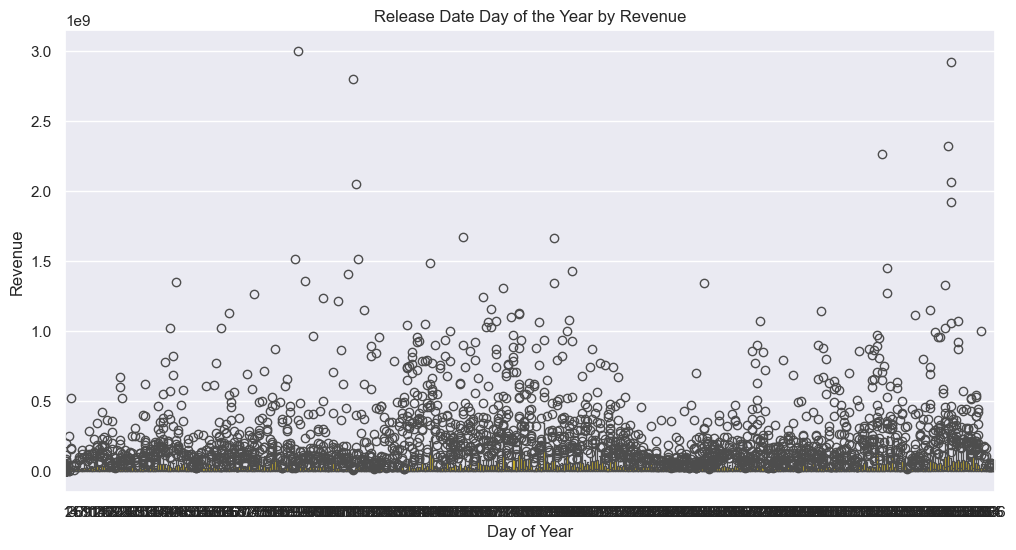

In [41]:
# Biểu đồ boxplot giữa ngày trong năm và doanh thu
fig, fx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.dayofyear, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})
fx.set_xlabel("Day of Year")
fx.set_ylabel("Revenue")
fx.set_title("Release Date Day of the Year by Revenue")

Rất khó để trình bày lượng dữ liệu khổng lồ theo biểu đồ phân tích hai biến doanh thu và ngày phát hành.

Text(0.5, 1.0, 'Release Date Week of the Year by Revenue')

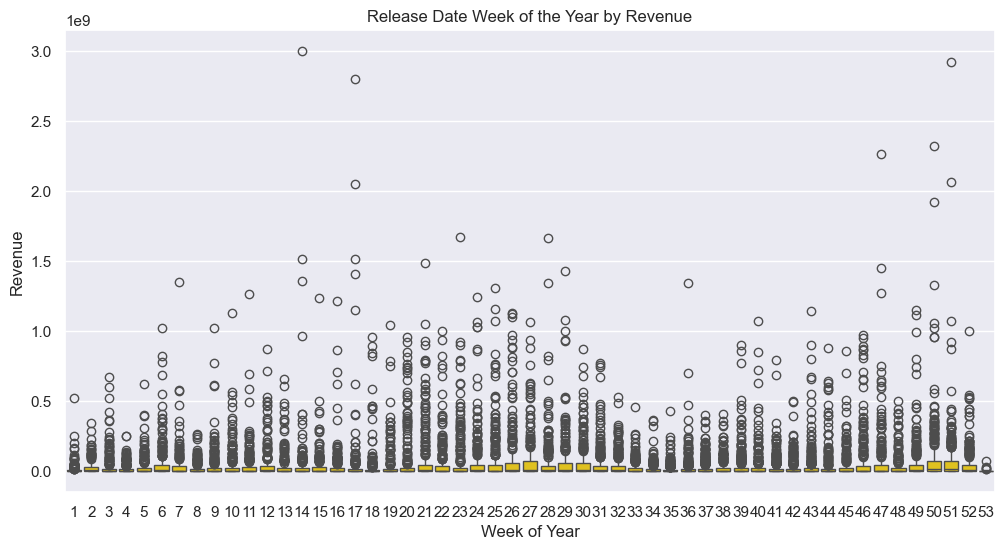

In [42]:
# Biểu đồ boxplot giữa tuần trong năm và doanh thu
fig, gx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.isocalendar().week, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})
gx.set_xlabel("Week of Year")
gx.set_ylabel("Revenue")
gx.set_title("Release Date Week of the Year by Revenue")

Doanh thu trong các tuần trong năm khá phù hợp với kết quả dự kiến ​​từ phân tích trước đó, trong đó các tuần trước kỳ nghỉ lễ có doanh thu tương đối cao. 

Ngoài ra còn có mùa cao điểm giữa hè đáng chú ý là vào tháng 6 (tuần thứ 24-27 trong năm).

Text(0.5, 1.0, 'Release Date Month by Revenue')

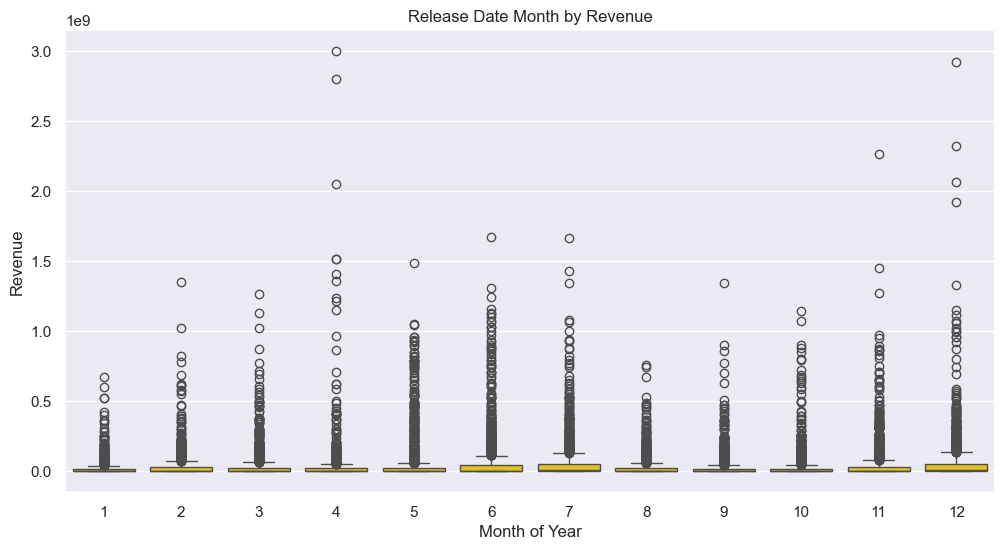

In [43]:
# Biểu đồ boxplot giữa tháng trong năm và doanh thu
fig, hx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.month, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})
hx.set_xlabel("Month of Year")
hx.set_ylabel("Revenue")
hx.set_title("Release Date Month by Revenue")

Tương tự như trên, các tháng trong năm cũng có xu hướng tương tự. Những tháng giữa hè thành công dù không nhiều về mặt phát hành, trong khi những tháng đầu năm học có số lượng phim nhiều hơn và doanh thu thấp hơn đáng kể. 

Kỳ nghỉ lễ vào tháng 12 cho thấy số lượng phim phát hành nhiều hơn và đồng thời doanh thu cũng cao hơn.

In [44]:
# Tạo các cột thông tin liên quan đến ngày tháng
from datetime import datetime
data["month"] = data["release_date"].dt.month
data["year"] = data["release_date"].dt.year
data["day_of_week"] = data["release_date"].dt.dayofweek + 1
data["week_of_year"] = data["release_date"].dt.isocalendar().week

# Hiển thị các cột liên quan đến ngày tháng
data[["release_date", "month", "year", "day_of_week", "week_of_year"]].head()

release_date  month  year  day_of_week  week_of_year
id                                                         
27205    2010-07-15      7  2010            4            28
157336   2014-11-05     11  2014            3            45
155      2008-07-16      7  2008            3            29
19995    2009-12-15     12  2009            2            51
24428    2012-04-25      4  2012            3            17

In [45]:
# Kiểm tra xem có giá trị NaN trong cột 'year' không
data['year'].isnull().sum()

np.int64(0)

In [46]:
# Tính toán hệ số tương quan Pearson giữa năm phát hành và doanh thu
corr, _ = pearsonr(data['year'], data['revenue'])
print('Pearsons correlation between year and revenue: %.3f' % corr)
print()

# Tính toán hệ số tương quan Pearson giữa tháng phát hành và doanh thu
corr, _ = pearsonr(data['month'], data['revenue'])
print('Pearsons correlation between month and revenue: %.3f' % corr)
print()

# Tính toán hệ số tương quan Pearson giữa tuần phát hành và doanh thu
corr, _ = pearsonr(data['week_of_year'], data['revenue'])
print('Pearsons correlation between week_of_year and revenue: %.3f' % corr)
print()

Pearsons correlation between year and revenue: 0.073

Pearsons correlation between month and revenue: 0.029

Pearsons correlation between week_of_year and revenue: 0.028



Dường như có rất ít mối tương quan với doanh thu đối với bất kỳ biến nào được trích xuất từ ​​ngày phát hành, tuy nhiên, sẽ đưa tất cả chúng vào mô hình vì không thể loại trừ mối quan hệ chỉ dựa trên Pearsons correlation. 

Thay vì sử dụng các biến này làm số liệu, nên tạo một số biến giả để thể hiện tốt hơn các khía cạnh liên quan của ngày phát hành. Có thể sử dụng các cột đã tạo của ngày cập nhật này để tạo một số biến mới. Sẽ không có nhiều ý nghĩa nếu coi năm là một biến liên tục và log biến đổi nó, vì vậy sẽ tốt hơn nếu nắm bắt một cách chính xác, cùng với mùa và ngày trong tuần

In [47]:
# Lọc ra bộ phim có năm phát hành nhỏ nhất
data.loc[data['year'].idxmin(), ['title', 'year', 'revenue']]

title      Water, Klimaat en Film
year                         1911
revenue                         1
Name: 1180455, dtype: object

Vì bộ phim đầu tiên trong tập dữ liệu của chúng tôi có từ năm 1911 nên sẽ chia năm thành các thập kỷ, bắt đầu từ những 1910s đến 2020s.

In [48]:
# Tạo các cột nhãn cho từng thập kỷ
for decade in range(1910, 2030, 10):
    print(decade)

# Thêm các cột nhãn cho từng thập kỷ
for decade in range(1910, 2030, 10):
    data[f'{decade}s'] = data['year'].map(lambda x: 1 if (x >= decade and x <= decade + 9) else 0)

1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020


In [49]:
# Kiểm tra phân phối giá trị của 'day_of_week'
data['day_of_week'].value_counts()

day_of_week
5    6747
4    3421
3    2840
6    1179
2     957
7     701
1     692
Name: count, dtype: int64

Như đã thấy trước đó, phim thường được phát hành vào thứ Sáu, tuy nhiên đây không phải là ngày có doanh thu cao nhất trong tuần. 

Vì vậy, có thể tạo một thuộc tính cho mỗi ngày trong tuần vì thứ có thể hữu ích theo những cách khác nhau đối với mô hình.

In [50]:
# Tạo các cột nhãn cho từng ngày trong tuần
day_of_week_idx = {2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday', 8: 'Sunday'}
for day_of_week in range(2, 9):
    data[f'{day_of_week_idx[day_of_week]}Release'] = data['day_of_week'].map(lambda x: 1 if (x == day_of_week) else 0)

Các mùa cũng đóng một vai trò quan trọng trong ngành điện ảnh. Rất nhiều bom tấn đình đám ra mắt vào mùa hè nên có lẽ điều này sẽ rất có ý nghĩa. 

Cũng sẽ chia các bộ phim theo mùa mà chúng được phát hành dưới dạng các thuộc tính.

In [51]:
# Tạo các cột nhãn cho các mùa trong năm
season_idx = {1: 'Spring', 4: 'Summer', 7: 'Fall', 10: 'Winter'}
for season in range(1, 13, 3):
    data[f'{season_idx[season]}'] = data['month'].map(lambda x: 1 if (x >= season and x <= season + 2) else 0)

In [52]:
# Thêm các cột phân loại vào danh sách các đặc trưng phân loại
cat_features.append('1960s')
cat_features.append('1970s')
cat_features.append('1980s')
cat_features.append('1990s')
cat_features.append('2000s')
cat_features.append('2010s')
cat_features.append('MondayRelease')
cat_features.append('TuesdayRelease')
cat_features.append('WednesdayRelease')
cat_features.append('ThursdayRelease')
cat_features.append('FridayRelease')
cat_features.append('SaturdayRelease')
cat_features.append('SundayRelease')
cat_features.append('Winter')
cat_features.append('Fall')
cat_features.append('Spring')
cat_features.append('Summer')

## Runtime

Cột này biểu thị thời lượng của phim tính bằng phút. Thời lượng phim có thể có tác động đến doanh thu vì có thể những phim bị cho là "quá ngắn" hoặc "quá dài" có thể nhận được ít lượng người xem hơn.

In [53]:
# Kiểm tra số lượng bộ phim thiếu thông tin 'runtime'
print('Movies missing a runtime:', data.runtime.isna().sum())

Movies missing a runtime: 0


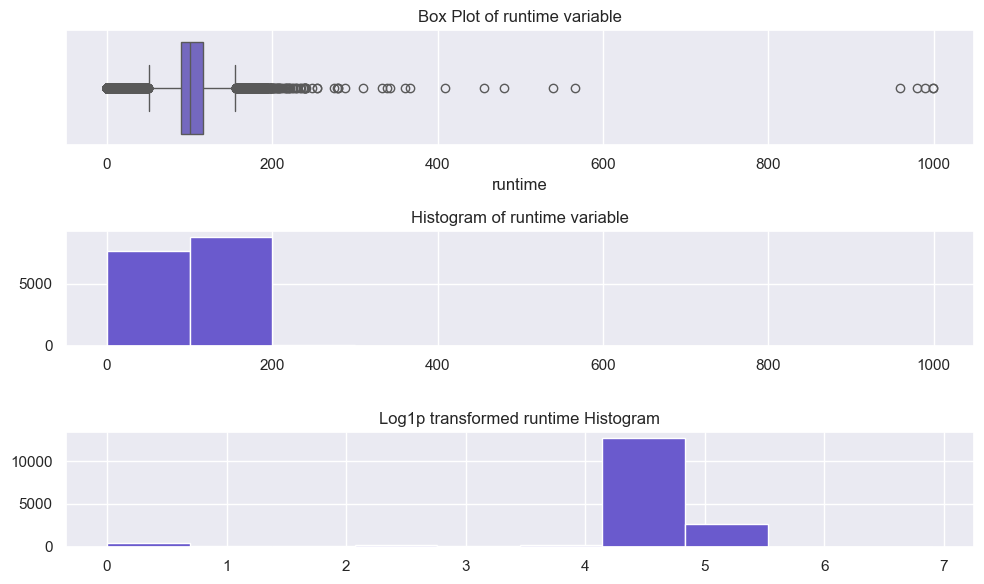

In [54]:
# Vẽ các biểu đồ phân tích dữ liệu của cột 'runtime'
f, ax = plt.subplots(3, figsize=(10,6))

# Cài đặt kích thước biểu đồ
sns.set(rc={'figure.figsize':(12,8)})

# Biểu đồ boxplot của 'runtime'
sns.boxplot(x=data.runtime, ax = ax[0], color='slateblue')
ax[0].set_title("Box Plot of runtime variable")

# Biểu đồ histogram của 'runtime'
ax[1].hist(data.runtime, color='slateblue', alpha=1)
ax[1].set_title("Histogram of runtime variable")

# Biểu đồ histogram của 'runtime' sau khi áp dụng log1p
ax[2].hist(np.log1p(data.runtime), color='slateblue', alpha=1)
ax[2].set_title("Log1p transformed runtime Histogram")

# Sắp xếp và hiển thị các bộ phim có 'runtime' lớn hơn 300
f.tight_layout()

Sự phân bổ thời gian chạy có vẻ khá tốt, nhưng chúng ta có thể thấy khá nhiều điểm ngoại lệ ở bên phải. 

Việc đổi sang log sẽ giúp giải quyết các ngoại lệ này, nhưng có một số ngoại lệ đặc biệt trên 300 phút(5 tiếng). Sẽ kiểm tra ngoại lệ này một cách cụ thể

In [55]:
# Lọc bỏ các bộ phim có thời gian runtime lớn hơn 300 phút
data.loc[data['runtime'] > 300, ['title', 'runtime', 'revenue']]

title  runtime    revenue
id                                                                            
11659                                    The Best of Youth      366    2693053
43434                                               Carlos      339     871279
42044                                                Shoah      566      20175
42536                                             Napoléon      333      39448
44825                                             Live Aid      960  150000000
255615                                  River of Fundament      310      44840
1309787                                            Big Gap      980          6
1305464                                God of War Ragnarok      999  469000000
1305448                                         God of War      999  135395253
1233925                                           The Bear      540   20000000
1280118                                              OMORI      990         19
1168032              One Copyright Strike to Rule Them All      409        100
787838                           2019: A Cinematic Odyssey      480     100000
1267491                                        Killing Eve      343   23500000
1229874  The Life and Times of Jimmy Derekson Volume Three      456        100
144800                    Jorge Cervante's Ultimate Grow 2      360        100

Những bộ phim dài trên 300 phút tức là hơn 5 tiếng. Những bộ phim này dài một cách vô lý và thậm chí còn không đạt thành tích đặc biệt ở phòng vé, vì vậy việc giữ lại điểm dữ liệu này không mang lại lợi ích gì cho mô hình của chúng tôi. 

Sẽ loại bỏ những bộ phim này


In [56]:
data = data[data['runtime'] <= 300]

In [57]:
# Kiểm tra số lượng bộ phim có 'runtime' bằng 0
data[data['runtime'] == 0].shape[0]

492

Có 486 bộ phim có thời gian chạy được liệt kê là 0 trong tập dữ liệu, đây cũng là một ngoại lệ rõ ràng vì sẽ không có phim nào có thời gian chạy thực sự là 0. 

Sẽ thay thế các giá trị này bằng giá trị trung bình của thời gian chạy khác 0.

In [58]:
# Tính giá trị trung vị của 'runtime' (trừ các giá trị bằng 0)
median = data.loc[data['runtime'] > 0, 'runtime'].median()

# Thay thế các giá trị 'runtime' bằng 0 bằng giá trị trung vị
data["runtime_processed"] = data["runtime"].mask(data["runtime"] == 0, median)

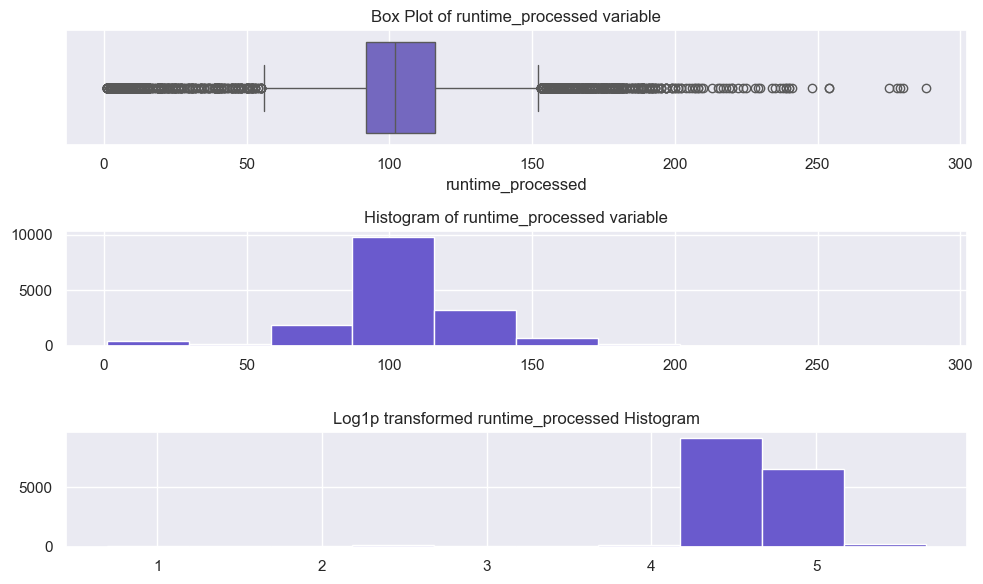

In [59]:
# Vẽ các biểu đồ phân tích dữ liệu của cột 'runtime_processed'
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})

# Boxplot của 'runtime_processed'
sns.boxplot(x=data.runtime_processed, ax = ax[0], color='slateblue')
ax[0].set_title("Box Plot of runtime_processed variable")

# Histogram của 'runtime_processed'
ax[1].hist(data.runtime_processed, color='slateblue', alpha=1)
ax[1].set_title("Histogram of runtime_processed variable")

# Histogram của 'runtime_processed' sau khi áp dụng log1p
ax[2].hist(np.log1p(data.runtime_processed), color='slateblue', alpha=1)
ax[2].set_title("Log1p transformed runtime_processed Histogram")

f.tight_layout()

Tiếp tục loại bỏ các bộ phim có thời lượng chiếu ít hơn 50 phút. Mặc dù đó là các bộ phim ngắn nhưng việc giữ lại các điểm dữ liệu này sẽ ảnh hưởng đến phân phối của dữ liệu

In [60]:
# Lọc bỏ các bộ phim có 'runtime_processed' dưới 50 phút
data = data[data["runtime_processed"] >= 50]

Text(0.5, 1.0, 'Log Revenue vs log runtime_processed')

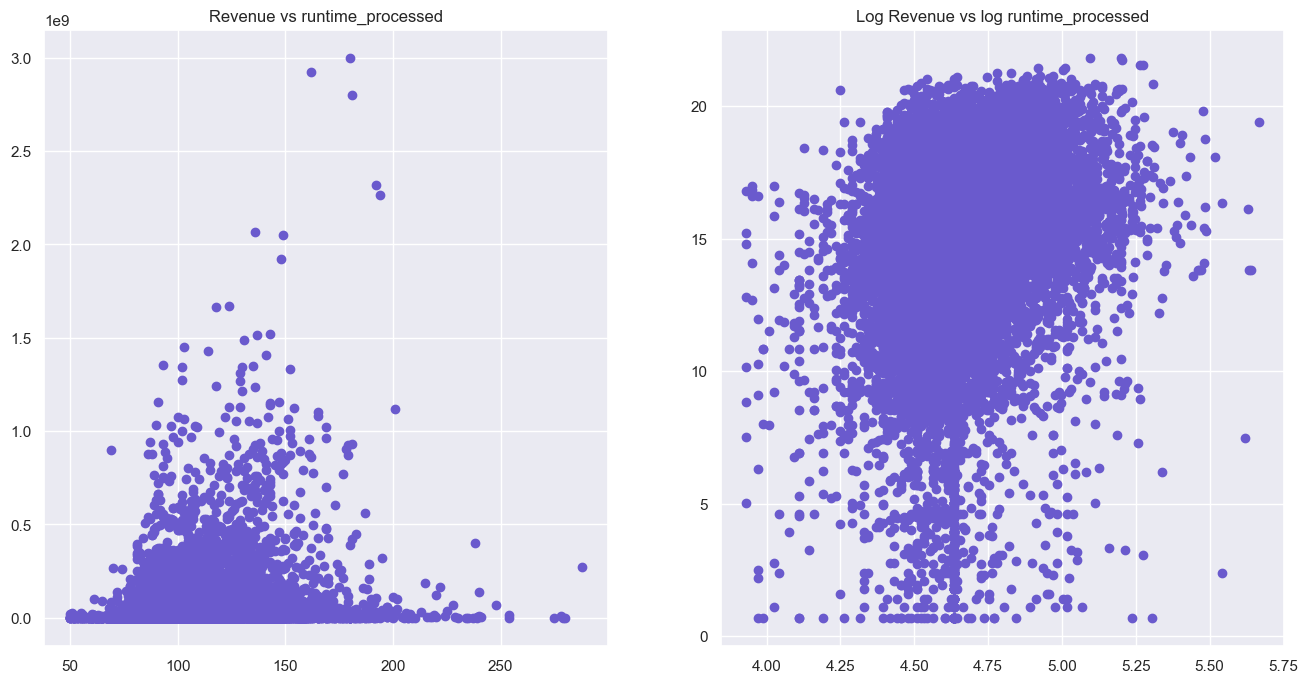

In [61]:
# Vẽ biểu đồ phân tán giữa 'runtime_processed' và 'revenue'
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['runtime_processed'], data['revenue'], color='slateblue')
plt.title('Revenue vs runtime_processed')

# Vẽ biểu đồ phân tán giữa log1p của 'runtime_processed' và log1p của 'revenue'
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['runtime_processed']), np.log1p(data['revenue']), color='slateblue')
plt.title('Log Revenue vs log runtime_processed')

In [62]:
# Tính toán hệ số tương quan Pearson giữa 'runtime_processed' và 'revenue'
corr, _ = pearsonr(data['runtime_processed'], data['revenue'])
print('Pearsons correlation: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa log1p của 'runtime_processed' và log1p của 'revenue'
corr, _ = pearsonr(np.log1p(data['runtime_processed']), np.log1p(data['revenue']))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.187
Pearsons correlation: 0.243


Quan sát thấy mối tương quan nhỏ giữa thời gian chạy và doanh thu của một bộ phim, vì vậy sẽ rất hữu ích nếu đưa vào mô hình

In [63]:
# Thêm 'runtime_processed' vào danh sách các đặc trưng số
num_features.append('runtime_processed')

## Adult

Cột này cho biết liệu bộ phim có được coi là chỉ phù hợp với người lớn hay không. Việc giới hạn đối tượng cũng sẽ ảnh hưởng tới doanh thu phim.

In [64]:
# Kiểm tra số lượng bộ phim có 'adult' = True
data['adult'].value_counts()

adult
False    15911
True        35
Name: count, dtype: int64

In [65]:
# Chuyển đổi cột 'adult' thành dạng nhị phân (1 nếu True, 0 nếu False)
data['adult'] = data['adult'].map(lambda x: 1 if (x == True) else 0)

# Thêm 'adult' vào danh sách các đặc trưng phân loại
cat_features.append('adult')
cat_features

['status',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '2000s',
 '2010s',
 'MondayRelease',
 'TuesdayRelease',
 'WednesdayRelease',
 'ThursdayRelease',
 'FridayRelease',
 'SaturdayRelease',
 'SundayRelease',
 'Winter',
 'Fall',
 'Spring',
 'Summer',
 'adult']

## Budget

Cột này thể hiện kinh phí của bộ phim, nghĩa là ước tính chi tiêu được xác định cho bộ phim. 

Theo trực quan, điều này có vẻ như là một biến số quan trọng để dự đoán doanh thu, bởi vì phim có kinh phí cao hơn và sản xuất cao hơn có thể sẽ thành công hơn, nhưng điều này chắc chắn không phải lúc nào cũng đúng và đáng để khám phá thêm.

In [66]:
# Kiểm tra số lượng bộ phim thiếu thông tin về 'budget'
print('Movies missing a budget:', data.budget.isna().sum())

Movies missing a budget: 0


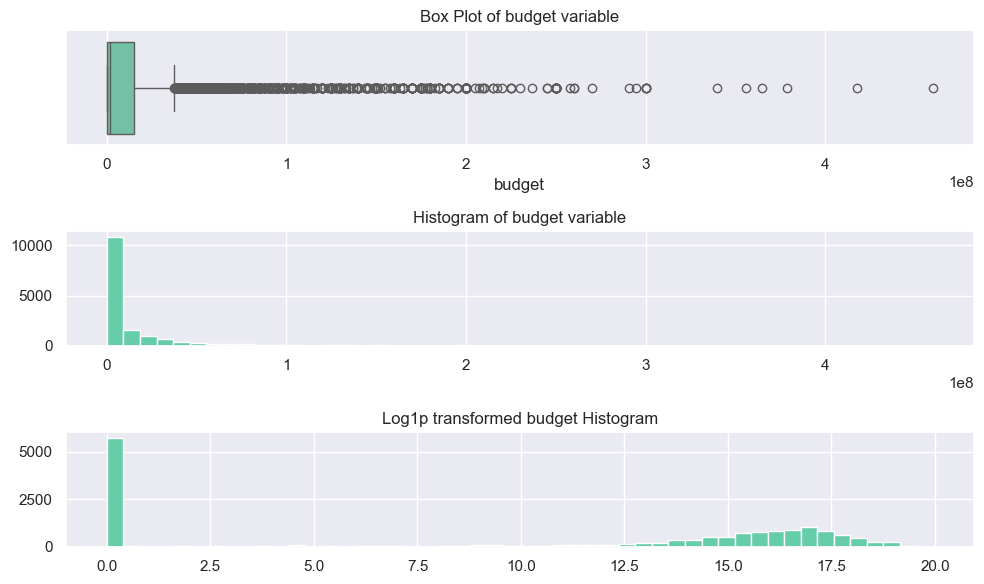

In [67]:
# Vẽ các biểu đồ phân tích dữ liệu của cột 'budget'
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})

# Boxplot của 'budget'
sns.boxplot(x=data.budget, ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of budget variable")

# Histogram của 'budget'
ax[1].hist(data.budget, bins=50, color='mediumaquamarine', alpha=1)
ax[1].set_title("Histogram of budget variable")

# Histogram của 'budget' sau khi áp dụng log1p
ax[2].hist(np.log1p(data.budget), bins=50, color='mediumaquamarine', alpha=1)
ax[2].set_title("Log1p transformed budget Histogram")

f.tight_layout()

In [68]:
# Kiểm tra số lượng bộ phim có 'budget' bằng 0
print('Movies with budget listed as 0: ', (data.budget == 0).sum())

# Tính toán tỷ lệ phần trăm các bộ phim có 'budget' bằng 0
print('Percentage movies with budget listed as 0: ', (data.budget == 0).sum() / data.shape[0] * 100)

Movies with budget listed as 0:  5728
Percentage movies with budget listed as 0:  35.921234165307915


Có hơn 35% phim trong dữ liệu có kinh phí bằng 0. 

Điều này rất khó có thể chính xác vì mọi phim được sản xuất đều có một loại kinh phí nào đó, vì vậy có khả năng là những phim không tìm thấy ngân sách đã được thay thế bằng 0. 

Để làm sạch dữ liệu này, sẽ thay thế các giá trị 0 này bằng ngân sách trung vị để giảm độ lệch.

In [69]:
# Lưu trữ dữ liệu vào biến df để tiếp tục xử lý
df = data

In [70]:
# Tính giá trị trung vị của 'budget' (trừ các giá trị bằng 0)
median = df.loc[df['budget'] > 0, 'budget'].median()

# Thay thế các giá trị 'budget' bằng 0 bằng giá trị trung vị
df["budget_processed"] = df["budget"].mask(df["budget"] == 0, median)

In [71]:
# Hiển thị các bộ phim có 'budget_processed' nhỏ nhất
df.nsmallest(10, 'budget_processed')['budget_processed']

id
114903     1
1052025    1
244537     1
64313      1
258913     1
286523     1
1321865    1
507187     1
1086565    1
1134091    1
Name: budget_processed, dtype: int64

Dường như có rất nhiều giá trị xấu ngoài những giá trị bằng 0.

Sẽ thay thế tất cả các giá trị cho ngân sách dưới 10.000 USD vì đây là giá trị tối thiểu hợp lý

In [72]:
# Bước 1: Đặt giá trị 'budget' <= 10000 thành NaN (giả sử là dữ liệu không chính xác)
df.loc[df['budget'] <= 10000, 'budget'] = np.nan

# Bước 2: Dùng KNNImputer để điền giá trị NaN
imputer = KNNImputer(n_neighbors=5)

# Điền giá trị thiếu cho cột 'budget_processed' dựa trên các cột liên quan
df['budget_processed'] = imputer.fit_transform(df[['title_len', 'vote_average', 'vote_count', 'runtime_processed']])

# In ra một số dòng để kiểm tra
print(data[['budget', 'budget_processed']].head())

             budget  budget_processed
id                                   
27205   160000000.0               9.0
157336  165000000.0              12.0
155     185000000.0              15.0
19995   237000000.0               6.0
24428   220000000.0              12.0


In [73]:
# Tính giá trị trung vị cho 'budget' với các bộ phim có 'budget' >= 10000
median = df.loc[df['budget'] >= 10000, 'budget'].median()

# Thay thế các giá trị 'budget' nhỏ hơn 10000 bằng giá trị trung vị
df["budget_processed"] = df["budget"].mask(df["budget"] < 10000, median)

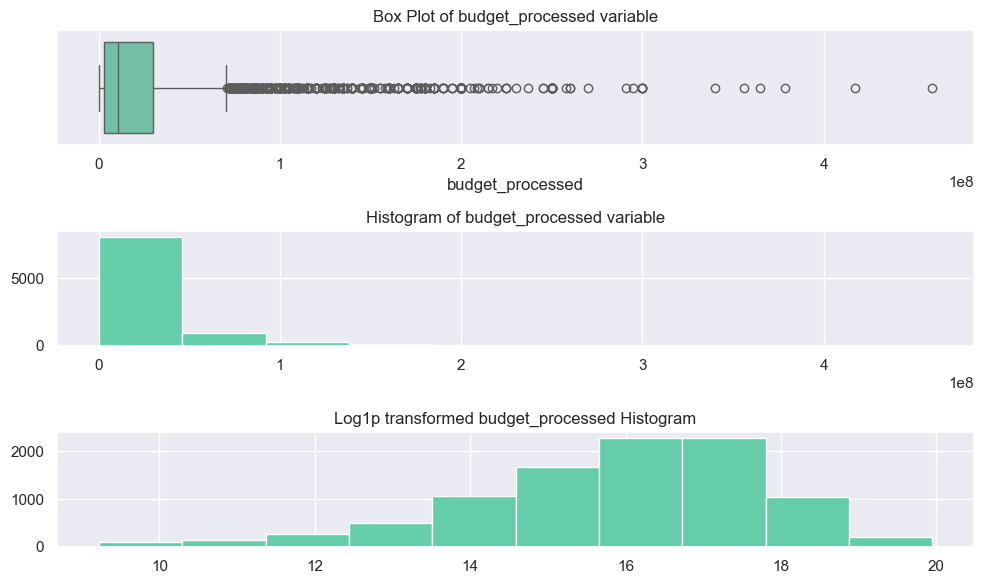

In [74]:
# Vẽ các biểu đồ phân tích dữ liệu của cột 'budget_processed'
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})

# Boxplot của 'budget_processed'
sns.boxplot(x=df.budget_processed, ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of budget_processed variable")

# Histogram của 'budget_processed'
ax[1].hist(df.budget_processed, color='mediumaquamarine', alpha=1)
ax[1].set_title("Histogram of budget_processed variable")

# Histogram của 'budget_processed' sau khi áp dụng log1p
ax[2].hist(np.log1p(df.budget_processed), color='mediumaquamarine', alpha=1)
ax[2].set_title("Log1p transformed budget_processed Histogram")

f.tight_layout()

Vì có rất nhiều giá trị dưới 10.000 trong cột ngân sách nên có một cụm dữ liệu khổng lồ ở giá trị trung vị này. Phân phối này vẫn chưa lý tưởng, vì vậy sẽ tìm cách tốt hơn để thay thế các giá trị này sau này.

Text(0.5, 1.0, 'Log Revenue vs log budget_processed')

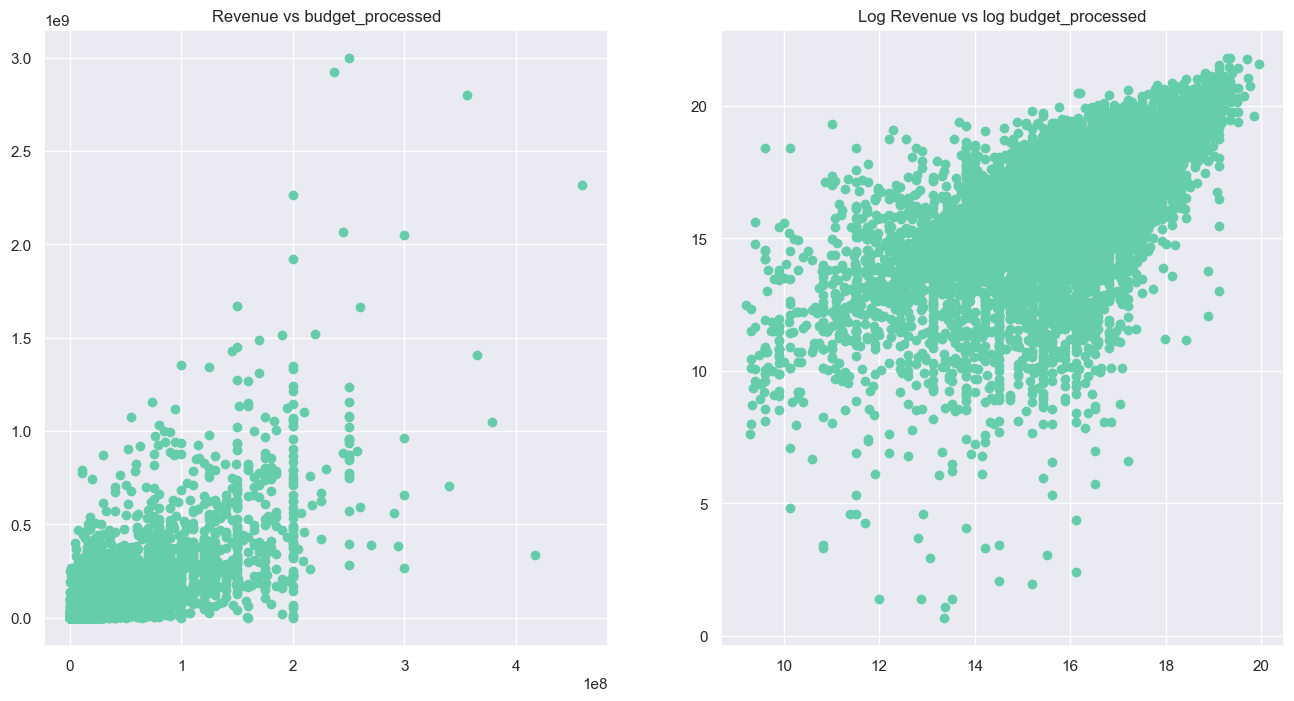

In [75]:
# Vẽ biểu đồ phân tán giữa 'budget_processed' và 'revenue'
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['budget_processed'], data['revenue'], color='mediumaquamarine')
plt.title('Revenue vs budget_processed')

# Vẽ biểu đồ phân tán giữa log1p của 'budget_processed' và log1p của 'revenue'
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['budget_processed']), np.log1p(data['revenue']), color='mediumaquamarine')
plt.title('Log Revenue vs log budget_processed')

In [76]:
# Thêm 'budget_processed' vào danh sách các đặc trưng số
num_features.append('budget_processed')

In [77]:
# Tính toán hệ số tương quan Pearson giữa 'budget_processed' và 'revenue'
corr, _ = pearsonr(data['budget_processed'], data['revenue'])
print('Pearsons correlation between budget_processed and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa log1p của 'budget_processed' và log1p của 'revenue'
corr, _ = pearsonr(np.log1p(data['budget_processed']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: %.3f' % corr)

Pearsons correlation between budget_processed and revenue: nan
Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: nan


Có thể thấy có mối tương quan khá chặt chẽ giữa ngân sách và doanh thu.

## Homepage

Cột này biểu thị thuộc tính này chứa trang chủ của trang web của bộ phim, nếu có. 

Thuộc tính này rất thú vị vì có khả năng những bộ phim nổi tiếng hơn sẽ có trang chủ hoặc thậm chí những bộ phim có trang chủ sẽ trở nên nổi tiếng hơn và có nhiều khả năng thành công hơn.


In [78]:
# Tính tỷ lệ phần trăm bộ phim có homepage
percentage_has_homepage = (~data['homepage'].isnull()).sum() / data.shape[0] * 100
print(f"Percentage of the movies that have homepage: {percentage_has_homepage:.2f}%")

Percentage of the movies that have homepage: 29.89%


In [79]:
# Tạo cột mới 'has_homepage', giá trị 1 nếu có homepage, 0 nếu không
data['has_homepage'] = data.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)

# In ra số lượng các bộ phim có và không có homepage
data['has_homepage'].value_counts()

has_homepage
0    11180
1     4766
Name: count, dtype: int64

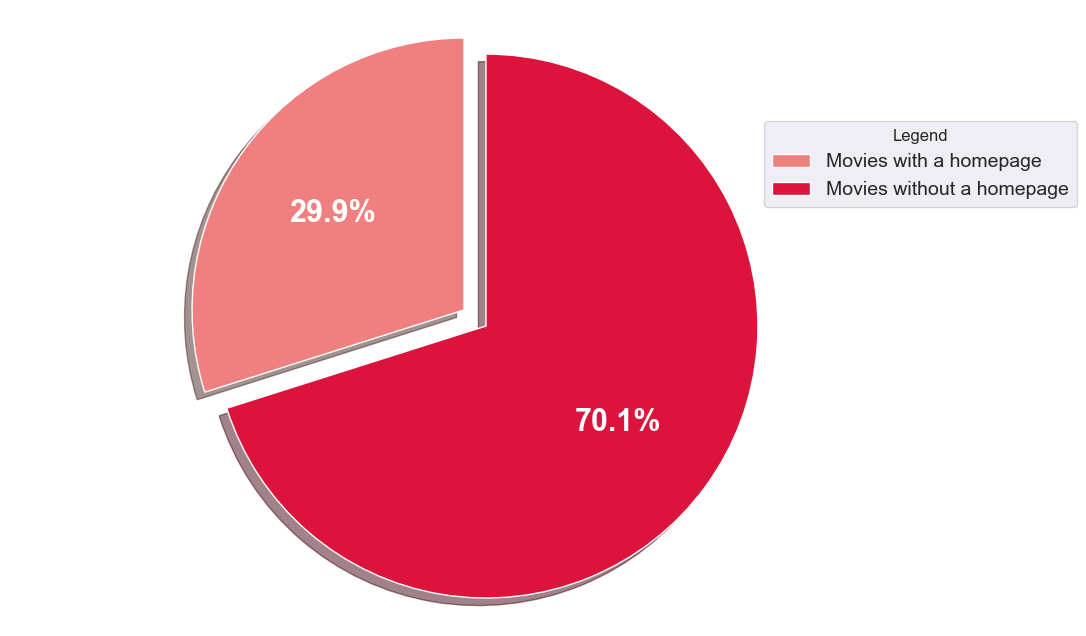

In [80]:
# Vẽ biểu đồ tròn hiển thị tỷ lệ bộ phim có homepage và không có homepage
labels = 'Movies with a homepage', 'Movies without a homepage'
btc_1 = [sum(data.has_homepage), (data.has_homepage == 0).sum(axis=0)]
explode = (0.1, 0)  # Làm nổi bật phần có homepage

# Chọn màu sắc cho biểu đồ
colors = ['lightcoral', 'crimson']

# Vẽ biểu đồ tròn
fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')  # Đảm bảo biểu đồ là hình tròn

# Thêm legend cho biểu đồ
ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

Có thể thấy rằng 70% phim không có trang chủ. 30% phim có trang chủ và điều này có thể liên quan đến những bộ phim được biết đến nhiều hơn. 

Trên thực tế, cũng có thể có nhiều phim hơn có trang chủ hoặc trang web, tuy nhiên, chúng có thể bị thiếu trong tập dữ liệu vì không có cách nào để phân biệt giữa dữ liệu bị thiếu và phim không có trang chủ, vì cả hai đều được đánh dấu là Null.

In [81]:
# In ra doanh thu trung bình và trung vị của các bộ phim có homepage
print("Mean revenue for movies with a homepage: %.2f" % data.loc[data['has_homepage'] == 1, "revenue"].mean())
print("Median revenue for movies with a homepage: %.2f" % data.loc[data['has_homepage'] == 1, "revenue"].median())

# In ra doanh thu trung bình và trung vị của các bộ phim không có homepage
print()
print("Mean revenue for movies without a homepage: %.2f" % data.loc[data['has_homepage'] == 0, "revenue"].mean())
print("Median revenue for movies without a homepage: %.2f" % data.loc[data['has_homepage'] == 0, "revenue"].median())

Mean revenue for movies with a homepage: 91093042.69
Median revenue for movies with a homepage: 12638911.50

Mean revenue for movies without a homepage: 25652616.05
Median revenue for movies without a homepage: 3643621.50


C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\1721130363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x='has_homepage', y='revenue', data=data, palette=pal1)


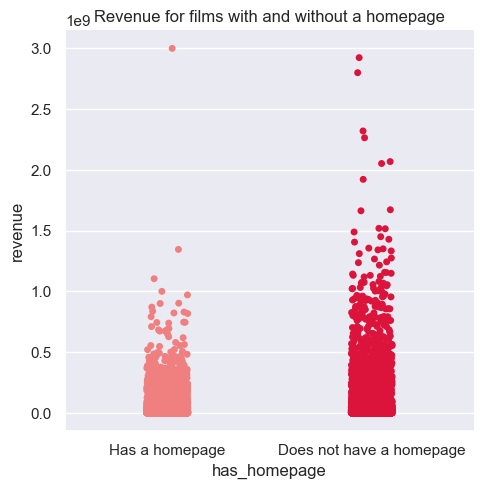

In [82]:
# Vẽ biểu đồ so sánh doanh thu giữa các bộ phim có homepage và không có homepage
pal1 = ['lightcoral', 'crimson']
ax = sns.catplot(x='has_homepage', y='revenue', data=data, palette=pal1)
plt.title('Revenue for films with and without a homepage')

# Đặt tên cho các nhãn trên trục x
labels = 'Has a homepage', 'Does not have a homepage'
ax.set_xticklabels(labels)

In [83]:
# Thêm 'has_homepage' vào danh sách các đặc trưng phân loại
cat_features.append('has_homepage')

In [84]:
# Tính toán hệ số tương quan Pearson giữa 'has_homepage' và 'revenue'
corr, _ = pearsonr(data['has_homepage'], data['revenue'])
print('Pearsons correlation between has_homepage and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa 'has_homepage' và log-transformed 'revenue'
corr, _ = pearsonr(data['has_homepage'], np.log1p(data['revenue']))
print('Pearsons correlation between has_homepage and log transformed revenue: %.3f' % corr)

Pearsons correlation between has_homepage and revenue: 0.229
Pearsons correlation between has_homepage and log transformed revenue: 0.154


Có thể thấy có mối tương quan nhỏ giữa việc có trang chủ và doanh thu.

Quan sát thấy trong biểu đồ phân loại rằng những bộ phim không có trang chủ trên thực tế đạt doanh thu lớn hơn nhiều, tuy nhiên điều này có nhiều khả năng xảy ra hơn vì có số lượng phim lớn hơn nhiều trong tập dữ liệu. 

Cũng thấy rằng doanh thu trung bình của phim không có trang chủ cao hơn nhiều, nhưng điều này rõ ràng là do sự sai lệch vì doanh thu trung vị của phim có trang chủ lớn hơn

## Original laguage

Cột này thể hiện ngôn ngữ gốc của bộ phim được phát hành.

In [85]:
# In ra tổng số bộ phim trong dataset
data.shape[0]

15946

In [86]:
# In ra số lượng các bộ phim theo ngôn ngữ gốc
print("Counts of each original language:")
print(data['original_language'].value_counts()[:10])

Counts of each original language:
original_language
en    10497
fr      634
es      628
ja      460
ru      417
hi      394
zh      374
it      274
de      261
ko      244
Name: count, dtype: int64


In [87]:
# Tính tỷ lệ phần trăm các bộ phim có ngôn ngữ gốc là tiếng Anh ('en')
data[data['original_language'] == 'en'].shape[0] / data.shape[0] * 100

65.82842092060704

Text(0.5, 1.0, 'Revenue for a movie and its original_language')

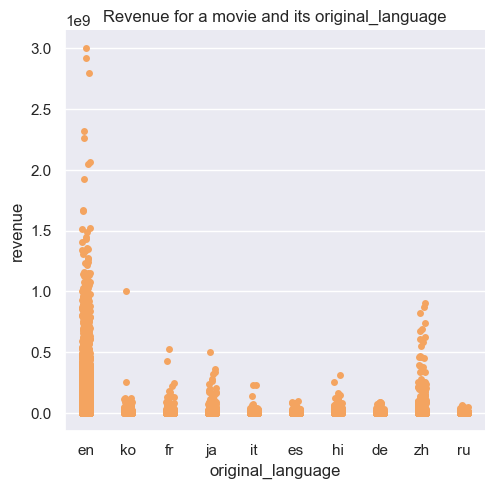

In [88]:
# Vẽ biểu đồ so sánh doanh thu của các bộ phim với ngôn ngữ gốc là 10 ngôn ngữ phổ biến nhất
sns.catplot(x='original_language', y='revenue', color='sandybrown', data=data.loc[data['original_language'].isin(data['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its original_language')

Vì có tới 66% phim trong dữ liệu được phát hành bằng tiếng Anh và các ngôn ngữ khác chỉ chiếm một phần nhỏ trong số phim nên sẽ tạo một biến mới, chỉ cần xác định xem phim có được phát hành bằng tiếng Anh hay không.

Có vẻ như ngôn ngữ cụ thể khác là gì không quan trọng mà chỉ là bộ phim không phải tiếng Anh mới là điều quan trọng nhất đối với mô hình. 

Ngoài ra, những bộ phim bằng tiếng Anh đạt doanh thu cao hơn rất nhiều, vì vậy đây có thể là một thuộc tính hay để đưa vào

In [89]:
# Tạo đặc trưng mới 'originally_english' để xác định xem bộ phim có ngôn ngữ gốc là tiếng Anh không
data['originally_english'] = data.original_language.apply(lambda x: 1 if x == 'en' else 0)
data['originally_english'].value_counts()

originally_english
1    10497
0     5449
Name: count, dtype: int64

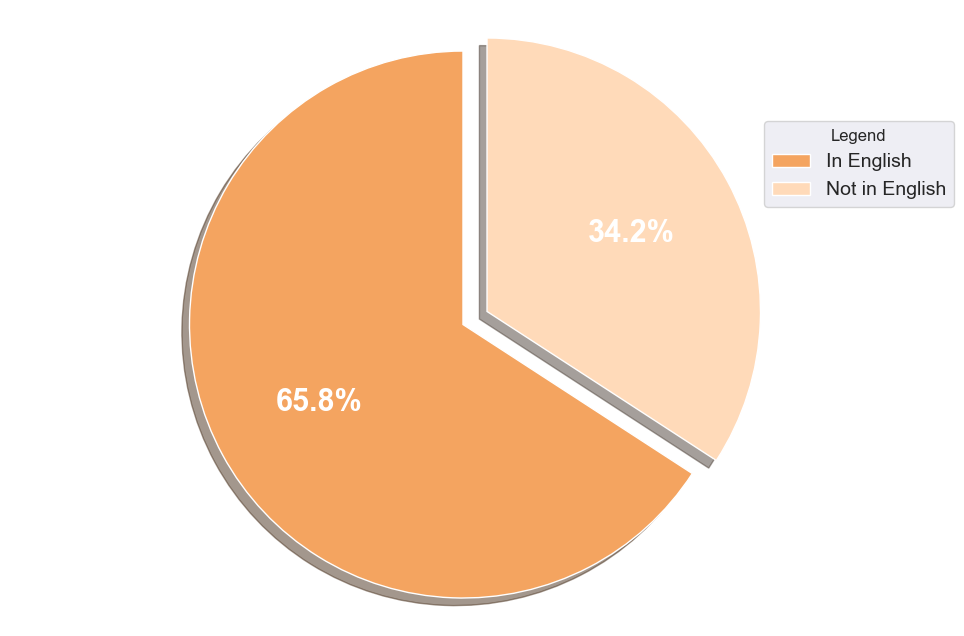

In [90]:
# Vẽ biểu đồ tròn để hiển thị tỷ lệ bộ phim có ngôn ngữ gốc là tiếng Anh và không phải tiếng Anh
labels = 'In English', 'Not in English'
btc_1 = [(data.originally_english == 1).sum(axis=0), (data.originally_english == 0).sum(axis=0)]
explode = (0.1, 0)  # Làm nổi bật phần có ngôn ngữ gốc là tiếng Anh

colors = ['sandybrown', 'peachpuff']

# Vẽ biểu đồ tròn
fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')  # Đảm bảo biểu đồ là hình tròn

# Thêm legend cho biểu đồ
ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\3069184300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x='originally_english', y='revenue', data=data, palette=pal2)


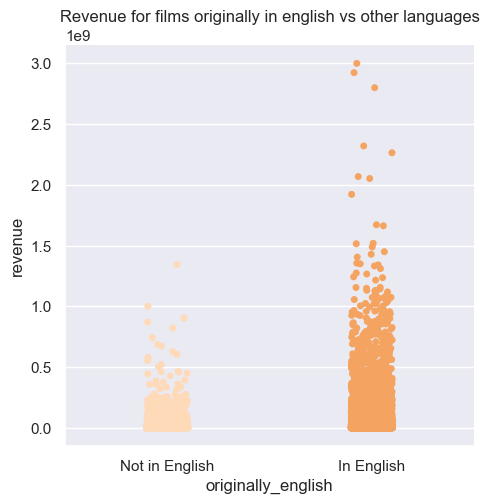

In [91]:
# Vẽ biểu đồ so sánh doanh thu của các bộ phim có ngôn ngữ gốc là tiếng Anh và các ngôn ngữ khác
pal2 = ['peachpuff', 'sandybrown']
ax = sns.catplot(x='originally_english', y='revenue', data=data, palette=pal2)
plt.title('Revenue for films originally in english vs other languages')

# Đặt tên cho các nhãn trên trục x
labels = 'Not in English', 'In English'
ax.set_xticklabels(labels)

In [92]:
# Thêm 'originally_english' vào danh sách các đặc trưng phân loại
cat_features.append('originally_english')

In [93]:
# Tính toán hệ số tương quan Pearson giữa 'originally_english' và 'revenue'
corr, _ = pearsonr(data['originally_english'], data['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.174


Có thể thấy có mối tương quan nhỏ giữa phim nói tiếng Anh và doanh thu của phim. Mặc dù nhìn chung phim nói tiếng Anh đạt doanh thu cao hơn nhiều, nhưng điều này có thể đơn giản chỉ vì có số lượng phim phát hành bằng tiếng Anh lớn hơn nhiều.

## Overview

Cột này chứa thông tin tóm tắt chung về nội dung của bộ phim. Có thể phần tổng quan được xây dựng tốt sẽ thu hút sự chú ý của khán giả dựa trên những bộ phim họ xem từ việc đọc phần tổng quan, nhưng không chắc đây là một phần lớn động lực để xem phim.

In [94]:
# Kiểm tra số lượng bộ phim thiếu phần mô tả ('overview')
print('Movies missing an overview:', data.overview.isna().sum())

Movies missing an overview: 469


Trước tiên, sẽ lấp đầy những bộ phim bị thiếu phần tổng quan bằng một xâu rỗng, sau đó sẽ xem xét độ dài của phần tổng quan. 

Nội dung trong phần tổng quan có thể là nội dung thú vị để phân tích, nhưng sẽ không xem xét nội dung đó vì nằm ngoài phạm vi của dự án này.

In [95]:
# Thay thế các giá trị thiếu trong cột 'overview' bằng chuỗi rỗng
data.overview = data.overview.fillna("")

# Tạo cột mới 'overview_len' để lưu trữ độ dài của phần mô tả
data['overview_len'] = data.overview.apply(len)

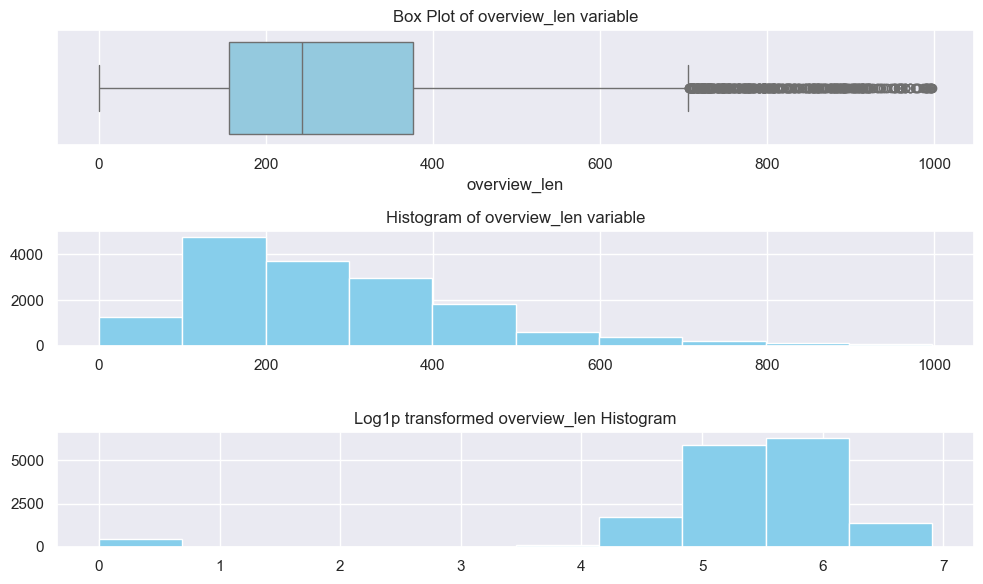

In [96]:
# Vẽ các biểu đồ phân tích độ dài của phần mô tả
f, ax = plt.subplots(3, figsize=(10,6))

# Cài đặt kích thước cho biểu đồ
sns.set(rc={'figure.figsize':(12,8)})

# Boxplot của độ dài mô tả
sns.boxplot(x=data.overview_len, ax = ax[0], color='skyblue')
ax[0].set_title("Box Plot of overview_len variable")

# Histogram của độ dài mô tả
ax[1].hist(data.overview_len, color='skyblue', alpha=1)
ax[1].set_title("Histogram of overview_len variable")

# Histogram của độ dài mô tả sau khi áp dụng log1p
ax[2].hist(np.log1p(data.overview_len), color='skyblue', alpha=1)
ax[2].set_title("Log1p transformed overview_len Histogram")

f.tight_layout()

Text(0.5, 1.0, 'Log Revenue vs log overview_len')

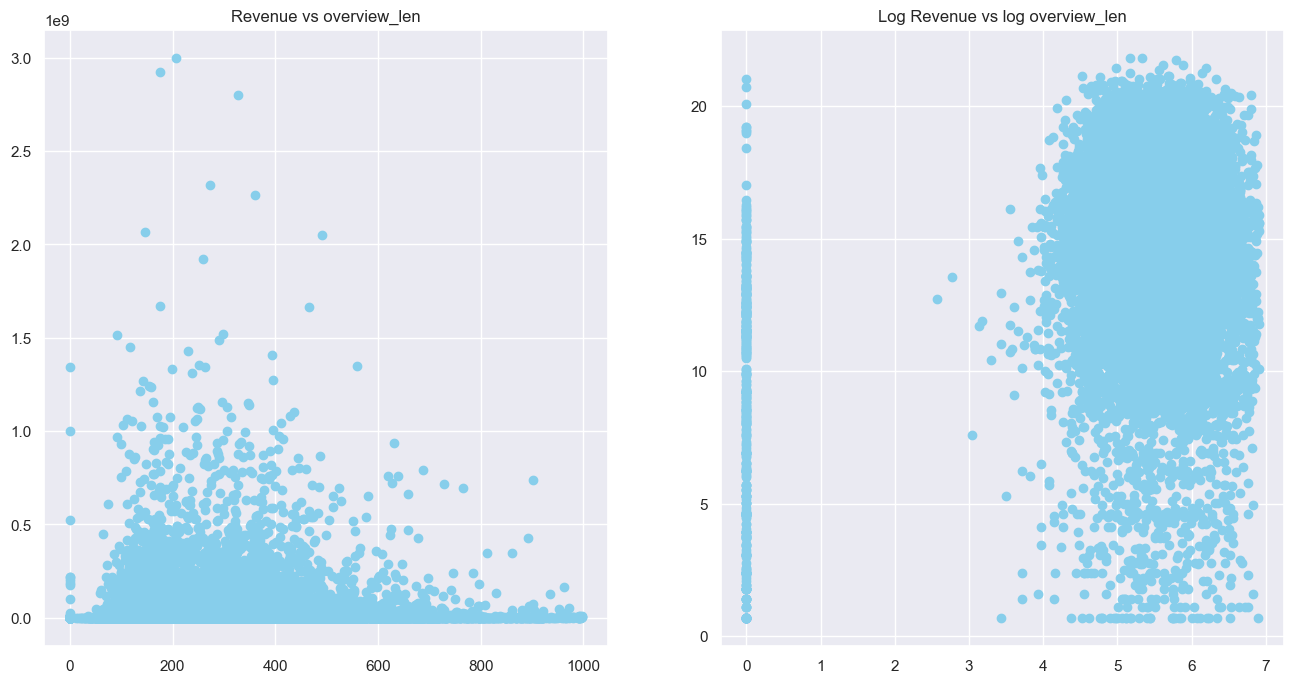

In [97]:
# Vẽ đồ thị so sánh giữa độ dài phần mô tả (overview_len) và doanh thu (revenue)
plt.figure(figsize=(16, 8))

# Vẽ đồ thị phân tán giữa 'overview_len' và 'revenue'
plt.subplot(1, 2, 1)
plt.scatter(data['overview_len'], data['revenue'], color='skyblue')
plt.title('Revenue vs overview_len')

# Vẽ đồ thị phân tán giữa log-transformed 'overview_len' và log-transformed 'revenue'
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['overview_len']), np.log1p(data['revenue']), color='skyblue')
plt.title('Log Revenue vs log overview_len')

In [98]:
# Tính toán hệ số tương quan Pearson giữa 'overview_len' và 'revenue'
corr, _ = pearsonr(data['overview_len'], data['revenue'])
print('Pearsons correlation between overview_len and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa 'log1p(overview_len)' và 'log1p(revenue)'
corr, _ = pearsonr(np.log1p(data['overview_len']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed  overview_len and log transformed revenue:: %.3f' % corr)

Pearsons correlation between overview_len and revenue: 0.014
Pearsons correlation between log transformed  overview_len and log transformed revenue:: 0.277


Dường như hầu như không có mối tương quan giữa các biến này và mặc dù không thể loại trừ mối quan hệ chỉ dựa trên Pearson's correlation, sẽ không đưa nó vào mô hình vì độ dài của phần Overview khá không đáng kể.

Nếu thực hiện một số NLP, phần tổng quan có thể hữu ích và việc kiểm tra sâu hơn nội dung và mô hình tổng quan về những bộ phim thành công có thể thú vị, nhưng điều đó nằm ngoài phạm vi của dự án này nên sẽ bỏ phần này

In [99]:
# Thêm 'overview' vào danh sách các cột cần loại bỏ
cols_to_drop.append('overview')

## Popularity

Cột này chứa số liệu về mức độ phổ biến của một bộ phim, tuy nhiên, rất không rõ con số này thực sự có ý nghĩa gì vì nó không tuân theo thang đo hoặc hệ thống xếp hạng rõ ràng và rõ ràng. Sẽ khám phá thêm về biến để hiểu rõ hơn

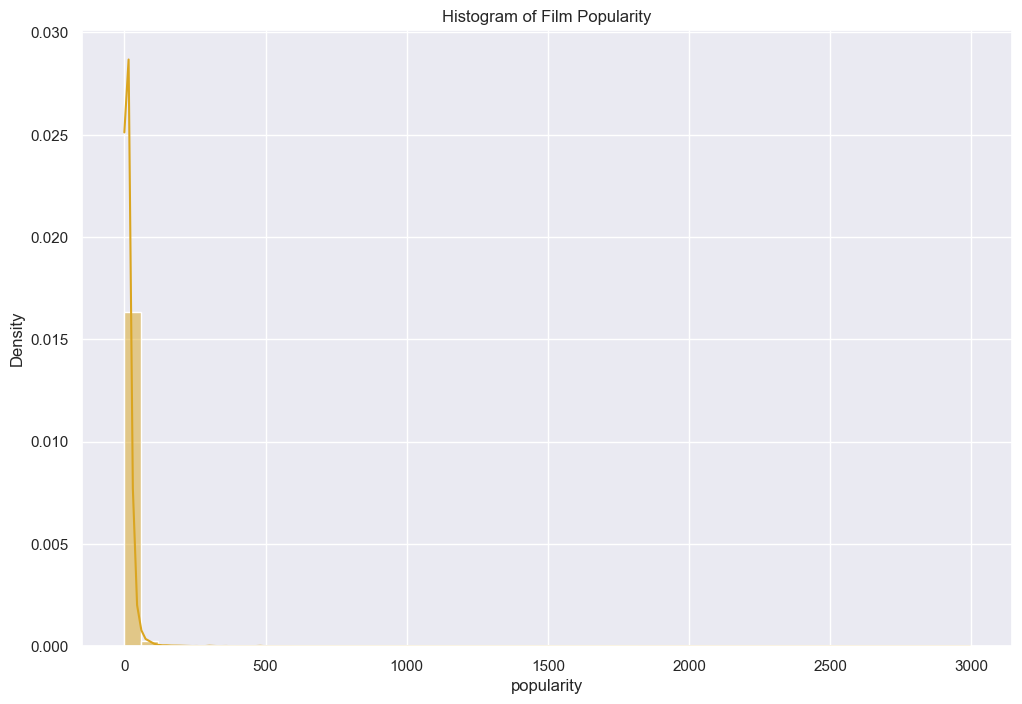

In [100]:
# Vẽ biểu đồ histogram về độ phổ biến của các bộ phim
sns.histplot(data['popularity'], color='goldenrod', bins=50, kde=True, stat="density")
sns.set(rc={'figure.figsize':(12, 2)})
plt.title('Histogram of Film Popularity')
plt.show()

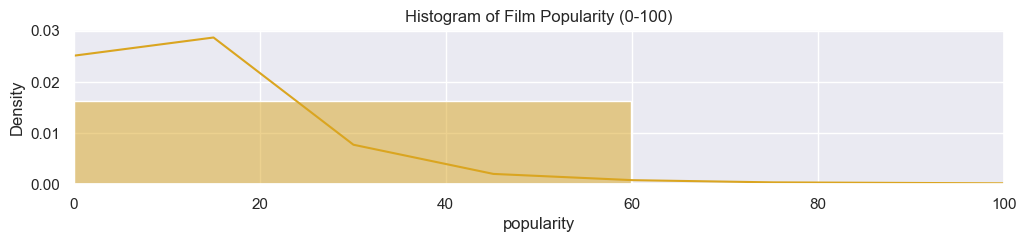

In [101]:
# Vẽ lại biểu đồ histogram độ phổ biến nhưng giới hạn trục x trong khoảng từ 0 đến 100
sns.histplot(data['popularity'], color='goldenrod', bins=50, kde=True, stat="density")
sns.set(rc={'figure.figsize':(12, 2)})
plt.title('Histogram of Film Popularity (0-100)')
plt.xlim(0, 100)
plt.show()

In [102]:
# In ra mô tả thống kê của cột 'popularity'
print(data['popularity'].describe())

count    15946.000000
mean        15.188663
std         50.091776
min          0.000000
25%          3.722750
50%          9.965000
75%         16.847500
max       2994.357000
Name: popularity, dtype: float64


Mức độ phổ biến có thể là một đặc điểm quan trọng trong việc dự đoán kết quả doanh thu do tầm quan trọng của mức độ phổ biến đối với lượng người xem phim (điều này tất nhiên phụ thuộc vào việc độ phổ biến có thể hiểu được là sự hào hứng xung quanh một bộ phim chứ không phải là các đánh giá sau khi phát hành - nếu là sau khi phát hành, độ phổ biến sẽ nên tương ứng trực tiếp với doanh thu). 

Bởi vì độ phổ biến càng cao, điều này được xem là tích cực cho chiến lược tiếp thị, và do đó làm tăng doanh số bán vé, giả sử rằng độ phổ biến và doanh thu sẽ có một mối quan hệ tích cực. 

Ở trên, có thể thấy rằng trong số 15937 bộ phim trong tập dữ liệu, mức độ phổ biến trung bình là 15.2 với mức tối thiểu là 0,00 và tối đa là 2994.35. Biểu đồ cho thấy rằng phần lớn các bộ phim nằm trong khoảng điểm phổ biến từ 0 đến 60, với các ngoại lệ rất phổ biến thưa thớt. Việc xử lý các ngoại lệ này sẽ được giải quyết sau

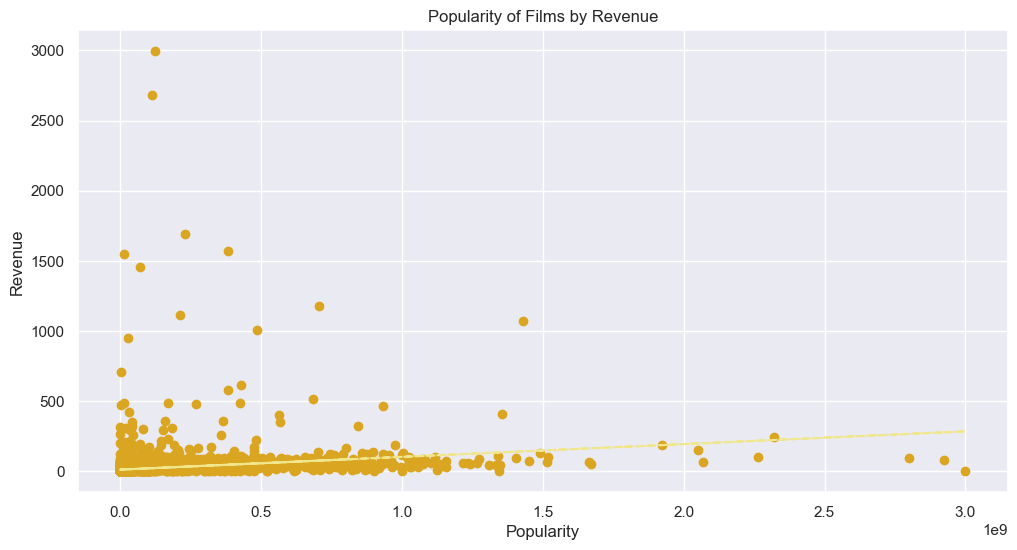

In [103]:
# Vẽ biểu đồ phân tán giữa 'popularity' và 'revenue'
sns.set(rc={'figure.figsize':(12, 6)})
cx = data['revenue']
pop = data['popularity']
plt.plot(cx, pop, 'o', color='goldenrod')
plt.ylabel("Revenue")
plt.xlabel("Popularity")
plt.title("Popularity of Films by Revenue")

# Vẽ đường xu hướng tuyến tính giữa 'popularity' và 'revenue'
z = np.polyfit(cx, pop, 1)
p = np.poly1d(z)
plt.plot(cx, p(cx), "--", color='khaki')

In [104]:
# Tính toán hệ số tương quan Pearson giữa 'popularity' và 'revenue'
corr, _ = pearsonr(data['popularity'], data['revenue'])
print('Pearsons correlation between popularity and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa 'log1p(popularity)' và 'log1p(revenue)'
corr, _ = pearsonr(np.log1p(data['popularity']), np.log1p(data['revenue']))
print('Pearsons correlation between log popularity and log revenue: %.3f' % corr)

Pearsons correlation between popularity and revenue: 0.238
Pearsons correlation between log popularity and log revenue: 0.652


Trong việc so sánh độ phổ biến (popularity) với doanh thu có một sự tương quan nhất định. Điều này là dễ hiểu vì sự ảnh hưởng của độ phổ biến đối với thành công về mặt tài chính của một bộ phim thông qua sự phát triển của lượt xem. 

Có thể tiến hành điều tra sâu hơn bằng cách thực hiện thí nghiệm với các giá trị ngoại lệ; đặc biệt, một số bộ phim có độ phổ biến rất cao nhưng không đạt được doanh thu cao đồng thời, dẫn đến kết luận rằng độ phổ biến không phải là một chỉ số hoàn hảo cho doanh thu của một bộ phim.

Tuy nhiên, do sự nhầm lẫn liên quan đến giá trị ngoại lệ và khoảng giá trị mà thuộc tính này được tạo ra, đặc điểm này thiếu sự rõ ràng. Hơn nữa, có vẻ như độ phổ biến chỉ có thể được đánh giá sau khi bộ phim đã được phát sóng, điều này có nghĩa là nó không hữu ích cho một hãng phim như một chỉ số để dự đoán tổng doanh thu của rạp chiếu phim. Thay vào đó, độ phổ biến có thể được sử dụng như một nhãn khác. Do đó, cho mục đích của dự án này, đặc điểm độ phổ biến sẽ không được bao gồm trong mô hình

In [105]:
# Thêm 'popularity' vào danh sách các cột cần loại bỏ
cols_to_drop.append('popularity')

## Original Title

Cột này thể hiện tiêu đề gốc của phim, có thể là trước khi phim được phát hành. Cột 'Title' cũng chứa tiêu đề của bộ phim, khiến cột này khá vô dụng đối với mô hình.

Không thể tìm ra bất kỳ lợi ích nào khi phân tích thuộc tính này, vì vậy sẽ bỏ nó đi

In [106]:
cols_to_drop.append('original_title')  # Thêm 'original_title' vào danh sách cần loại bỏ

## Backdrop Path

Cột này chứa đường dẫn đến phông nền phim. Các phông nền phim có thể rất thú vị khi xem xét mối quan hệ của chúng với doanh thu, nhưng việc phân tích nội dung của những tấm phông nền này nằm ngoài phạm vi của dự án này

In [107]:
cols_to_drop.append('backdrop_path')  # Thêm 'backdrop_path' vào danh sách cần loại bỏ

## Poster_path

Cột này chứa đường dẫn đến poster phim. Các poster phim có thể rất thú vị khi xem xét mối quan hệ của chúng với doanh thu, nhưng việc phân tích nội dung của những tấm poster này nằm ngoài phạm vi của dự án này


In [108]:
cols_to_drop.append('poster_path')  # Thêm 'poster_path' vào danh sách cần loại bỏ

## Tagline

Cột này chứa dòng giới thiệu của một bộ phim, về cơ bản là một cụm từ ngắn nhằm đại diện cho bộ phim. Nội dung của dòng giới thiệu có thể thú vị để phân tích cho một số loại phân tích nhất định nhưng một lần nữa, điều đó nằm ngoài phạm vi dự án của chúng tôi.

In [109]:
data['tagline']

id
27205                   Your mind is the scene of the crime.
157336     Mankind was born on Earth. It was never meant ...
155                        Welcome to a world without rules.
19995                            Enter the world of Pandora.
24428                                Some assembly required.
                                 ...                        
381425                                                   NaN
858358                               Just Jargon presents...
1041642                                                  NaN
381511                                    Zero Beyond Limits
1031609                                                  NaN
Name: tagline, Length: 15946, dtype: object

In [110]:
# Kiểm tra và in ra số lượng bộ phim thiếu tagline
print('Movies missing a tagline:', data.tagline.isna().sum())
print('Percentage movies missing a tagline:', data.tagline.isna().sum()/ data.shape[0] * 100)

Movies missing a tagline: 5001
Percentage movies missing a tagline: 31.362097077637024


Vì chúng tôi sẽ không phân tích nội dung nên thay vào đó chúng tôi sẽ chỉ kiểm tra xem phim có dòng giới thiệu hay không


In [111]:
# Tạo cột mới 'has_tagline' cho biết bộ phim có tagline hay không (1 nếu có, 0 nếu không)
data['has_tagline'] = data.tagline.apply(lambda x: 1 if type(x) == str else 0)

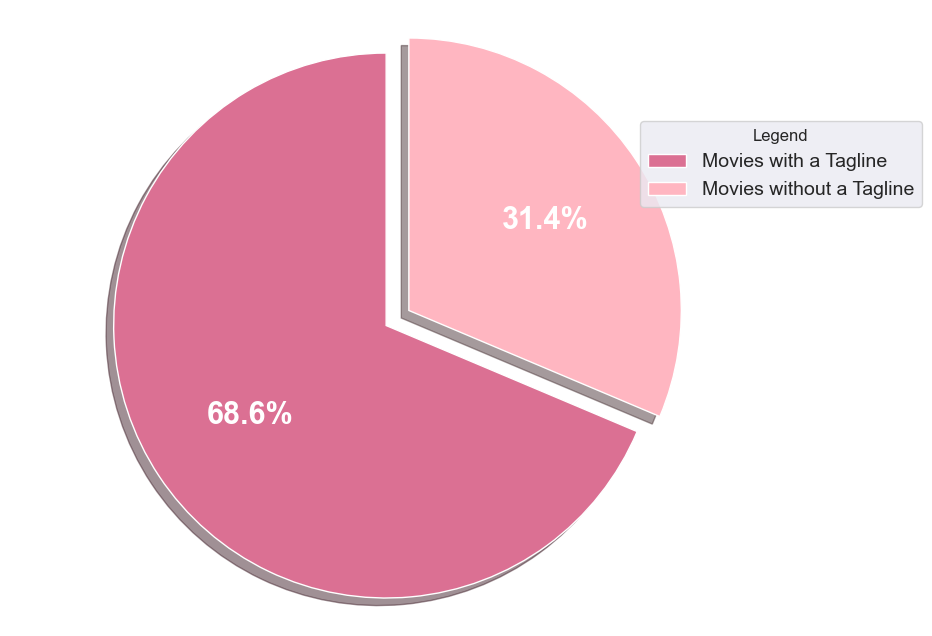

In [112]:
# Vẽ biểu đồ tròn để hiển thị tỷ lệ bộ phim có và không có tagline
labels = 'Movies with a Tagline', 'Movies without a Tagline'
btc_1 = [(data.has_tagline == 1).sum(axis=0), (data.has_tagline == 0).sum(axis=0)]
explode = (0.1, 0)  # Làm nổi bật phần có tagline

colors = ['palevioletred', 'lightpink']

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')  # Đảm bảo biểu đồ là hình tròn

# Thêm legend cho biểu đồ
ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\2877896631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='has_tagline', y='revenue', data=data, palette=pal1)
C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\2877896631.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0, 0, 'Does not have tagline'), Text(1, 0, 'Has tagline')]

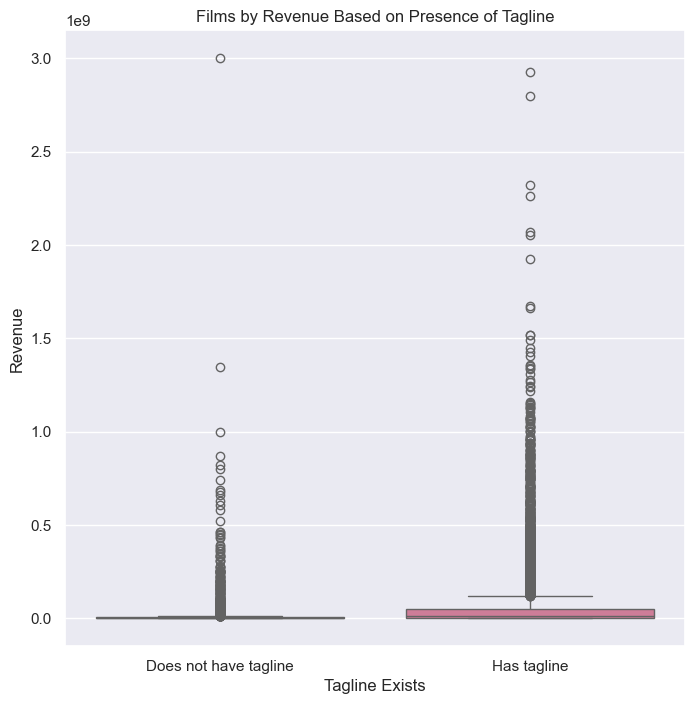

In [113]:
# Vẽ boxplot để so sánh doanh thu giữa các bộ phim có và không có tagline
pal1 = ['lightpink', 'palevioletred']
sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.boxplot(x='has_tagline', y='revenue', data=data, palette=pal1)
plt.title('Films by Revenue Based on Presence of Tagline')
plt.ylabel("Revenue")
plt.xlabel("Tagline Exists")
labels = 'Does not have tagline', 'Has tagline'
ax.set_xticklabels(labels)

C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\4137982806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x='has_tagline', y='revenue', data=data, palette=pal4)


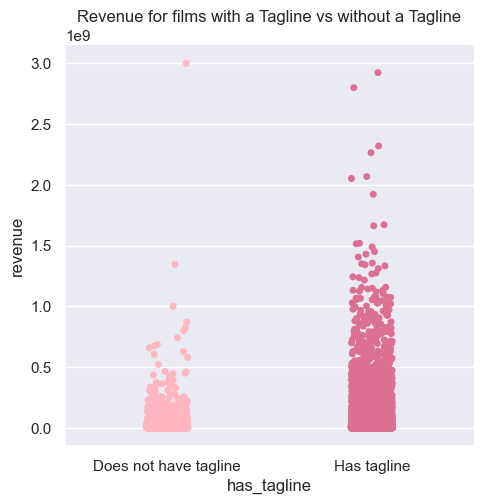

In [114]:
# Vẽ catplot để so sánh doanh thu giữa các bộ phim có và không có tagline
pal4 = ['lightpink', 'palevioletred']
ax = sns.catplot(x='has_tagline', y='revenue', data=data, palette=pal4)
plt.title('Revenue for films with a Tagline vs without a Tagline')
labels = 'Does not have tagline', 'Has tagline'
ax.set_xticklabels(labels)

In [115]:
# Tính toán hệ số tương quan Pearson giữa 'has_tagline' và 'revenue'
corr, _ = pearsonr(data['has_tagline'], data['revenue'])
print('Pearsons correlation between has_tagline and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa 'has_tagline' và 'log1p(revenue)'
corr, _ = pearsonr(data['has_tagline'], np.log1p(data['revenue']))
print('Pearsons correlation between has_tagline and log transformed revenue: %.3f' % corr)

Pearsons correlation between has_tagline and revenue: 0.170
Pearsons correlation between has_tagline and log transformed revenue: 0.353


Quan sát thấy mối tương quan giữa sự tồn tại của dòng giới thiệu và doanh thu của phim nên quyết định đưa thuộc tính này vào mô hình.

In [116]:
# Thêm 'has_tagline' vào danh sách các đặc trưng phân loại
cat_features.append('has_tagline')

## Genres

Cột này đại diện cho các thể loại của một bộ phim. Các thể loại khác nhau có thể đạt doanh thu phòng vé khác nhau, vì vậy đây có thể là một biến số thú vị để khám phá và xem liệu có mối liên hệ nào với doanh thu không


In [117]:
# Kiểm tra dữ liệu trong cột 'genres'
data['genres'].head()

id
27205              Action, Science Fiction, Adventure
157336              Adventure, Drama, Science Fiction
155                    Drama, Action, Crime, Thriller
19995     Action, Adventure, Fantasy, Science Fiction
24428              Science Fiction, Action, Adventure
Name: genres, dtype: object

In [118]:
# Kiểm tra và xử lý dữ liệu thiếu trong cột 'genres'
print("Movies missing genres: ", data['genres'].isna().sum())

Movies missing genres:  121


Cột thể loại khá lộn xộn. Trước tiên cần thực hiện một số bước tiền xử lý để làm việc với dữ liệu.

Sẽ trích xuất tên thể loại ngăn cách bằng dấu "," và tạo danh sách thể loại cho từng phim trong một cột mới. Sẽ điền vào các giá trị Na bằng "None".

In [119]:
# Thay thế giá trị thiếu trong cột 'genres' bằng 'None'
data['genres'] = data['genres'].fillna('None')

# Chuyển đổi cột 'genres' thành danh sách các thể loại (genre) cho mỗi bộ phim
data['genres_reform'] = data['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
data['genres_reform']

id
27205               [Action, Science Fiction, Adventure]
157336               [Adventure, Drama, Science Fiction]
155                     [Drama, Action, Crime, Thriller]
19995      [Action, Adventure, Fantasy, Science Fiction]
24428               [Science Fiction, Action, Adventure]
                               ...                      
381425                                           [Drama]
858358                              [Documentary, Music]
1041642                                    [Documentary]
381511                [Action, Adventure, Comedy, Crime]
1031609                                    [Documentary]
Name: genres_reform, Length: 15946, dtype: object

Bây giờ có danh sách thể loại cho từng phim, sẽ mã hoá tất cả các thể loại để mô hình có thể học dễ dàng hơn. 

Mặc dù không được nghiên cứu trong nghiên cứu này, nhưng một con đường thú vị cho việc tìm hiểu trong tương lai có thể liên quan đến khía cạnh thời gian của các xu hướng trong thể loại. Có thể các thể loại khác nhau sẽ thu hút sự quan tâm khác nhau của khán giả qua các thời kỳ.

In [120]:
# Sử dụng MultiLabelBinarizer để mã hóa thể loại phim thành các cột nhị phân
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data['genres_reform']), columns=mlb.classes_, index=data.index)

# Thêm các cột thể loại đã mã hóa vào dataframe chính
data = pd.concat([data, genres_encoded], axis=1)
cat_features.extend(genres_encoded.columns)

In [121]:
# Tạo cột mới 'num_genres' để đếm số lượng thể loại của mỗi bộ phim
data['num_genres'] = data.genres_reform.apply(lambda x: len(x))
data['num_genres'].value_counts()

num_genres
2     5511
3     4782
1     3601
4     1553
5      403
6       82
7       12
9        1
10       1
Name: count, dtype: int64

Tạo một thuộc tính mới để đếm số lượng thể loại được liệt kê cho một bộ phim, điều này có thể thú vị để xem liệu có bất kỳ mối tương quan nào với doanh thu hay không.

Text(0.5, 0, 'Genre')

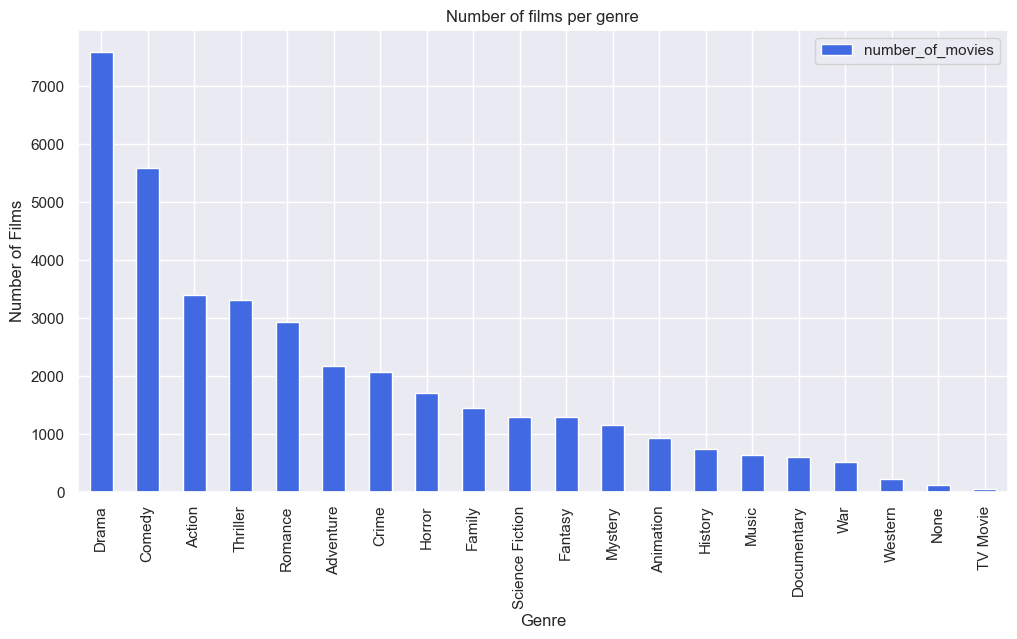

In [122]:
# Vẽ biểu đồ bar để hiển thị số lượng bộ phim theo thể loại
genresDict = dict()
for genre in data["genres_reform"]:
    for elem in genre:
        if elem not in genresDict:
            genresDict[elem] = 1
        else:
            genresDict[elem] += 1

# Chuyển đổi genresDict thành DataFrame và vẽ biểu đồ
sns.set(rc={'figure.figsize':(12,6)})
genres_df = pd.DataFrame.from_dict(genresDict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")

Ba thể loại phim phổ biến nhất là Drama, Comedy và Action

In [123]:
# Phân tích doanh thu trung bình và trung vị theo thể loại
for g in genres_df.index.values:
    data[g] = data['genres_reform'].apply(lambda x: 1 if g in x else 0)

# Tính doanh thu trung vị cho mỗi thể loại
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_rev"] = data[data[g]==1].revenue.median()

# Sắp xếp thể loại theo số lượng bộ phim và doanh thu trung vị
genres_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# Tính doanh thu trung bình cho mỗi thể loại
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "mean_rev"] = data[data[g]==1].revenue.mean()

# Sắp xếp thể loại theo số lượng bộ phim và doanh thu trung bình
genres_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

number_of_movies  median_rev      mean_rev
Drama                  7589   3696418.0  2.967011e+07
Comedy                 5595   7027290.0  4.411775e+07
Action                 3391  13249535.0  8.776612e+07
Thriller               3319   8029345.0  4.768264e+07
Romance                2933   5753678.0  3.429376e+07
Adventure              2175  23920048.0  1.339080e+08
Crime                  2070   8004664.5  4.024248e+07
Horror                 1702   3516613.5  2.809686e+07
Family                 1445  17658000.0  9.448427e+07
Fantasy                1292  17958643.5  1.118145e+08

Text(0.5, 0, 'Genre')

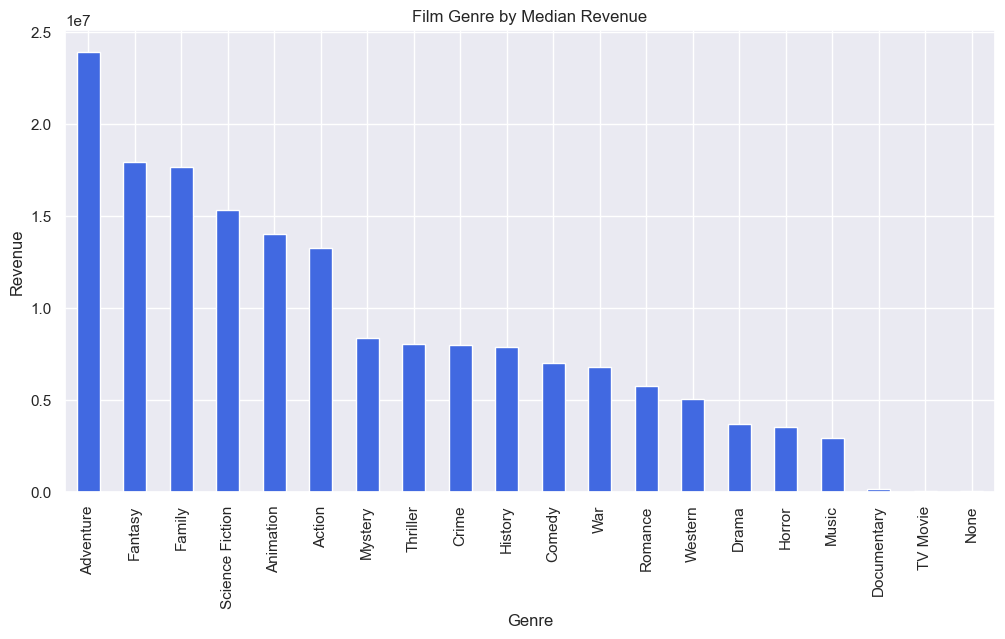

In [124]:
# Vẽ biểu đồ bar thể loại theo doanh thu trung vị
genres_df.sort_values(by=["median_rev"], ascending=False).median_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Median Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

Text(0.5, 0, 'Genre')

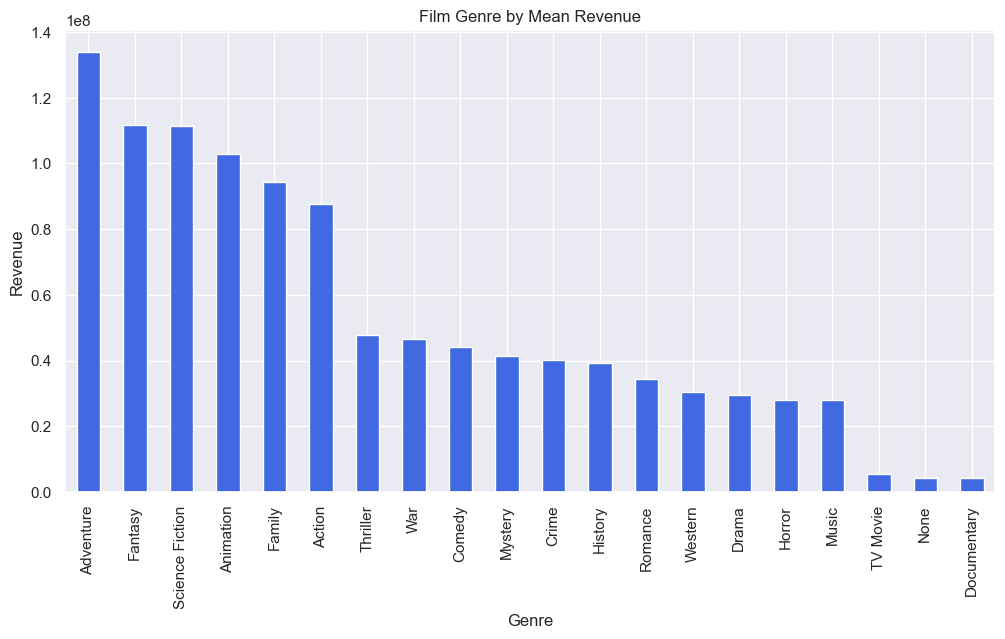

In [125]:
# Vẽ biểu đồ bar thể loại theo doanh thu trung bình
genres_df.sort_values(by=["mean_rev"], ascending=False).mean_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

Cả trong 'Thể loại phim theo Doanh thu Trung bình' và 'Thể loại phim theo Doanh thu Trung vị', phim thuộc thể loại Adventure đều có giá trị doanh thu cao nhất, với thứ tự khá ổn định từ trên xuống, trừ một số thay đổi về thứ bậc đáng chú ý.

Mặc dù một số thể loại phim phổ biến (có số lượng phim lớn trong dữ liệu huấn luyện) đạt kết quả tốt về doanh thu, nhưng giả thuyết tổng quát rằng sự phổ biến của một bộ phim sẽ có mối tương quan tích cực với doanh thu bị phủ định bởi doanh thu tương đối thấp của các thể loại Drama, Comedy và Action (ba thể loại phim phổ biến nhất). 

Điều này có thể là kết quả của nhu cầu thể loại quá mức, hoặc có thể không liên quan. Nhưng có một điểm chắc chắn là phim Adventure, Family, Sci-Fi, Fantasy và Animation đều có doanh thu tốt cả về trung vị và trung bình.

<Axes: >

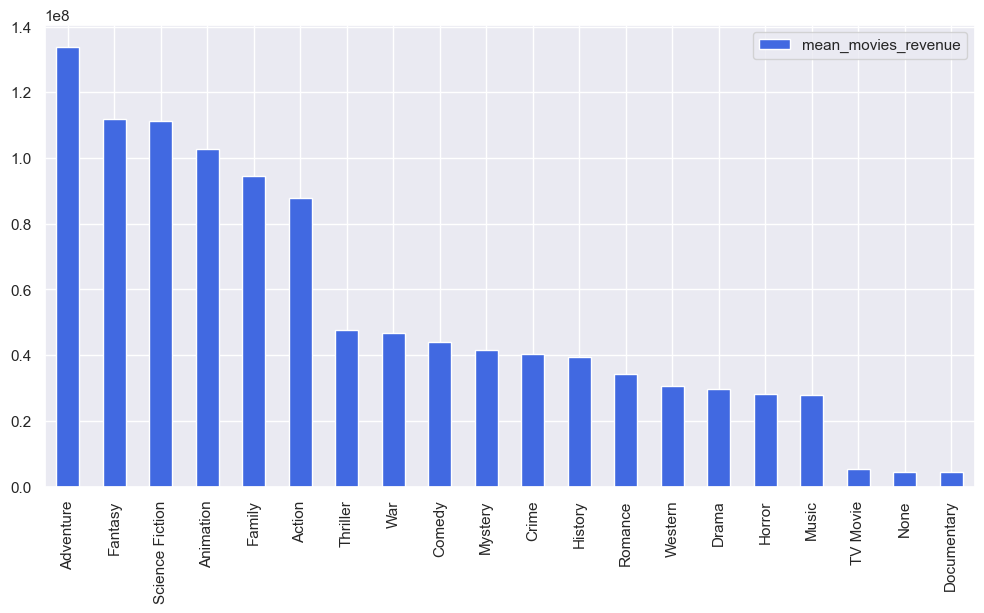

In [126]:
# Tạo từ điển chứa thông tin về doanh thu trung bình của mỗi thể loại phim
topGenreDict = {}
for element in data[["revenue", "genres_reform"]].values:
   # So sánh kết quả khi xét đến thể loại phim chính
    for i in range(len(element[1])):
        if element[1][i] not in topGenreDict:
            topGenreDict[element[1][i]] = [element[0], 1]  # Tạo mới hoặc cộng dồn doanh thu và số lượng phim
        else:
            topGenreDict[element[1][i]][0] += element[0]  # Cộng dồn doanh thu
            topGenreDict[element[1][i]][1] += 1  # Cộng số lượng phim

# Tính doanh thu trung bình của mỗi thể loại
for genre in topGenreDict:
    topGenreDict[genre][0] = topGenreDict[genre][0] / topGenreDict[genre][1]  # Chia tổng doanh thu cho số lượng phim
    topGenreDict[genre] = topGenreDict[genre][0]

# Tạo DataFrame từ từ điển topGenreDict với cột "mean_movies_revenue" chứa doanh thu trung bình
genres_df = pd.DataFrame.from_dict(topGenreDict, orient='index', columns=["mean_movies_revenue"])
# Vẽ biểu đồ bar 25 thể loại phim có doanh thu trung bình cao nhất
genres_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='royalblue')

In [127]:
# Sắp xếp lại các từ điển để dễ dàng truy cập các thể loại phim thành công nhất
topGenreDict = {k: v for k, v in sorted(topGenreDict.items(), key=lambda item: item[1], reverse=False)}
genresDict = {k: v for k, v in sorted(genresDict.items(), key=lambda item: item[1], reverse=True)}

print(topGenreDict)  # In ra topGenreDict
print(genresDict)  # In ra genresDict

{'Documentary': 4341620.440397351, 'None': 4364902.917355372, 'TV Movie': 5391240.840909091, 'Music': 27898425.703588143, 'Horror': 28096859.125146884, 'Drama': 29666199.12676242, 'Western': 30461880.172727272, 'Romance': 34293755.56870099, 'History': 39279770.84913217, 'Crime': 40242476.91304348, 'Mystery': 41459507.64930555, 'Comedy': 44117750.01680072, 'War': 46622203.13269231, 'Thriller': 47682641.773124434, 'Action': 87766115.02713063, 'Family': 94484265.4484429, 'Animation': 102644805.56883672, 'Science Fiction': 111326190.67182663, 'Fantasy': 111814510.59133127, 'Adventure': 133907992.2708046}
{'Drama': 7589, 'Comedy': 5595, 'Action': 3391, 'Thriller': 3319, 'Romance': 2933, 'Adventure': 2175, 'Crime': 2070, 'Horror': 1702, 'Family': 1445, 'Science Fiction': 1292, 'Fantasy': 1292, 'Mystery': 1152, 'Animation': 937, 'History': 749, 'Music': 641, 'Documentary': 604, 'War': 520, 'Western': 220, 'None': 121, 'TV Movie': 44}


In [128]:
# Hàm tính toán vị trí thể loại phim trong danh sách các thể loại thành công nhất
def getGenreRank(genres):
    sum = 0
    for g in genres:
        sum += list(topGenreDict.keys()).index(g)  # Tính tổng chỉ số của các thể loại trong topGenreDict
    return (sum / len(genres))  # Trả về giá trị trung bình chỉ số

In [129]:
# Áp dụng hàm getGenreRank vào cột 'genres_reform' và tạo cột 'genre_rank'
data['genre_rank'] = data['genres_reform'].apply(lambda x: getGenreRank(x) if len(x) > 0 else 0)
data['genre_rank'].value_counts()  # Đếm số lượng các giá trị trong cột 'genre_rank'

genre_rank
5.000000     1396
11.000000    1333
9.000000     1312
8.000000      862
6.000000      789
             ... 
15.833333       1
10.888889       1
3.333333        1
9.166667        1
7.400000        1
Name: count, Length: 150, dtype: int64

Sử dụng dict của top genres (theo doanh thu), tạo ra một hệ thống xếp hạng sẽ sử dụng như một đặc trưng cho mô hình. 

Xếp hạng càng cao của một thể loại phim (dựa trên trung bình của tất cả các thể loại được liệt kê), thì thể loại đó thường tạo ra ít doanh thu hơn.

In [130]:
# Thêm các cột đặc trưng vào danh sách features
num_features.append('genre_rank')
num_features.append('num_genres')

In [131]:
# Phân tích tương quan giữa 'genre_rank' và 'revenue'
corr, _ = pearsonr(data['genre_rank'], data['revenue'])
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)

# Phân tích tương quan sau khi chuyển log của 'genre_rank' và 'revenue'
corr, _ = pearsonr(np.log1p(data['genre_rank']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed genre_rank and log transformed revenue: %.3f' % corr)

Pearsons correlation between genre_rank and revenue: 0.258
Pearsons correlation between log transformed genre_rank and log transformed revenue: 0.291


In [132]:
# Phân tích tương quan giữa 'num_genres' và 'revenue'
corr, _ = pearsonr(data['num_genres'], data['revenue'])
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)

# Phân tích tương quan sau khi chuyển log của 'num_genres' và 'revenue'
corr, _ = pearsonr(np.log1p(data['num_genres']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed num_genres and log transformed revenue: %.3f' % corr)

Pearsons correlation between num_genres and revenue: 0.178
Pearsons correlation between log transformed num_genres and log transformed revenue: 0.253


Nhận thấy rằng có mối tương quan giữa thứ hạng thể loại và doanh thu do chúng tôi tạo ra, sau đó là mối tương quan yếu hơn giữa số lượng thể loại và doanh thu.

## Production Companies

Cột này chứa tất cả các công ty sản xuất trên mỗi bộ phim. Vì có một số studio cực kỳ nổi tiếng và có danh tiếng nên điều này có thể đóng vai trò dự đoán doanh thu.

In [133]:
# Kiểm tra các công ty sản xuất trong dữ liệu
data['production_companies']  # Cột chứa tên các công ty sản xuất

id
27205      Legendary Pictures, Syncopy, Warner Bros. Pict...
157336     Legendary Pictures, Syncopy, Lynda Obst Produc...
155        DC Comics, Legendary Pictures, Syncopy, Isobel...
19995      Dune Entertainment, Lightstorm Entertainment, ...
24428                                         Marvel Studios
                                 ...                        
381425                                                   NaN
858358                                                   NaN
1041642                                       My Faith Votes
381511                                     Aceldoredon, SEHR
1031609                                                  NaN
Name: production_companies, Length: 15946, dtype: object

Giống như cột thể loại, dữ liệu yêu cầu tiền xử lý để chúng tôi có thể phân tích và làm việc với nó tốt hơn. Chúng tôi cũng sẽ trích xuất tên studio ngăn cách bằng dấu ",".


In [134]:
# Đầu tiên, kiểm tra giá trị thiếu (NaN) trong cột 'production_companies'
data['production_companies'].isna().sum()

np.int64(926)

In [135]:
# Thay thế giá trị NaN bằng chuỗi 'None' trong cột 'production_companies'
data['production_companies'] = data['production_companies'].fillna('None')

# Chuyển đổi chuỗi các công ty sản xuất thành danh sách các công ty, loại bỏ khoảng trắng thừa
data['production_companies_reform'] = data['production_companies'].apply(lambda x: [comp.strip() for comp in x.split(',')])

Điều đầu tiên sẽ xem xét sau khi phân loại dữ liệu là số lượng công ty sản xuất trên mỗi bộ phim. Đây có thể là một tính năng thú vị cho mô hình.

In [136]:
# Tạo cột 'num_studios', tính số lượng công ty sản xuất liên kết với mỗi bộ phim
data['num_studios'] = data.production_companies_reform.apply(lambda x: len(x) if x[0] != 'None' else 0)

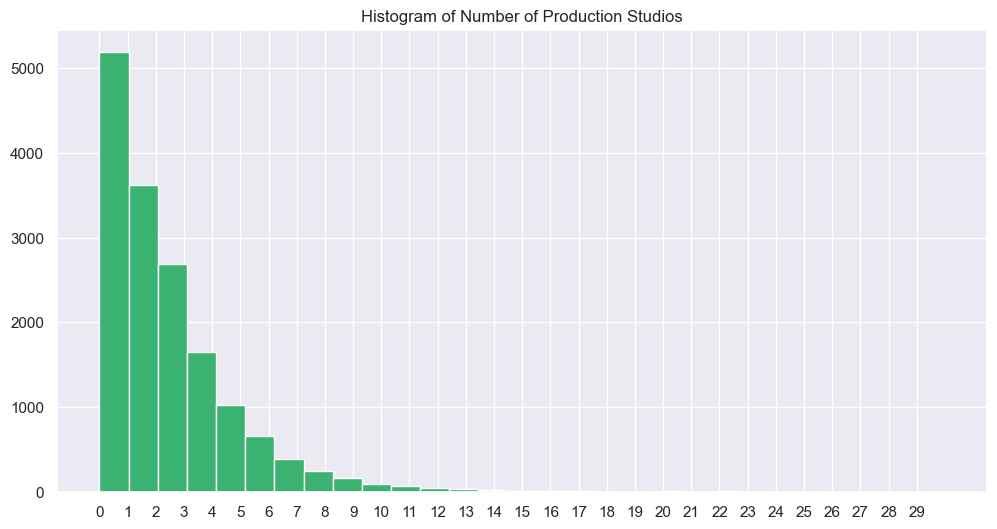

In [137]:
# Vẽ histogram để thể hiện phân phối số lượng công ty sản xuất trong các bộ phim
plt.hist(data['num_studios'], color='mediumseagreen', bins=29, alpha=1)
plt.rc('figure', figsize=(15,6))
plt.title('Histogram of Number of Production Studios')  # Tiêu đề của biểu đồ
plt.xticks(range(30))  # Điều chỉnh các nhãn trên trục x
plt.show()

Hầu hết các bộ phim đều có từ 1 đến 4 công ty sản xuất, ít phim có số lượng cao hơn và một số thậm chí còn có 0 đối tác hãng phim (phim độc lập). 

Tuy nhiên, chỉ dựa vào số lượng công ty sản xuất khổng lồ nên rất khó để đưa ra giả thuyết hợp lý về thành công phòng vé của bộ phim. 

Thay vào đó, việc xác định các công ty sản xuất lớn hơn, có uy tín hơn hoặc thành công trước đó và áp dụng những phát hiện đó vào việc liệu các bộ phim dữ liệu được đề cập có cho biết các hãng phim sẽ là cách hữu ích hơn để phân tích tác động của các công ty sản xuất hay không.

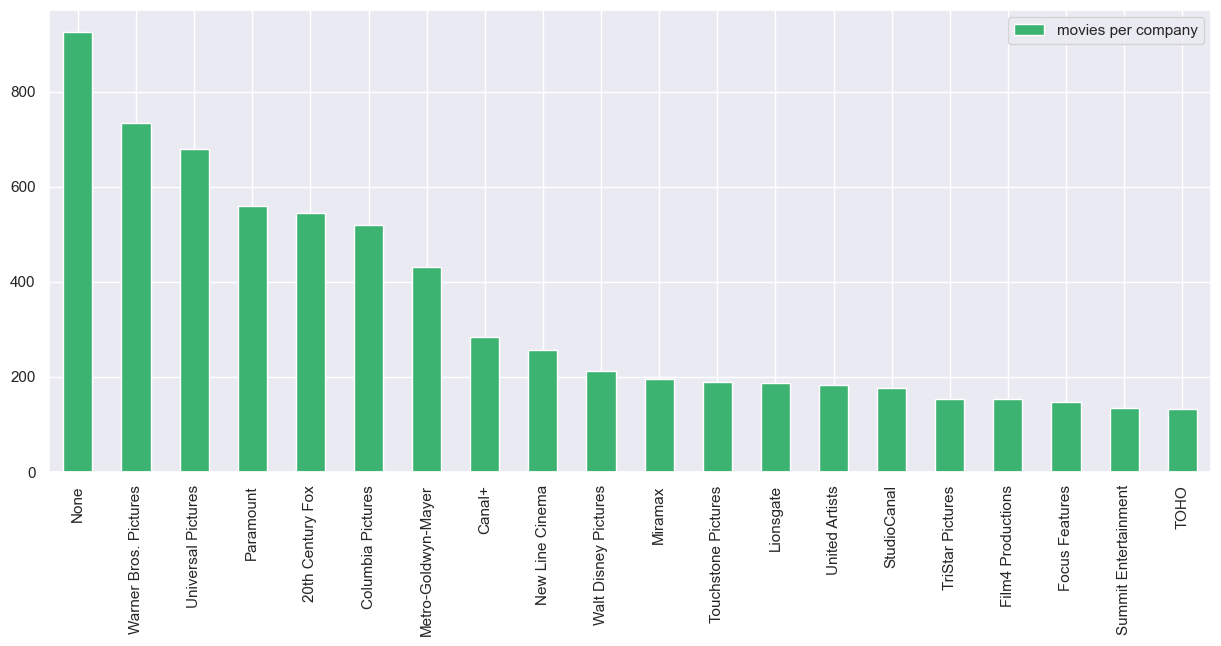

In [138]:
# Tạo từ điển đếm số lần xuất hiện của mỗi công ty sản xuất trong bộ dữ liệu
companiesDict = {}
for element in data["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict:
            companiesDict[company] = 1
        else:
            companiesDict[company] += 1

# Chuyển từ điển thành DataFrame và sắp xếp theo số lần xuất hiện của công ty
companies_train = pd.DataFrame.from_dict(companiesDict, orient='index', columns=["movies per company"])
companies_train.sort_values(by="movies per company", ascending=False).head(20).plot.bar(color='mediumseagreen')

# Đổi tên cột trong DataFrame
companies_train.columns = ["number_of_studios"]

Việc sử dụng số lượng phim của mỗi công ty sản xuất có thể hữu ích trong việc xác định hãng phim nào lớn nhất và mối tương quan giữa quy mô của một công ty sản xuất ảnh hưởng như thế nào đến sự thành công của phim. 

Có hai khả năng; hoặc 1. một hãng phim lớn hơn có kinh phí và phương tiện để thu hút dàn diễn viên và đoàn làm phim tên tuổi, với kinh nghiệm cần thiết để biến dự án đó thành một dự án phim thành công hoặc 2. hãng phim được nhượng quyền quá nhiều để tạo ra những ý tưởng mới lạ thành công và chỉ đơn thuần là liên tục bơm ra những bộ phim có thành tích tầm thường. 

Mặc dù một số khả năng có thể xảy ra nhưng công nghệ máy học sẽ giúp cân nhắc mức độ ảnh hưởng tương đối của quy mô trường quay đến doanh thu dự đoán của bộ phim. Đánh dấu liệu một trong những hãng phim lớn này có tham gia vào một bộ phim hay không sẽ là một tính năng hữu ích để xác định mối liên hệ này

In [139]:
# Bivariate analysis: Kiểm tra mối quan hệ giữa doanh thu và số công ty sản xuất
companiesDict2 = {}
for element in data["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict2:
            companiesDict2[company] = 1
        else:
            companiesDict2[company] += 1

companies_df = pd.DataFrame.from_dict(companiesDict2, orient='index', columns=["movies per company"])

companies_df.columns = ["number_of_studios"]

Text(0.5, 0, 'Production Studio')

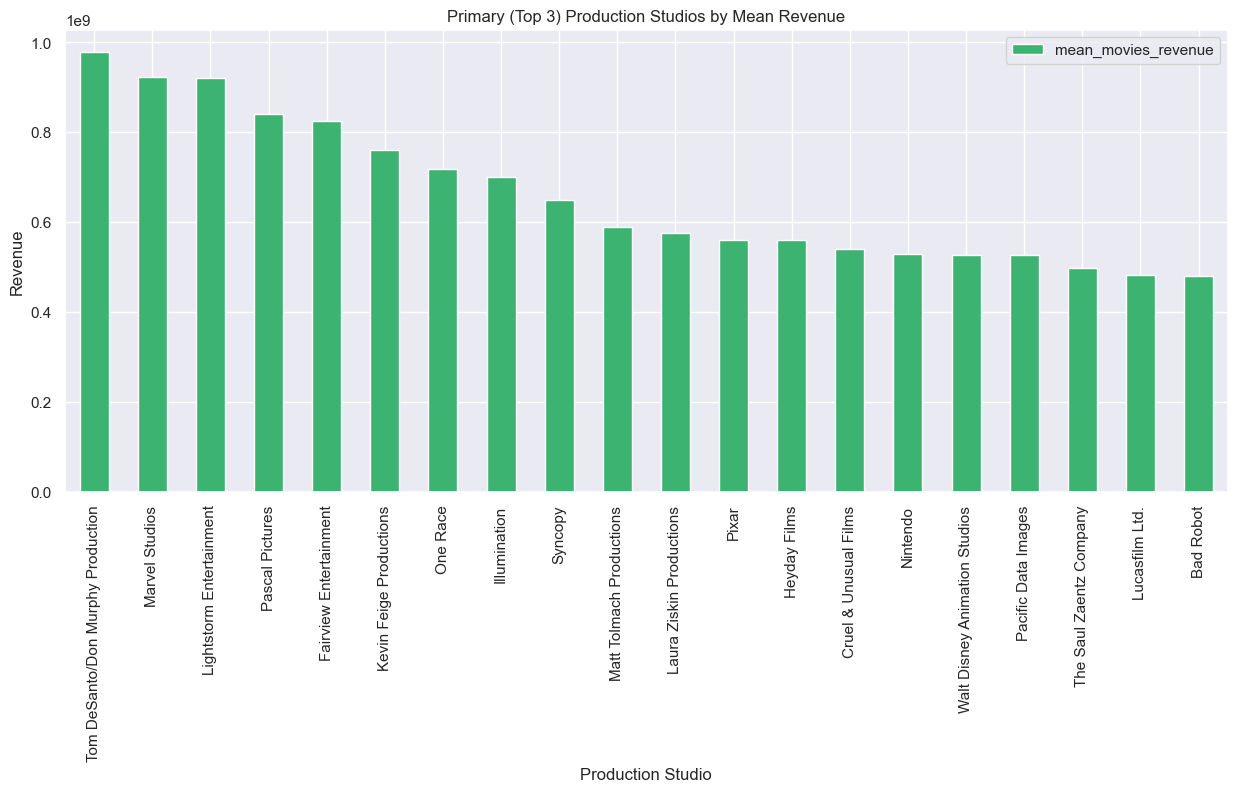

In [140]:
# Phân tích các công ty sản xuất chính (tối đa 3 công ty)
studiosDict = {}
for element in data[["revenue", "production_companies_reform"]].values:
   temp = 3  # Chọn tối đa 3 công ty sản xuất cho mỗi phim
   if len(element[1]) < temp:
        temp = len(element[1])
   for i in range(temp):
        if element[1][i] not in studiosDict:
            studiosDict[element[1][i]] = [element[0], 1]  # Lưu doanh thu và số lượng phim cho công ty
        else:
            studiosDict[element[1][i]][0] += element[0]
            studiosDict[element[1][i]][1] += 1    

# Chỉ giữ lại các công ty sản xuất có ít nhất 3 phim
studiosDict = {k: v for k, v in studiosDict.items() if v[1] >= 3}

# Tính doanh thu trung bình của các công ty sản xuất
for company in studiosDict:
    studiosDict[company][0] = studiosDict[company][0] / studiosDict[company][1]
    studiosDict[company] = studiosDict[company][0]

# Tạo DataFrame từ điển studiosDict và vẽ biểu đồ các công ty sản xuất chính có doanh thu cao nhất
studios_train = pd.DataFrame.from_dict(studiosDict, orient='index', columns=["mean_movies_revenue"])
studios_train.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar(color='mediumseagreen')
plt.title("Primary (Top 3) Production Studios by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Production Studio")

<Axes: >

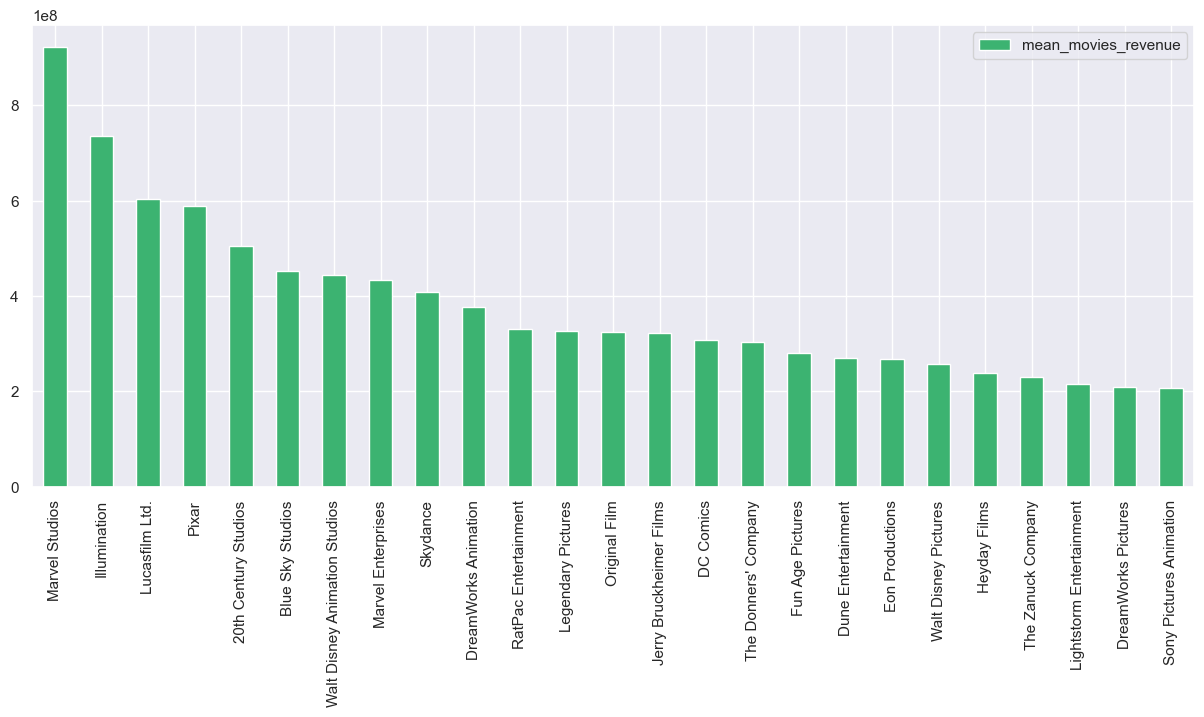

In [141]:
# Tạo từ điển cho các công ty sản xuất chính (tối đa 1 công ty)
topStudiosDict = {}
for element in data[["revenue", "production_companies_reform"]].values:
   temp = 1  # Chỉ lấy công ty sản xuất đầu tiên
   if len(element[1]) < temp:
        temp = len(element[1])
   for i in range(temp):
        if element[1][i] not in topStudiosDict:
            topStudiosDict[element[1][i]] = [element[0], 1]
        else:
            topStudiosDict[element[1][i]][0] += element[0]
            topStudiosDict[element[1][i]][1] += 1    

# Chỉ giữ lại các công ty sản xuất có ít nhất 5 phim
topStudiosDict = {k: v for k, v in topStudiosDict.items() if v[1] >= 5}

# Tính doanh thu trung bình của các công ty sản xuất chính
for company in topStudiosDict:
    topStudiosDict[company][0] = topStudiosDict[company][0] / topStudiosDict[company][1]
    topStudiosDict[company] = topStudiosDict[company][0]

# Vẽ biểu đồ các công ty sản xuất chính với doanh thu trung bình cao nhất
studios_df = pd.DataFrame.from_dict(topStudiosDict, orient='index', columns=["mean_movies_revenue"])
studios_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='mediumseagreen')

In [142]:
# Sắp xếp từ điển studiosDict và topStudiosDict theo doanh thu để dễ dàng truy cập các công ty sản xuất thành công nhất
topStudiosDict = {k: v for k, v in sorted(topStudiosDict.items(), key=lambda item: item[1], reverse=True)}
studiosDict = {k: v for k, v in sorted(studiosDict.items(), key=lambda item: item[1], reverse=True)}

# Hàm kiểm tra nếu công ty sản xuất là một 'studio top'
def checkTopStudios(studio):
    if len(studio) < 1 or studio[0] not in list(topStudiosDict)[:50]:
        return 0
    else:
        return 1

# Hàm kiểm tra nếu công ty sản xuất thuộc 'studios' có doanh thu cao
def checkStudios(studio):
    if len(studio) < 1:
        return 0
    count = 0
    for company in studio[:10]:  # Kiểm tra đến 10 công ty sản xuất
        if company in list(studiosDict)[:100]:  # Xem công ty có trong danh sách studiosDict
            count += 1
    return count

# Hàm tính thứ hạng studio
def getStudioRanks(studios):
    if len(studios) < 1:
        return 400  # Giá trị lớn nếu không có studio
    rank = 0
    for s in studios[:5]:  # Lấy tối đa 5 studio
        if s in list(studiosDict):
            rank += list(studiosDict.keys()).index(s)
    if rank == 0:
        rank = 400
    return rank / len(studios)

# Tạo các tính năng mới về studio top
data['topStudio'] = data['production_companies_reform'].apply(lambda x: checkTopStudios(x))
# Tạo tính năng số lượng studio top
data['numTopStudios'] = data['production_companies_reform'].apply(lambda x: checkStudios(x))

# Tạo tính năng thứ hạng studio
data['studioRank'] = data['production_companies_reform'].apply(lambda x: getStudioRanks(x))

# In ra các giá trị thống kê của các tính năng vừa tạo
print(data['topStudio'].value_counts())
print()
print(data['numTopStudios'].value_counts())
print()
print(data['studioRank'].value_counts())

topStudio
0    15163
1      783
Name: count, dtype: int64

numTopStudios
0    14709
1      918
2      268
3       43
4        6
5        2
Name: count, dtype: int64

studioRank
400.000000     1749
1645.000000     926
200.000000      639
133.333333      278
662.000000      172
               ... 
702.333333        1
1605.666667       1
1584.000000       1
1934.000000       1
257.500000        1
Name: count, Length: 5816, dtype: int64


Trong nỗ lực định lượng tác động của các studio sản xuất, đã tạo hai dict, một trong số tất cả các studio khác nhau và một trong tất cả các studio chính (có nghĩa là studio đầu tiên được liệt kê) và sắp xếp dựa trên doanh thu trung bình. 

Sau đó, đã tạo hai cột mới để giúp đo lường tác động của một studio, đó là topStudio và numTopStudios. Cột topStudio thể hiện liệu studio chính được liệt kê có phải là một trong 25 studio chính hàng đầu được liệt kê hay không, trong khi numTopStudios là số lượng studio hàng đầu (theo doanh thu) đã làm việc cho bộ phim.

In [143]:
# Phân tích mối quan hệ giữa các tính năng với doanh thu (sử dụng Pearson correlation)
corr, _ = pearsonr(data['topStudio'], data['revenue'])
print('Pearsons correlation between topStudio and revenue: %.3f' % corr)
corr, _ = pearsonr(data['topStudio'], np.log1p(data['revenue']))
print('Pearsons correlation between topStudio and revenue: %.3f' % corr)
print()

corr, _ = pearsonr(data['numTopStudios'], data['revenue'])
print('Pearsons correlation between numTopStudios and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['numTopStudios']), np.log1p(data['revenue']))
print('Pearsons correlation between numTopStudios and revenue: %.3f' % corr)
print()

corr, _ = pearsonr(data['studioRank'], data['revenue'])
print('Pearsons correlation between studioRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['studioRank']), np.log1p(data['revenue']))
print('Pearsons correlation between studioRank and revenue: %.3f' % corr)
print()

corr, _ = pearsonr(data['num_studios'], data['revenue'])
print('Pearsons correlation between num_studios and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['num_studios']), np.log1p(data['revenue']))
print('Pearsons correlation between num_studios and revenue: %.3f' % corr)

Pearsons correlation between topStudio and revenue: 0.419
Pearsons correlation between topStudio and revenue: 0.242

Pearsons correlation between numTopStudios and revenue: 0.570
Pearsons correlation between numTopStudios and revenue: 0.311

Pearsons correlation between studioRank and revenue: -0.248
Pearsons correlation between studioRank and revenue: -0.329

Pearsons correlation between num_studios and revenue: 0.076
Pearsons correlation between num_studios and revenue: 0.321


Quan sát thấy mối tương quan giữa các thuộc tính mới dùng để định lượng các studio hàng đầu. Điều này thật đáng khích lệ vì nó có thể phản ánh một số khả năng dự đoán về doanh thu.

Ngoài ra còn có mối tương quan tích cực yếu hơn giữa số lượng hãng phim trên một bộ phim và doanh thu

In [144]:
# Thêm các tính năng vào danh sách các đặc trưng (features)
cat_features.append('topStudio')  # Thêm tính năng topStudio vào các đặc trưng phân loại
num_features.append('numTopStudios')  # Thêm tính năng numTopStudios vào các đặc trưng số
num_features.append('num_studios')  # Thêm tính năng num_studios vào các đặc trưng số
num_features.append('studioRank')  # Thêm tính năng studioRank vào các đặc trưng số

## Production Countries

Cột này chứa tất cả các quốc gia khác nhau nơi bộ phim được sản xuất. Phim được quay trên khắp thế giới và có một số địa điểm nhất định phổ biến hơn để quay phim, vì vậy, việc khám phá dữ liệu ở đây có thể rất thú vị.

In [145]:
# Kiểm tra dữ liệu các quốc gia sản xuất của các bộ phim
data.production_countries.head(10)  # Hiển thị 10 giá trị đầu tiên của cột 'production_countries'

id
27205     United Kingdom, United States of America
157336    United Kingdom, United States of America
155       United Kingdom, United States of America
19995     United States of America, United Kingdom
24428                     United States of America
293660                    United States of America
299536                    United States of America
550                       United States of America
118340                    United States of America
680                       United States of America
Name: production_countries, dtype: object

In [146]:
print('Movies missing production countries:', data.production_countries.isna().sum())  # Kiểm tra số lượng phim thiếu quốc gia sản xuất

Movies missing production countries: 483


Một lần nữa, trích xuất tên các quốc gia ngăn cách bằng dấu ",".

In [147]:
# Xử lý giá trị thiếu trong cột 'production_countries'
data['production_countries'] = data['production_countries'].fillna('None')  # Thay thế giá trị thiếu bằng 'None'
data['production_countries_reform'] = data['production_countries'].apply(lambda x: [genre.strip() for genre in x.split(',')])  # Tách tên quốc gia và loại bỏ khoảng trắng

In [148]:
# Tạo cột 'num_production_countries' để lưu số lượng quốc gia sản xuất của mỗi bộ phim
data['num_production_countries'] = data.production_countries_reform.apply(lambda x: len(x) if x[0] != 'None' else 0)  # Tính số lượng quốc gia sản xuất

<Axes: xlabel='num_production_countries', ylabel='count'>

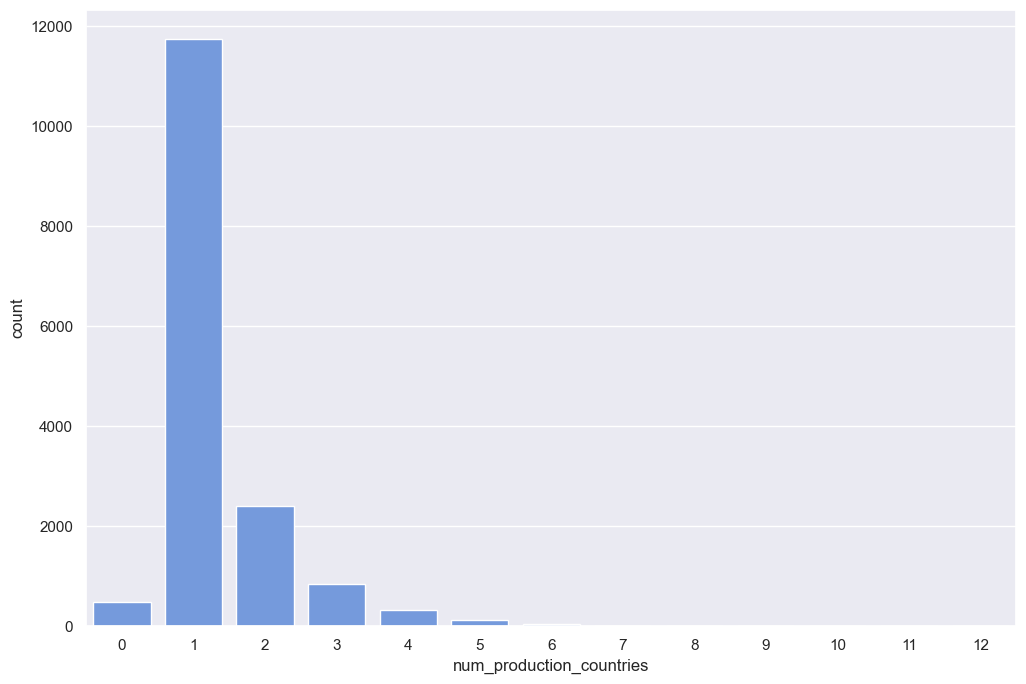

In [149]:
# Vẽ biểu đồ đếm số quốc gia sản xuất phim
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=data.num_production_countries, color='cornflowerblue')  # Vẽ đồ thị cột để đếm số lượng phim theo số quốc gia sản xuất

<Axes: >

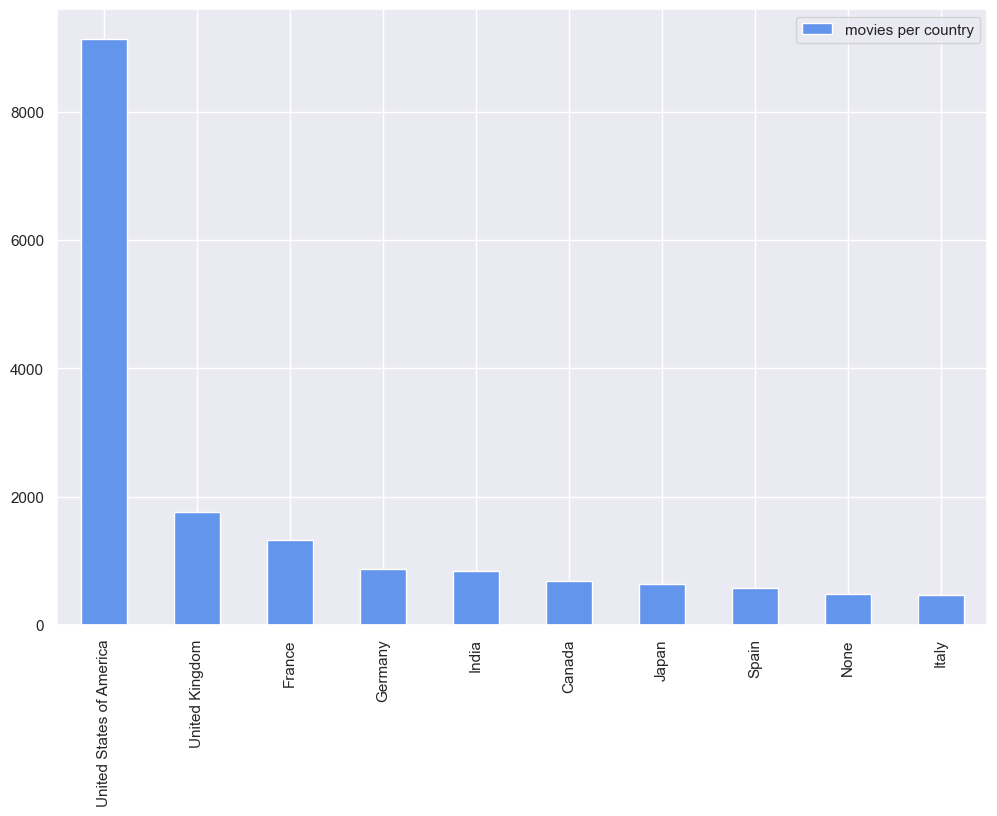

In [150]:
# Tạo từ điển đếm số phim của từng quốc gia
countriesDict = {}
for element in data["production_countries_reform"].values:
    for country in element:
        if country not in countriesDict:
            countriesDict[country] = 1
        else:
            countriesDict[country] += 1

# Chuyển từ điển thành DataFrame để dễ dàng xử lý và vẽ biểu đồ
countries_train = pd.DataFrame.from_dict(countriesDict, orient='index', columns=["movies per country"])
countries_train.sort_values(by="movies per country", ascending=False).head(10).plot.bar(color='cornflowerblue')  # Vẽ biểu đồ cột cho 10 quốc gia sản xuất nhiều phim nhất

Từ biểu đồ, có thể thấy rằng phần lớn các bộ phim đều được sản xuất ở Mỹ, với vị trí cao thứ hai (Vương quốc Anh) kém xa một cách đáng kinh ngạc. 

Do quan sát này, sẽ không xem xét tất cả các quốc gia sản xuất khác nhau mà thay vào đó tạo một thuộc tính mới cho biết liệu một bộ phim có được sản xuất ở Mỹ hay không.

In [151]:
# Tạo tính năng mới: phim sản xuất tại Mỹ hay không
data['usa_produced'] = data.production_countries_reform.apply(lambda x: 1 if 'United States of America' in x else 0)  # Tạo cột nhị phân đánh dấu phim sản xuất tại Mỹ
data['usa_produced'].value_counts()  # Kiểm tra phân phối của cột 'usa_produced'

usa_produced
1    9138
0    6808
Name: count, dtype: int64

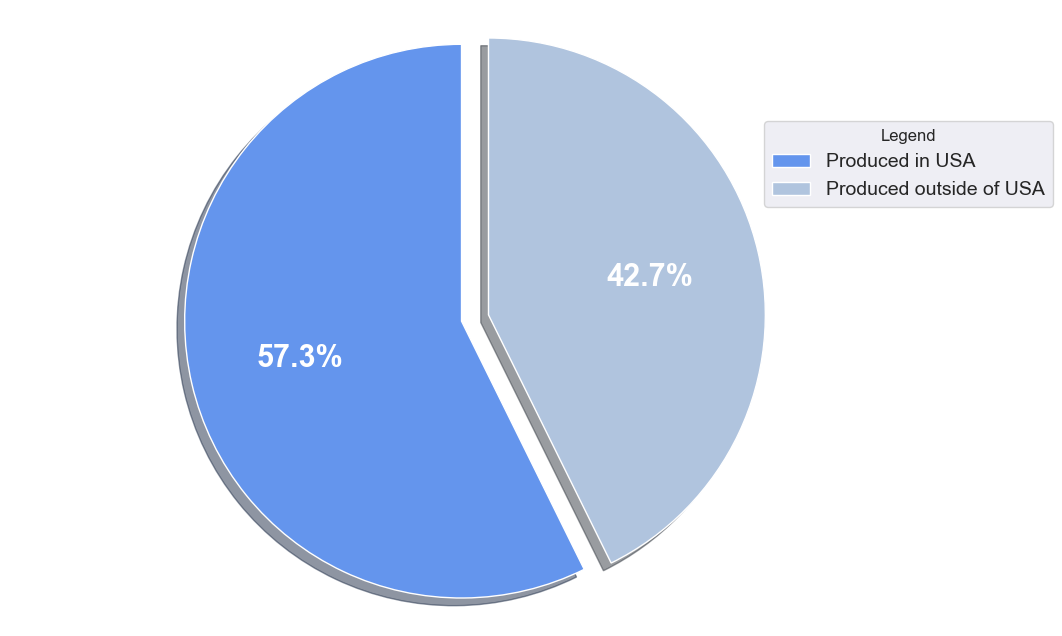

In [152]:
# Vẽ biểu đồ bánh cho tỷ lệ phim sản xuất tại Mỹ và ngoài Mỹ
labels = 'Produced in USA', 'Produced outside of USA'  # Nhãn cho các phân loại
btc_1 = [sum(data.usa_produced), (data.usa_produced == 0).sum(axis=0)]  # Tổng số phim sản xuất tại Mỹ và ngoài Mỹ
explode = (0.1, 0)  # Tạo hiệu ứng phóng to cho phần 'Produced in USA'

colors = ['cornflowerblue', 'lightsteelblue']  # Màu sắc cho biểu đồ

fig, ax = plt.subplots()  # Vẽ biểu đồ bánh
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')  # Đảm bảo biểu đồ có dạng hình tròn

ax.legend(labels,  # Thêm chú giải vào biểu đồ
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

Text(0.5, 1.0, 'Revenue based on number of production countries')

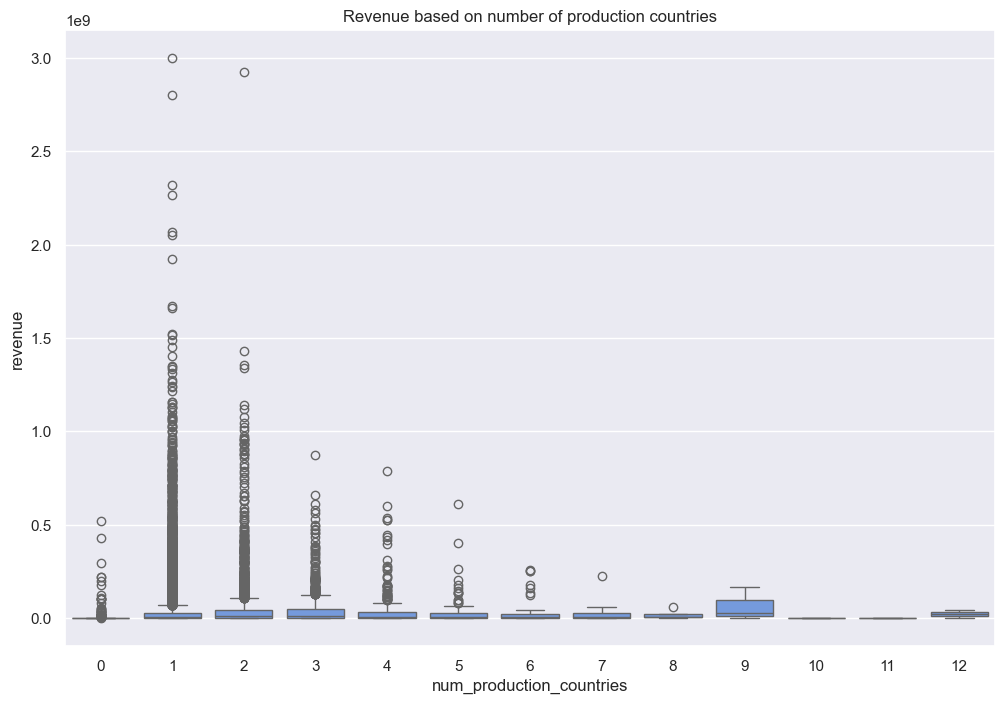

In [153]:
# Vẽ boxplot để so sánh doanh thu dựa trên số lượng quốc gia sản xuất
sns.boxplot(x='num_production_countries', y='revenue', data=data, color='cornflowerblue')
plt.title('Revenue based on number of production countries')  # Tiêu đề đồ thị

In [154]:
# Tính toán hệ số tương quan Pearson giữa số quốc gia sản xuất và doanh thu
corr, _ = pearsonr(data['num_production_countries'], data['revenue'])
print('Pearsons correlation between num_production_countries and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['num_production_countries']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed num_production_countries and log transformed revenue: %.3f' % corr)

Pearsons correlation between num_production_countries and revenue: 0.023
Pearsons correlation between log transformed num_production_countries and log transformed revenue: 0.171


Có thể thấy hầu như không có mối tương quan giữa số lượng quốc gia sản xuất và doanh thu, nhưng vẫn chưa thể loại trừ hoàn toàn mối quan hệ này.

C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\2978230279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x='usa_produced', y='revenue', data=data, palette=pal3)  # Vẽ boxplot cho doanh thu dựa trên cột 'usa_produced'


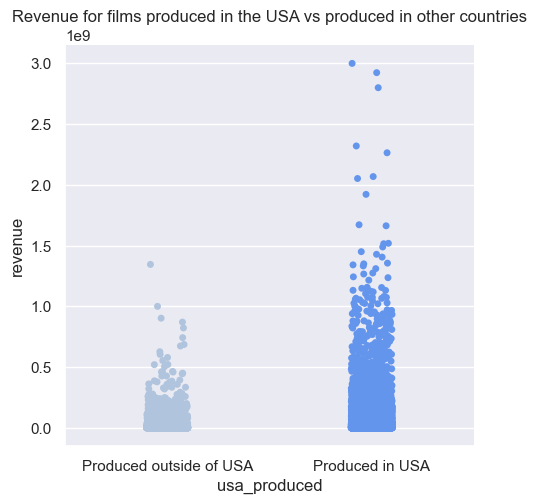

In [155]:
# Vẽ biểu đồ so sánh doanh thu giữa phim sản xuất ở Mỹ và ngoài Mỹ
pal3 = ['lightsteelblue', 'cornflowerblue']
ax = sns.catplot(x='usa_produced', y='revenue', data=data, palette=pal3)  # Vẽ boxplot cho doanh thu dựa trên cột 'usa_produced'
plt.title('Revenue for films produced in the USA vs produced in other countries')

# Thêm nhãn cho trục x
labels = 'Produced outside of USA', 'Produced in USA'
ax.set_xticklabels(labels)

In [156]:
# Tính toán hệ số tương quan Pearson giữa 'usa_produced' và doanh thu
corr, _ = pearsonr(data['usa_produced'], data['revenue'])
print('Pearsons correlation between usa_produced and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['usa_produced']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed usa_produced and log transformed revenue: %.3f' % corr)

Pearsons correlation between usa_produced and revenue: 0.212
Pearsons correlation between log transformed usa_produced and log transformed revenue: 0.339


Quan sát thấy mối tương quan giữa việc sản xuất ở Mỹ và doanh thu. Mặc dù mối tương quan không quá mạnh nhưng việc đưa vào mô hình có thể hữu ích.

In [157]:
# Thêm tính năng vào danh sách đặc trưng
num_features.append('num_production_countries')  # Thêm tính năng số quốc gia sản xuất vào danh sách đặc trưng số
cat_features.append('usa_produced')  # Thêm tính năng 'usa_produced' vào danh sách đặc trưng phân loại

## Spoken Languages

Cột này thể hiện tất cả ngôn ngữ mà phim được phát hành. 

Thấy điều này quan trọng vì nếu một bộ phim được phát hành bằng nhiều ngôn ngữ khác nhau, phim có thể tiếp cận được nhiều khán giả hơn, do đó làm tăng doanh thu. Ngôn ngữ có thể là một thuộc tính quan trọng, vì vậy hãy khám phá thêm về nó.

In [158]:
data['spoken_languages']

id
27205      English, French, Japanese, Swahili
157336                                English
155                         English, Mandarin
19995                        English, Spanish
24428                 English, Hindi, Russian
                          ...                
381425                                Persian
858358                                English
1041642                               English
381511            Albanian, English, Japanese
1031609                               Italian
Name: spoken_languages, Length: 15946, dtype: object

In [159]:
# Kiểm tra dữ liệu về các ngôn ngữ nói trong phim
print('Movies missing spoken languages:', data.spoken_languages.isna().sum())  # Kiểm tra số lượng phim thiếu ngôn ngữ nói

Movies missing spoken languages: 281


Một lần nữa, chúng tôi trích xuất các ngôn ngữ ngăn cách bằng dấu ",".

In [160]:
# Tiền xử lý ngôn ngữ nói (nếu thiếu sẽ điền giá trị rỗng)
data['spoken_languages'] = data['spoken_languages'].fillna('')  # Điền giá trị rỗng vào các giá trị thiếu
data['spoken_languages_reform'] = data['spoken_languages'].apply(lambda x: [genre.strip() for genre in x.split(',')])  # Tách danh sách ngôn ngữ và loại bỏ khoảng trắng

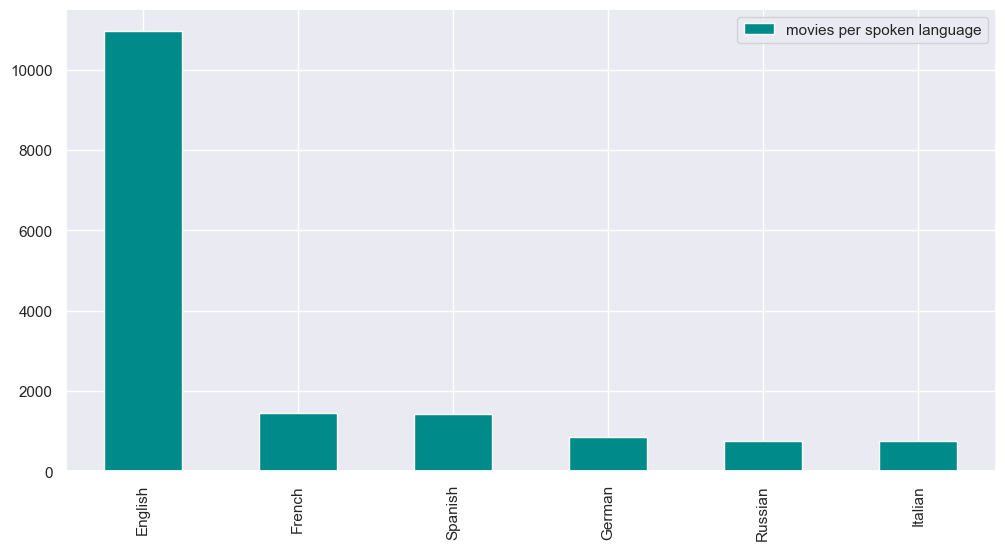

In [161]:
# Phân tích đơn biến các ngôn ngữ nói trong phim
languagesDict = {}
for element in data["spoken_languages_reform"].values:
    for name in element:
        if name not in languagesDict:
            languagesDict[name] = 1
        else:
            languagesDict[name] += 1

# Vẽ biểu đồ cột cho 6 ngôn ngữ nói phổ biến nhất trong các bộ phim
sns.set(rc={'figure.figsize':(12,6)})
languages_train = pd.DataFrame.from_dict(languagesDict, orient='index', columns=["movies per spoken language"])
languages_train.sort_values(by="movies per spoken language", ascending=False).head(6).plot.bar(color='darkcyan')

languages_train.columns = ["number_of_languages"]

Do giá trị cao hơn đáng kể đối với những bộ phim sử dụng tiếng Anh là ngôn ngữ nói, giá trị này có thể được chia thành một câu hỏi đơn giản, "Tiếng Anh có phải là ngôn ngữ nói hay không?" Điều này sẽ cung cấp cái nhìn sâu sắc thú vị về tầm quan trọng của tiếng Anh như ngôn ngữ nói như một yếu tố dẫn đến thành công của bộ phim. 

Bởi vì thị trường phim ở các quốc gia nói tiếng Anh cao hơn. Một giả thuyết hợp lý là tiếng Anh có thể không biểu thị một bộ phim thành công, nhưng việc thiếu tiếng Anh có thể làm tổn hại đến cơ hội thành công của bộ phim.

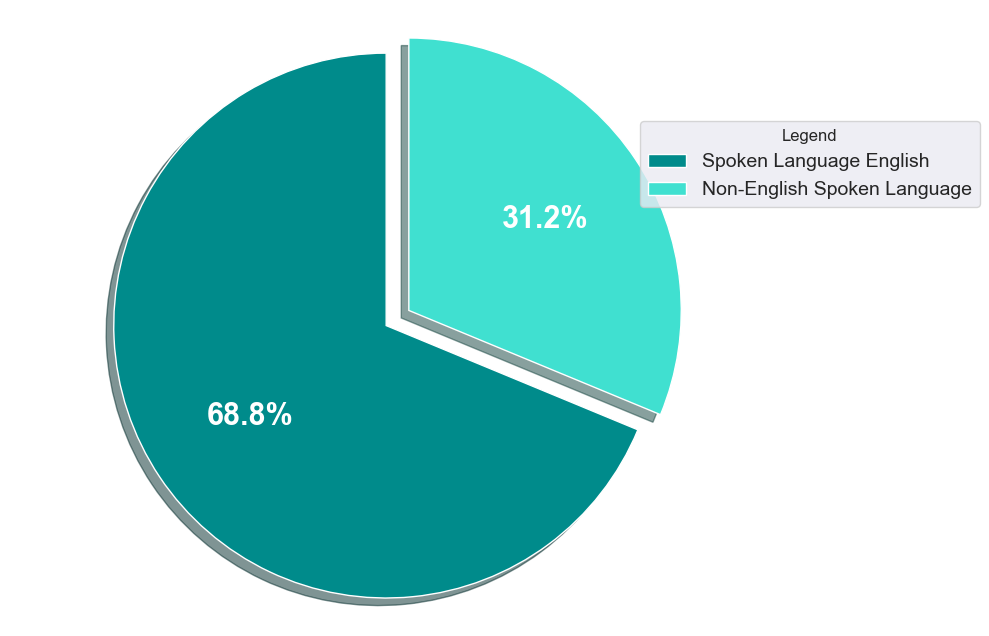

In [162]:
# Tạo tính năng mới xác định phim có sử dụng tiếng Anh không
data['released_in_english'] = data['spoken_languages_reform'].apply(lambda x: 1 if 'English' in x else 0)  
# Cột 'released_in_english' sẽ có giá trị 1 nếu tiếng Anh là ngôn ngữ nói chính trong phim, ngược lại là 0.

# Tính tổng số phim nói tiếng Anh và không phải tiếng Anh
lang = [(data.released_in_english == 1).sum(axis=0), (data.released_in_english == 0).sum(axis=0)]  # Đếm số phim nói tiếng Anh và không phải tiếng Anh

# Đặt nhãn cho biểu đồ bánh
labels = 'Spoken Language English', 'Non-English Spoken Language'
explode = (0.1, 0)  # Hiệu ứng làm nổi bật phần 'Spoken Language English'

# Vẽ biểu đồ bánh thể hiện tỷ lệ phim nói tiếng Anh và không phải tiếng Anh
colors = ["darkcyan", "turquoise"]  # Màu sắc của các phần trong biểu đồ bánh

fig, ix = plt.subplots(figsize=(10, 8))  # Vẽ biểu đồ
ix.pie(lang, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize':22, 'weight':"bold"})
ix.axis('equal')  # Đảm bảo biểu đồ có dạng tròn

# Thêm chú giải cho biểu đồ
ix.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))  # Vị trí và kiểu dáng chú giải

released_in_english
1    10963
0     4983
Name: count, dtype: int64


C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\3349185357.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='released_in_english', y='revenue', data=data, palette=pal2)  # Vẽ boxplot doanh thu dựa trên ngôn ngữ nói
C:\Users\miynzi\AppData\Local\Temp\ipykernel_12708\3349185357.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ix.set_xticklabels(labels)  # Đặt nhãn cho trục x


[Text(0, 0, 'Non-English Spoken Language'),
 Text(1, 0, 'Spoken Language English')]

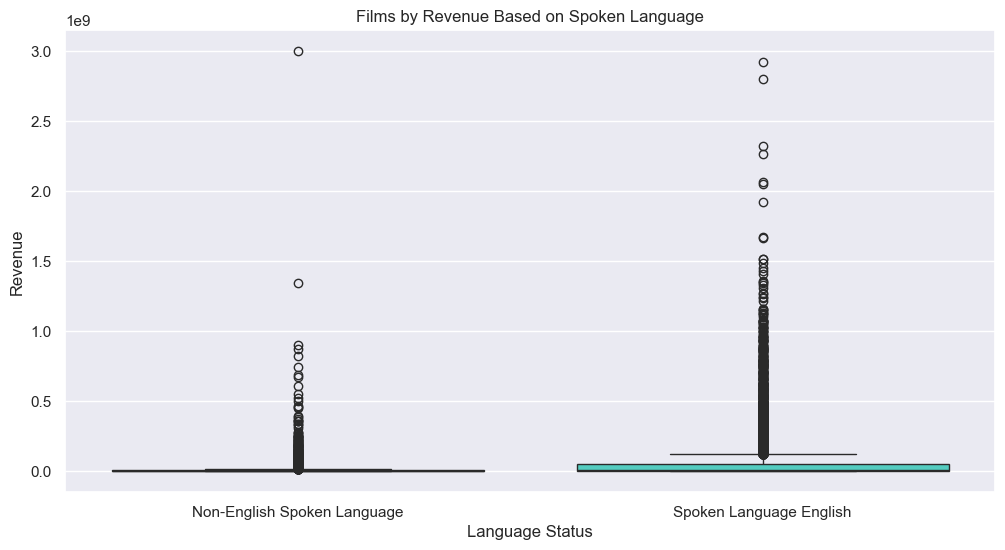

In [163]:
# Hiển thị số lượng phim theo ngôn ngữ
print(data['released_in_english'].value_counts())  # Hiển thị số lượng phim nói tiếng Anh và không phải tiếng Anh

# Tạo boxplot để so sánh doanh thu giữa các phim nói tiếng Anh và không phải tiếng Anh
labels = 'Non-English Spoken Language', 'Spoken Language English'  # Đặt nhãn cho các loại ngôn ngữ

pal2 = ["darkcyan", "turquoise"]  # Chọn màu cho biểu đồ

fig, ix = plt.subplots(figsize=(12, 6))  # Vẽ boxplot
sns.boxplot(x='released_in_english', y='revenue', data=data, palette=pal2)  # Vẽ boxplot doanh thu dựa trên ngôn ngữ nói
plt.title('Films by Revenue Based on Spoken Language')  # Tiêu đề biểu đồ
plt.ylabel("Revenue")  # Nhãn trục y
plt.xlabel("Language Status")  # Nhãn trục x

ix.set_xticklabels(labels)  # Đặt nhãn cho trục x

In [164]:
# Tính toán hệ số tương quan Pearson giữa 'released_in_english' và doanh thu
corr, _ = pearsonr(data['released_in_english'], data['revenue'])  # Hệ số tương quan giữa ngôn ngữ nói và doanh thu
print('Pearsons correlation between released_in_english and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa 'released_in_english' và doanh thu đã biến đổi logarit
corr, _ = pearsonr(data['released_in_english'], np.log1p(data['revenue']))  # Hệ số tương quan giữa ngôn ngữ nói và doanh thu logarit
print('Pearsons correlation between released_in_english and log transformed revenue: %.3f' % corr)

Pearsons correlation between released_in_english and revenue: 0.168
Pearsons correlation between released_in_english and log transformed revenue: 0.303


In [165]:
# Tạo tính năng 'num_languages' để tính số ngôn ngữ nói trong mỗi bộ phim
data['num_languages'] = data.spoken_languages_reform.apply(lambda x: len(x) if x[0] != '' else 0)  
# 'num_languages' là số lượng ngôn ngữ nói trong bộ phim

In [166]:
# Tính toán hệ số tương quan Pearson giữa số ngôn ngữ nói và doanh thu
corr, _ = pearsonr(data['num_languages'], data['revenue'])  # Hệ số tương quan giữa số ngôn ngữ và doanh thu
print('Pearsons correlation between num_languages and revenue: %.3f' % corr)

# Tính toán hệ số tương quan Pearson giữa số ngôn ngữ nói và doanh thu đã biến đổi logarit
corr, _ = pearsonr(np.log1p(data['num_languages']), np.log1p(data['revenue']))  # Hệ số tương quan giữa số ngôn ngữ và doanh thu logarit
print('Pearsons correlation between log transformed num_languages and log transformed revenue: %.3f' % corr)

Pearsons correlation between num_languages and revenue: 0.105
Pearsons correlation between log transformed num_languages and log transformed revenue: 0.200


Quan sát thấy mối tương quan khá yếu giữa từng thuộc tính trong số hai thuộc tính được tạo và doanh thu, nhưng chúng vẫn có thể hữu ích khi đưa vào mô hình.

In [167]:
# Thêm các tính năng vào danh sách đặc trưng
cat_features.append('released_in_english')  # Thêm 'released_in_english' vào danh sách các tính năng phân loại
num_features.append('num_languages')  # Thêm 'num_languages' vào danh sách các tính năng số

## Revenue and Budget (continue)

In [168]:
# Sử dụng MultiLabelBinarizer để mã hóa nhị phân cho các công ty sản xuất
mlb = MultiLabelBinarizer()
# Tạo DataFrame với các giá trị nhị phân cho từng công ty sản xuất
production_companies_encoded = pd.DataFrame(mlb.fit_transform(data['production_companies_reform']), columns=mlb.classes_, index=data.index)
production_companies_encoded

"DIA" Productions GmbH & Co. KG  "G" P.C. S.A.  \
id                                                           
27205    0                                0              0   
157336   0                                0              0   
155      0                                0              0   
19995    0                                0              0   
24428    0                                0              0   
...     ..                              ...            ...   
381425   0                                0              0   
858358   0                                0              0   
1041642  0                                0              0   
381511   0                                0              0   
1031609  0                                0              0   

         "Weathering With You" Film Partners  (Colossal) Pictures  (주)라인필름  \
id                                                                           
27205                                      0                    0        0   
157336                                     0                    0        0   
155                                        0                    0        0   
19995                                      0                    0        0   
24428                                      0                    0        0   
...                                      ...                  ...      ...   
381425                                     0                    0        0   
858358                                     0                    0        0   
1041642                                    0                    0        0   
381511                                     0                    0        0   
1031609                                    0                    0        0   

         (주)유비컬쳐  (주)유비콘텐츠  1 Bullet in the Gun Productions  1 in 10 Films  \
id                                                                           
27205          0         0                                0              0   
157336         0         0                                0              0   
155            0         0                                0              0   
19995          0         0                                0              0   
24428          0         0                                0              0   
...          ...       ...                              ...            ...   
381425         0         0                                0              0   
858358         0         0                                0              0   
1041642        0         0                                0              0   
381511         0         0                                0              0   
1031609        0         0                                0              0   

         ...  辽宁科教电影制片厂  邵氏兄弟（香港）有限公司  鑫宝源  阿里巴巴影业（北京）  霍尔果斯喜天影业有限公司  黄太吉  \
id       ...                                                                
27205    ...          0             0    0           0             0    0   
157336   ...          0             0    0           0             0    0   
155      ...          0             0    0           0             0    0   
19995    ...          0             0    0           0             0    0   
24428    ...          0             0    0           0             0    0   
...      ...        ...           ...  ...         ...           ...  ...   
381425   ...          0             0    0           0             0    0   
858358   ...          0             0    0           0             0    0   
1041642  ...          0             0    0           0             0    0   
381511   ...          0             0    0           0             0    0   
1031609  ...          0             0    0           0             0    0   

         黑龙江电影制片厂  龙江电影制片厂  무서운영화  빛그림픽처스  
id                                         
27205           0        0      0       0  
157336          0        0      0       0

In [169]:
# Kết hợp DataFrame đã mã hóa với các thông tin về ngân sách và doanh thu
production_companies_encoded = pd.concat([production_companies_encoded, data[['revenue', 'budget']]], axis=1)
production_companies_encoded

"DIA" Productions GmbH & Co. KG  "G" P.C. S.A.  \
id                                                           
27205    0                                0              0   
157336   0                                0              0   
155      0                                0              0   
19995    0                                0              0   
24428    0                                0              0   
...     ..                              ...            ...   
381425   0                                0              0   
858358   0                                0              0   
1041642  0                                0              0   
381511   0                                0              0   
1031609  0                                0              0   

         "Weathering With You" Film Partners  (Colossal) Pictures  (주)라인필름  \
id                                                                           
27205                                      0                    0        0   
157336                                     0                    0        0   
155                                        0                    0        0   
19995                                      0                    0        0   
24428                                      0                    0        0   
...                                      ...                  ...      ...   
381425                                     0                    0        0   
858358                                     0                    0        0   
1041642                                    0                    0        0   
381511                                     0                    0        0   
1031609                                    0                    0        0   

         (주)유비컬쳐  (주)유비콘텐츠  1 Bullet in the Gun Productions  1 in 10 Films  \
id                                                                           
27205          0         0                                0              0   
157336         0         0                                0              0   
155            0         0                                0              0   
19995          0         0                                0              0   
24428          0         0                                0              0   
...          ...       ...                              ...            ...   
381425         0         0                                0              0   
858358         0         0                                0              0   
1041642        0         0                                0              0   
381511         0         0                                0              0   
1031609        0         0                                0              0   

         ...  鑫宝源  阿里巴巴影业（北京）  霍尔果斯喜天影业有限公司  黄太吉  黑龙江电影制片厂  龙江电影制片厂  무서운영화  \
id       ...                                                                 
27205    ...    0           0             0    0         0        0      0   
157336   ...    0           0             0    0         0        0      0   
155      ...    0           0             0    0         0        0      0   
19995    ...    0           0             0    0         0        0      0   
24428    ...    0           0             0    0         0        0      0   
...      ...  ...         ...           ...  ...       ...      ...    ...   
381425   ...    0           0             0    0         0        0      0   
858358   ...    0           0             0    0         0        0      0   
1041642  ...    0           0             0    0         0        0      0   
381511   ...    0           0             0    0         0        0      0   
1031609  ...    0           0             0    0         0        0      0   

         빛그림픽처스     revenue       budget  
id                                        
27205         0   825532764  160000000.0  
157336        0   701729206  16

In [170]:
# Tính doanh thu và ngân sách trung bình (median) cho mỗi công ty sản xuất
for company in companies_df.index:
    companies_df.loc[company, "median_rev"] = production_companies_encoded[production_companies_encoded[company]==1].revenue.median()
    companies_df.loc[company, "median_bud"] = production_companies_encoded[production_companies_encoded[company]==1].budget.median()

# Sắp xếp các công ty sản xuất theo số lượng studio và doanh thu trung bình
companies_df.sort_values(by=["number_of_studios", "median_rev"], ascending=False).head(10)

C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\miynzi\AppData\Roamin

number_of_studios   median_rev  median_bud
None                                 926     148771.0   1000000.0
Warner Bros. Pictures                734   39673161.0  30000000.0
Universal Pictures                   679   48063435.0  25000000.0
Paramount                            559   41657844.0  26000000.0
20th Century Fox                     545   38135878.0  22000000.0
Columbia Pictures                    520   49723654.0  32000000.0
Metro-Goldwyn-Mayer                  430    8897144.5   8500000.0
Canal+                               284    7443182.0  14000000.0
New Line Cinema                      257   44800000.0  26000000.0
Walt Disney Pictures                 213  134400000.0  56000000.0

In [171]:
# Hàm xử lý ngân sách và doanh thu cho mỗi bộ phim
def getAvgStudioRev(movie):
    # Kiểm tra nếu ngân sách bộ phim nhỏ hơn 10000
    if movie.budget < 10000: 
        studios = movie.production_companies_reform
        median_buds = []
        # Lấy ngân sách trung bình (median) của các studio
        for studio in studios:
            median_buds.append(float(companies_df.loc[studio]['median_bud']))
        # Nếu có các giá trị hợp lệ và ngân sách trung bình lớn hơn 10000, thay đổi ngân sách của bộ phim
        if(len(median_buds) > 0) and np.mean(median_buds) > 10000:
            movie.budget_processed_1 = np.mean(median_buds)
        else:
            movie.budget_processed_1 = data.budget.median()
    
    # Kiểm tra nếu doanh thu bộ phim nhỏ hơn 10000
    if (movie.revenue < 10000):
        studios = movie.production_companies_reform
        median_revs = []
        # Lấy doanh thu trung bình (median) của các studio
        for studio in studios:
            if studio in companies_df.index:
                median_revs.append(float(companies_df.loc[studio]['median_rev']))
        # Nếu có các giá trị hợp lệ và doanh thu trung bình lớn hơn 10000, thay đổi doanh thu của bộ phim
        if(len(median_revs) > 0) and np.mean(median_revs) > 10000:
            movie.revenue_1 = np.mean(median_revs)
        else:
            movie.revenue_1 = data.revenue.median()
        return movie
    else:
        return movie

In [172]:
# Áp dụng hàm xử lý cho toàn bộ dữ liệu
data['budget_processed_1'] = data['budget_processed']
data['revenue_1'] = data['revenue']
data = data.apply(getAvgStudioRev, axis=1)

Text(0.5, 1.0, 'Log Revenue vs log budget_processed')

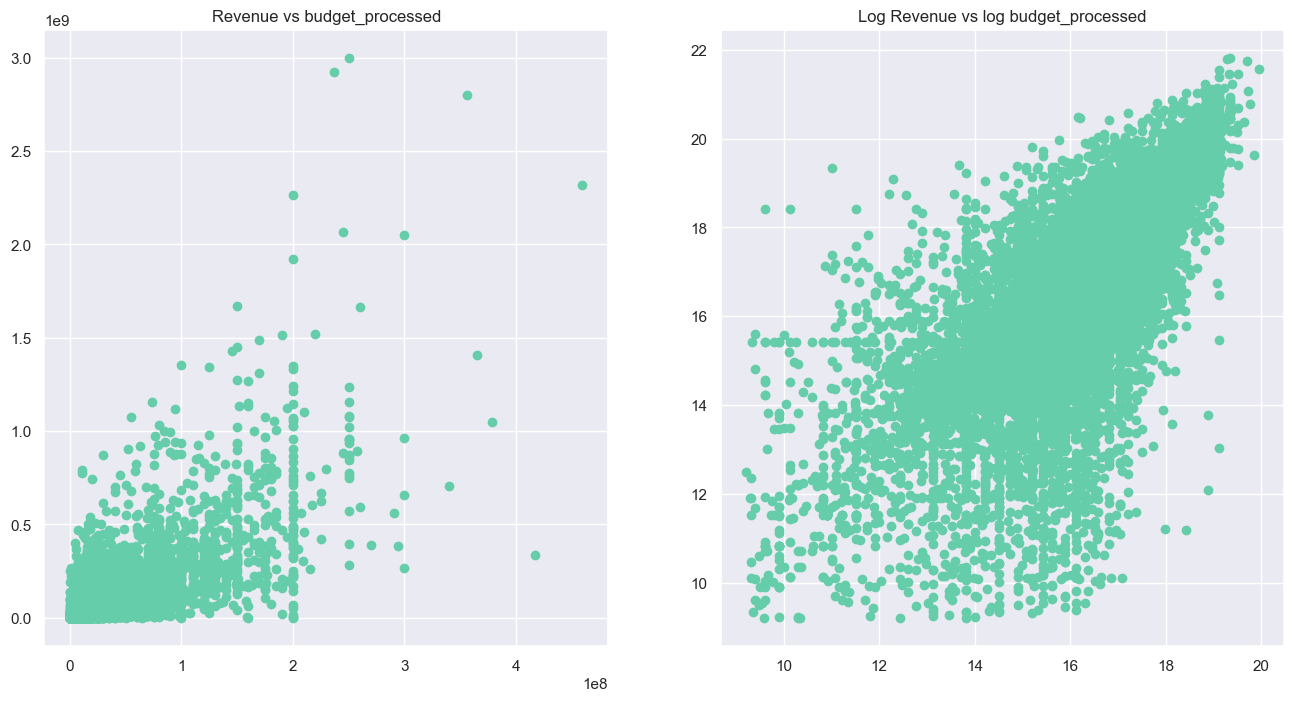

In [173]:
# Vẽ đồ thị phân tán giữa ngân sách và doanh thu
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['budget_processed_1'], data['revenue_1'], color='mediumaquamarine')
plt.title('Revenue vs budget_processed')
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['budget_processed_1']), np.log1p(data['revenue_1']), color='mediumaquamarine')
plt.title('Log Revenue vs log budget_processed')

In [174]:
# Phân tích tương quan và tạo các đặc trưng log có thể hữu ích
corr, _ = pearsonr(data['budget_processed_1'], data['revenue_1'])
print('Pearsons correlation between budget_processed and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['budget_processed_1']), np.log1p(data['revenue_1']))
print('Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: %.3f' % corr)

Pearsons correlation between budget_processed and revenue: nan
Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: nan


In [175]:
# Loại bỏ các cột 'budget_processed' và 'revenue' gốc và đổi tên cột đã xử lý
data = data.drop(['budget_processed', 'revenue'], axis=1)
data = data.rename(columns={'budget_processed_1': 'budget_processed', 'revenue_1': 'revenue'})

In [176]:
# Cập nhật danh sách các tính năng số
num_features.remove('budget_processed')
num_features.append('budget_processed')

## Feature Selection

Bây giờ đã khám phá tất cả dữ liệu và tạo một số thuộc tính mới cho mô hình.

In [177]:
# In ra danh sách các cột cần loại bỏ
print(cols_to_drop)

['overview', 'popularity', 'original_title', 'backdrop_path', 'poster_path']


Đã kết thúc với 5 cột quyết định loại bỏ vì không có tác dụng gì đối với mô hình. 

Thực sự không cần phải loại bỏ chúng khỏi tập dữ liệu, nhưng điều quan trọng vẫn là ghi lại các cột hoàn toàn không được sử dụng và không phục vụ mục đích cho mô hình. 

Mỗi lý do biện minh cho việc loại bỏ những điều này có thể được tìm thấy trong các phần tương quan trước đó trong suốt quá trình phân tích.

In [178]:
# In ra danh sách các tính năng phân loại
print(cat_features)

['status', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult', 'has_homepage', 'originally_english', 'has_tagline', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english']


['title', 'vote_average', 'vote_count', 'status_0', 'status_1', 'status_2', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult_0', 'adult_1', 'has_homepage', 'originally_english', 'has_tagline', '', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english']

In [179]:
# Đặt danh sách tính năng phân loại vào biến train_features (dùng cho huấn luyện mô hình)
train_features = cat_features

Đây là tất cả các categorical features sẽ được sử dụng trong mô hình và vẫn cần log transform tất cả các numerical features.

In [180]:
# In ra danh sách các tính năng số
print(num_features)

['revenue', 'title_len', 'vote_average', 'vote_count', 'runtime_processed', 'genre_rank', 'num_genres', 'numTopStudios', 'num_studios', 'studioRank', 'num_production_countries', 'num_languages', 'budget_processed']


['revenue', 'runtime_processed', 'budget_processed', 'genre_rank', 'num_genres', 'numTopStudios', 'num_studios', 'studioRank', 'num_production_countries', 'num_languages']


In [181]:
# Chuyển đổi các tính năng số sang dạng log (logarit tự nhiên cộng thêm 1)
# Đây là bước phổ biến trong phân tích dữ liệu khi dữ liệu có phân phối lệch, giúp biến đổi phân phối dữ liệu về gần dạng chuẩn (normal distribution)
for feat in num_features:
    # Tạo một cột mới cho mỗi tính năng, chứa giá trị log của tính năng đó
    data["log_" + feat] = np.log1p(data[feat])
    
    # Nếu tính năng không phải là doanh thu (revenue), thêm tên cột log vào danh sách train_features
    if feat != "revenue":
        train_features.append("log_" + feat)

Bây giờ đã log transform cho các numerical features, đây sẽ là danh sách các thuộc tính cho mô hình.

In [182]:
# In ra danh sách các tính năng (bao gồm cả tính năng gốc và tính năng đã chuyển đổi thành log)
print(train_features)
print()

['status', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult', 'has_homepage', 'originally_english', 'has_tagline', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english', 'log_title_len', 'log_vote_average', 'log_vote_count', 'log_runtime_processed', 'log_genre_rank', 'log_num_genres', 'log_numTopStudios', 'log_num_studios', 'log_studioRank', 'log_num_production_countries', 'log_num_languages', 'log_budget_processed']



In [183]:
# In ra số lượng tính năng trong danh sách train_features
print("Number of features: ", len(train_features))

Number of features:  57


['vote_average', 'vote_count', 'status_0', 'status_1', 'status_2', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult_0', 'adult_1', 'has_homepage', 'originally_english', 'has_tagline', '', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english', 'log_title_len', 'log_runtime_processed', 'log_budget_processed', 'log_genre_rank', 'log_num_genres', 'log_numTopStudios', 'log_num_studios', 'log_studioRank', 'log_num_production_countries', 'log_num_languages']


Kết thúc với tổng cộng 57 thuộc tính khác nhau cho mô hình. Tiếp theo, hãy xem ma trận tương quan của tất cả các numerical features.

Text(0.5, 1.0, 'Correlation between numerical features')

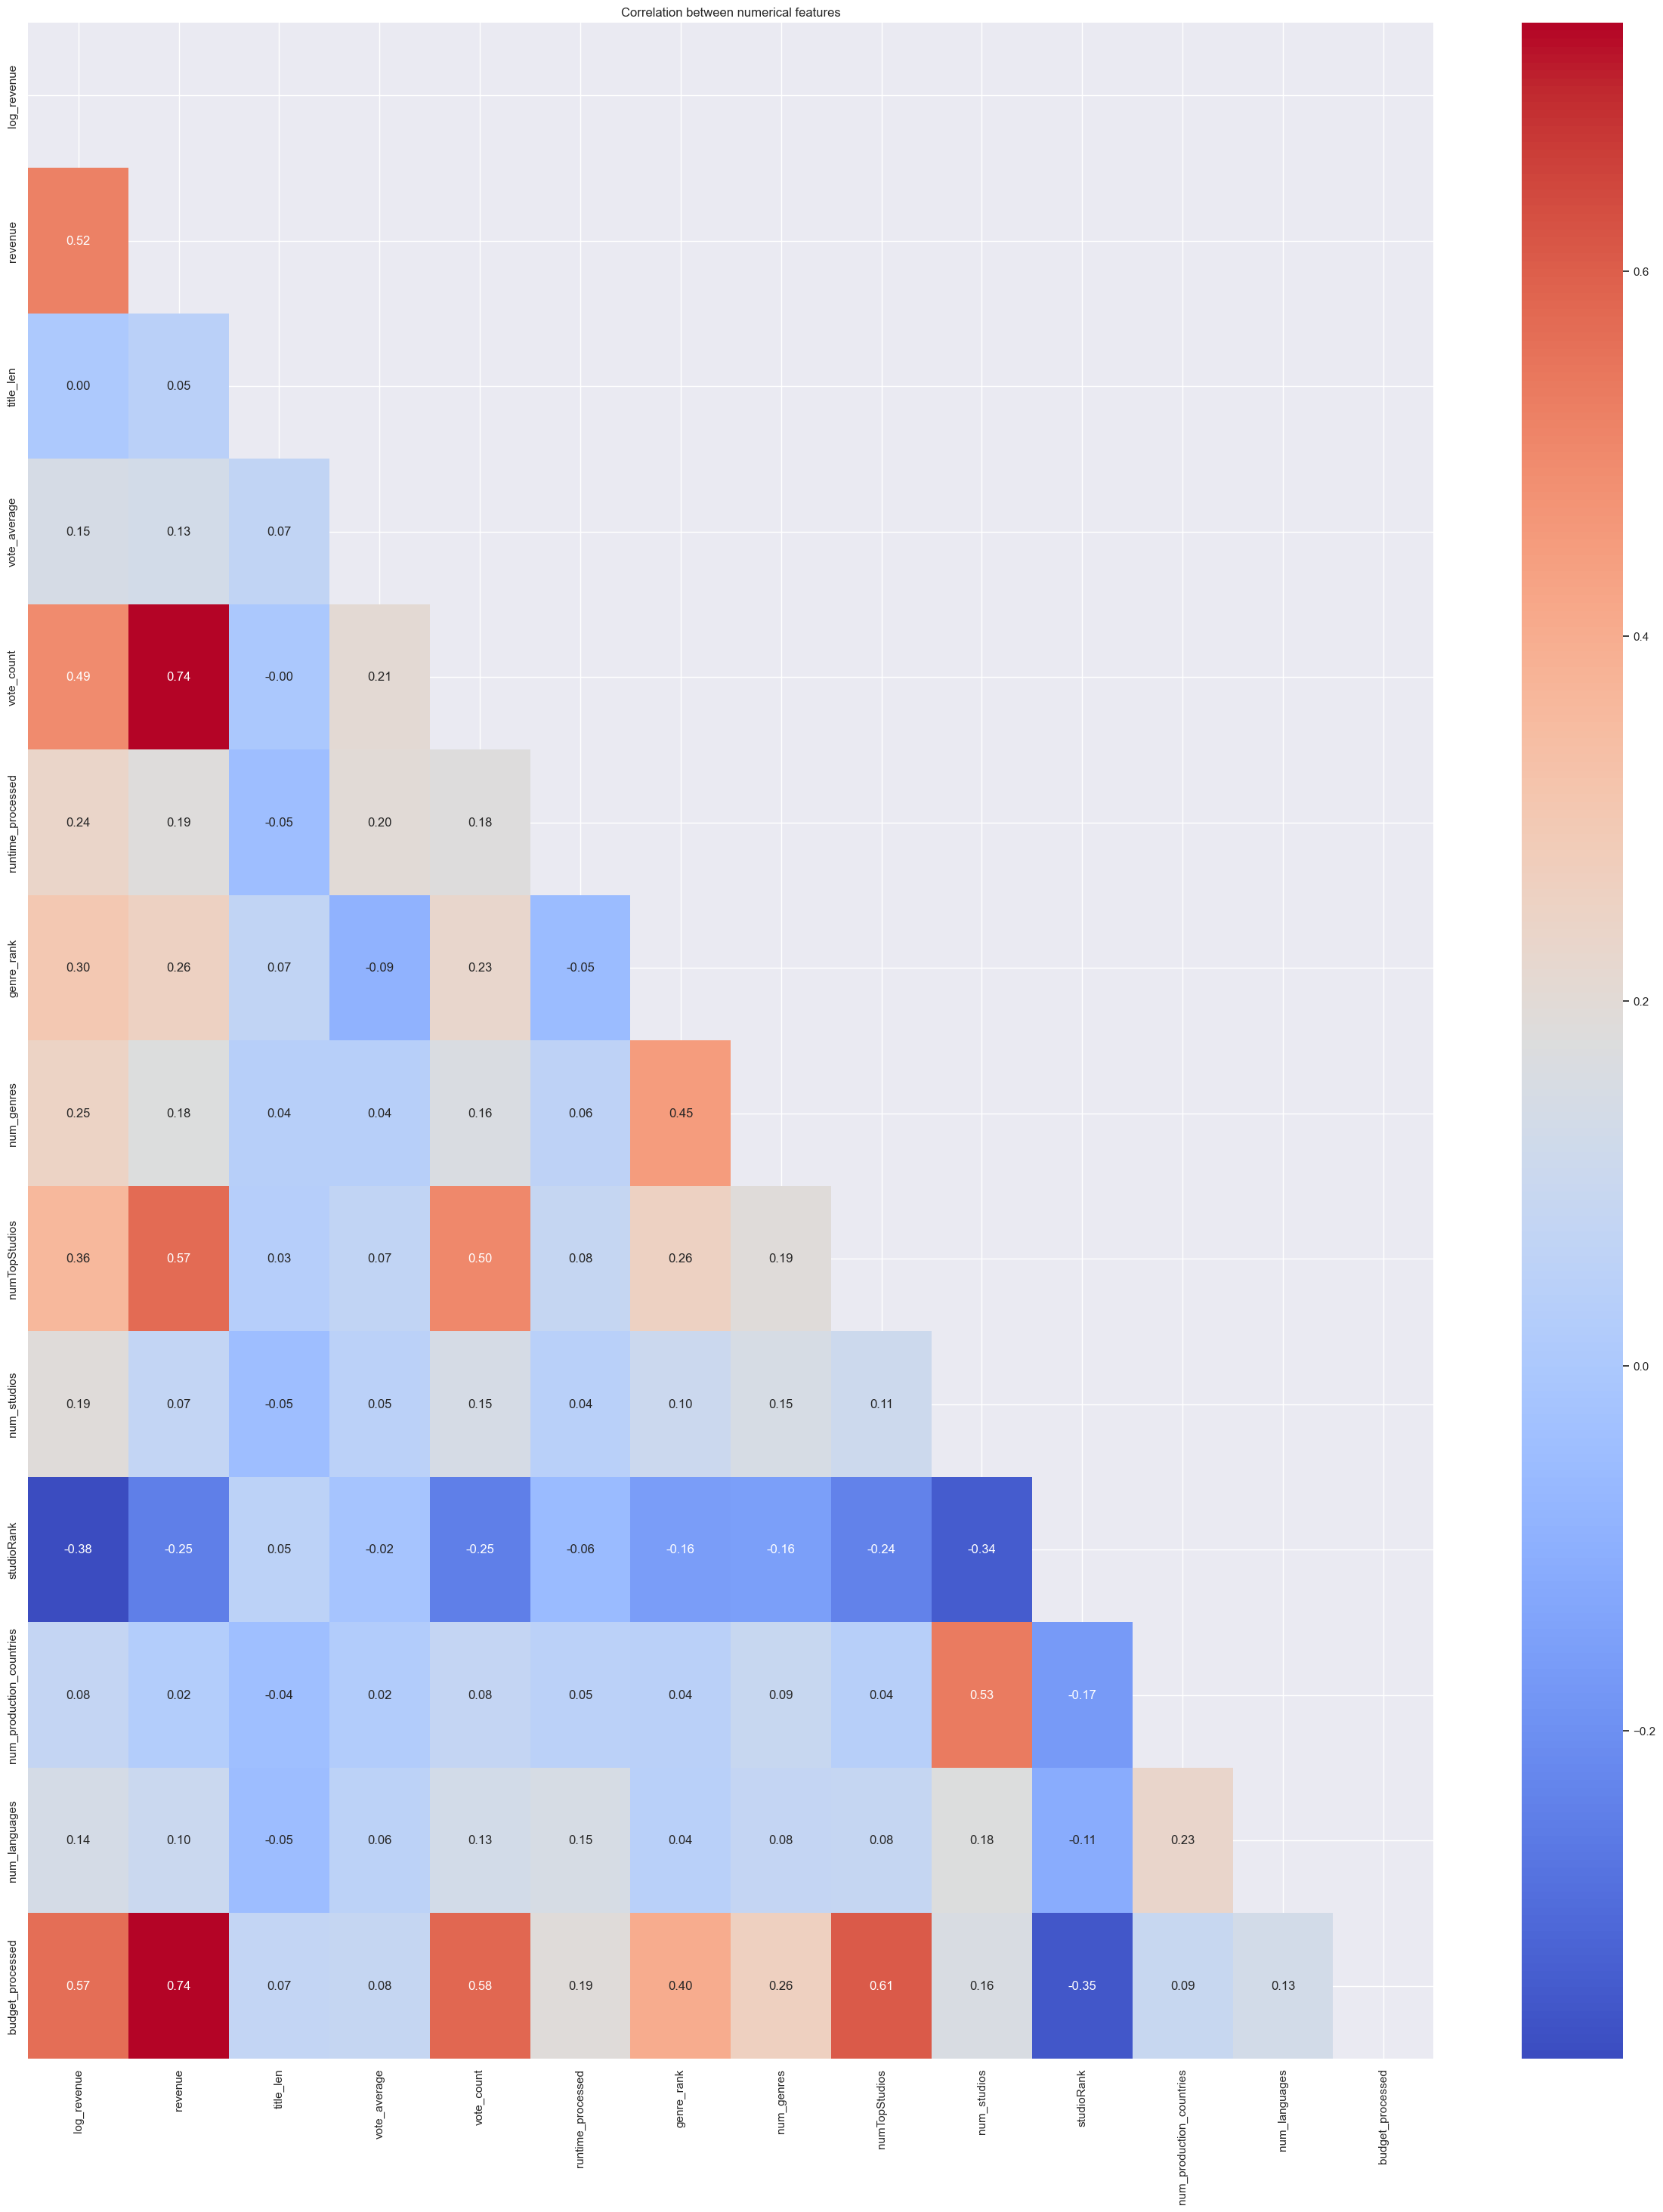

In [184]:
# Tạo ma trận tương quan giữa các tính năng số
sns.set(rc={'figure.figsize':(30,35)})  # Thiết lập kích thước của đồ thị (30x35)

# Tính toán ma trận tương quan giữa các tính năng (bao gồm cả log_revenue và các tính năng số khác)
corr = data[['log_revenue', *num_features]].corr()

# Tạo một mặt nạ (mask) cho tam giác trên của ma trận tương quan (để chỉ hiển thị nửa dưới ma trận)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Vẽ heatmap của ma trận tương quan, chỉ hiển thị nửa dưới nhờ vào mask
sns.heatmap(corr, mask=mask, 
            annot=True,  # Hiển thị giá trị tương quan trên mỗi ô
            fmt=".2f",   # Định dạng hiển thị với 2 chữ số thập phân
            cmap='coolwarm')  # Màu sắc của heatmap

# Đặt tiêu đề cho đồ thị
plt.title("Correlation between numerical features")

Ma trận tương quan khá lớn nhưng lại cho rất nhiều thông tin. 

Nhìn lên cột xa nhất bên trái, có thể thấy mối tương quan giữa doanh thu và từng biến, cho thấy rằng budget là một trong những mối tương quan cao nhất. 

Ngoài ra, điều quan trọng cần lưu ý là có vẻ như có khá nhiều hiện tượng multicollinearity trong dữ liệu, điều này ảnh hưởng rất lớn đến độ chính xác của các thuật toán.

# Modeling

In [185]:
# Set up your X và y
X = data[train_features]  # Các đặc trưng (features)
y = data['log_revenue']  # Mục tiêu (target) là 'log_revenue' (log của doanh thu)

In [186]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
# In ra kích thước của bộ dữ liệu huấn luyện và kiểm tra để đảm bảo tính đúng đắn
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (12756, 57) (12756,)
Test set: (3190, 57) (3190,)


In [188]:
# Làm sạch dữ liệu (xóa các dòng có giá trị thiếu) cho cả tập huấn luyện và kiểm tra
X_train_clean = X_train.dropna()  # Xóa các dòng có giá trị thiếu trong tập huấn luyện
y_train_clean = y_train[X_train_clean.index]  # Đảm bảo mục tiêu y_train được đồng bộ với các đặc trưng đã làm sạch

X_test_clean = X_test.dropna()  # Xóa các dòng có giá trị thiếu trong tập kiểm tra
y_test_clean = y_test[X_test_clean.index]  # Đảm bảo mục tiêu y_test được đồng bộ với các đặc trưng đã làm sạch

In [189]:
# In kích thước của bộ dữ liệu sau khi làm sạch
print('Cleaned Train set:', X_train_clean.shape, y_train_clean.shape)
print('Cleaned Test set:', X_test_clean.shape, y_test_clean.shape)

Cleaned Train set: (7646, 57) (7646,)
Cleaned Test set: (1907, 57) (1907,)


Sẽ tạo một số hàm trợ giúp. 

Hàm đầu tiên sẽ được sử dụng để thực hiện grid search để điều chỉnh hyperparameter cho từng mô hình. 

Phần tiếp theo là đánh giá để so sánh mô hình cơ sở với mô hình đã điều chỉnh và cho thấy một số số liệu để đánh giá hiệu suất của các mô hình.

In [190]:
# Định nghĩa hàm tạo mô hình và tối ưu hóa tham số với GridSearchCV

from sklearn.model_selection import GridSearchCV
def create_model_pipeline(model, param_grid, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'):
    gs = GridSearchCV(
        estimator=model,  # Mô hình học máy cần tối ưu hóa
        param_grid=param_grid,  # Lưới tham số cần tìm kiếm
        cv=cv,  # Kỹ thuật cross-validation
        n_jobs=-1,  # Sử dụng tất cả các lõi CPU để tăng tốc quá trình
        scoring=scoring,  # Phương thức đánh giá mô hình (ở đây là RMSE âm)
        verbose=2  # Hiển thị thông tin chi tiết trong quá trình tìm kiếm tham số
    )
    
    # Huấn luyện mô hình và trả về mô hình tốt nhất sau khi tối ưu tham số
    gs.fit(X_train, y_train)
    return gs.best_estimator_

In [191]:
# Định nghĩa hàm tính toán các chỉ số đánh giá mô hình (MSE, RMSE, MAE, MAPE, R2, Accuracy)
def metrics(model, X_test_data, y_test_data):
    # Dự đoán kết quả từ mô hình đã huấn luyện
    y_pred = model.predict(X_test_data)

    # Tính các chỉ số đánh giá
    mse = mean_squared_error(y_test_data, y_pred)  # Sai số bình phương trung bình
    rmse = np.sqrt(mse)  # Căn bậc hai của MSE (Sai số chuẩn)
    mae = mean_absolute_error(y_test_data, y_pred)  # Sai số tuyệt đối trung bình
    mape = mean_absolute_percentage_error(y_test_data, y_pred) * 100  # Sai số phần trăm tuyệt đối
    r_squared = r2_score(y_test_data, y_pred)  # Hệ số xác định R2
    accuracy = 100 - round(mape, 4)  # Độ chính xác tính từ MAPE

    # In các chỉ số đánh giá ra màn hình
    print('Mean Squared Error: ', round(mse, 4))
    print('Root Mean Squared Error: ', round(rmse, 4))
    print('Mean Absolute Error: ', round(mae, 4))
    print('Mean Absolute Percentage Error: ', round(mape, 4))
    print('R-squared: ', round(r_squared, 4))
    print('Test Set Accuracy (from MAPE):', round(accuracy, 4))

    return (mape, rmse, r_squared, mae, mse, accuracy)

# Khởi tạo danh sách để lưu kết quả của các mô hình
entries = []

Sử dụng Grid Search để tìm ra mô hình tốt nhất.

## Linear Regression

In [192]:
# Hồi quy tuyến tính (Linear Regression) - Mô hình cơ bản (không tinh chỉnh tham số)
lr_base_model = LinearRegression()  # Tạo mô hình hồi quy tuyến tính
lr_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên dữ liệu đã làm sạch

print('Linear Regression Base Model Metrics:')
base_accuracy = metrics(lr_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá mô hình cơ bản
print()

# Hồi quy tuyến tính với tối ưu hóa tham số (GridSearchCV)
lr_param_grid = {
    'fit_intercept': [True, False],  # Tham số 'fit_intercept' (có sử dụng intercept hay không)
    'positive': [True, False]  # Tham số 'positive' (giá trị dương hay không)
}
lr_best_model = create_model_pipeline(LinearRegression(), lr_param_grid, X_train_clean, y_train_clean)  # Tìm mô hình tốt nhất

print('Linear Regression Model (After Tuning) Metrics:')
temp = metrics(lr_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tinh chỉnh tham số
best_accuracy = temp[5]
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # Hiển thị sự cải thiện độ chính xác

entries.append(('Linear Regression', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Linear Regression Base Model Metrics:
Mean Squared Error:  1.8866
Root Mean Squared Error:  1.3735
Mean Absolute Error:  0.9833
Mean Absolute Percentage Error:  6.6677
R-squared:  0.6453
Test Set Accuracy (from MAPE): 93.3323

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Linear Regression Model (After Tuning) Metrics:
Mean Squared Error:  1.8866
Root Mean Squared Error:  1.3735
Mean Absolute Error:  0.9833
Mean Absolute Percentage Error:  6.6677
R-squared:  0.6453
Test Set Accuracy (from MAPE): 93.3323
Improvement of 0.00%


## Ridge Regression

In [193]:
# Hồi quy Ridge (Ridge Regression) - Mô hình cơ bản (không tinh chỉnh tham số)
ridge_base_model = Ridge()  # Tạo mô hình Ridge
ridge_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên dữ liệu đã làm sạch

print('Ridge Regression Base Model Metrics:')
base_accuracy = metrics(ridge_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá mô hình cơ bản
print()

# Hồi quy Ridge với tối ưu hóa tham số (GridSearchCV)
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Các giá trị alpha cho điều chỉnh regularization
    'fit_intercept': [True, False],  # Tham số 'fit_intercept'
    'positive': [True, False]  # Tham số 'positive'
}
ridge_best_model = create_model_pipeline(Ridge(), ridge_param_grid, X_train_clean, y_train_clean)  # Tìm mô hình tốt nhất

print('Ridge Regression Model (After Tuning) Metrics:')
temp = metrics(ridge_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tinh chỉnh tham số
best_accuracy = temp[5]
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # Hiển thị sự cải thiện độ chính xác

entries.append(('Ridge Regression', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Ridge Regression Base Model Metrics:
Mean Squared Error:  1.8853
Root Mean Squared Error:  1.373
Mean Absolute Error:  0.9829
Mean Absolute Percentage Error:  6.665
R-squared:  0.6455
Test Set Accuracy (from MAPE): 93.335

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Ridge Regression Model (After Tuning) Metrics:
Mean Squared Error:  1.8807
Root Mean Squared Error:  1.3714
Mean Absolute Error:  0.9813
Mean Absolute Percentage Error:  6.6523
R-squared:  0.6464
Test Set Accuracy (from MAPE): 93.3477
Improvement of 0.01%


## k-NN

In [194]:
# k-NN Base Model - Tạo và huấn luyện mô hình k-NN cơ bản
knn_base_model = KNeighborsRegressor()  
knn_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên tập huấn luyện đã làm sạch

print('k-NN Base Model Metrics:')
base_accuracy = metrics(knn_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá mô hình k-NN cơ bản
print()

# k-NN Model với GridSearchCV để tối ưu tham số
knn_param_grid = {
    'n_neighbors': list(range(1, 51)),  # Số láng giềng gần nhất
    'weights': ['uniform', 'distance'],  # Cách tính trọng số cho các láng giềng
    'algorithm': ['ball_tree', 'kd_tree', 'brute']  # Thuật toán tìm kiếm các láng giềng gần nhất
}

knn_best_model = create_model_pipeline(KNeighborsRegressor(), knn_param_grid, X_train_clean, y_train_clean)  # Tìm mô hình tối ưu

print('k-NN Model (After Tuning) Metrics:')
temp = metrics(knn_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình k-NN sau khi tối ưu tham số
best_accuracy = temp[5]
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # In sự cải thiện độ chính xác

entries.append(('k-NN', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))  # Lưu kết quả mô hình vào danh sách

k-NN Base Model Metrics:
Mean Squared Error:  1.9196
Root Mean Squared Error:  1.3855
Mean Absolute Error:  0.9945
Mean Absolute Percentage Error:  6.7858
R-squared:  0.6391
Test Set Accuracy (from MAPE): 93.2142

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
k-NN Model (After Tuning) Metrics:
Mean Squared Error:  1.7772
Root Mean Squared Error:  1.3331
Mean Absolute Error:  0.9411
Mean Absolute Percentage Error:  6.4465
R-squared:  0.6659
Test Set Accuracy (from MAPE): 93.5535
Improvement of 0.36%


## Decision Tree

In [195]:
# Decision Tree Base Model - Tạo và huấn luyện mô hình cây quyết định cơ bản
dt_base_model = DecisionTreeRegressor()
dt_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên tập huấn luyện đã làm sạch

print('Decision Tree Base Model Metrics:')
base_accuracy = metrics(dt_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá mô hình cây quyết định cơ bản
print()

# Decision Tree Model với GridSearchCV để tối ưu tham số
dt_param_grid = {
    'max_depth': [None] + list(range(1, 50, 5)),  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở mỗi lá
    'max_features': [None, 'sqrt', 'log2'],  # Số lượng đặc trưng được lựa chọn cho mỗi phân nhánh
    'criterion': ['friedman_mse']  # Tiêu chí chia (mse)
}

dt_best_model = create_model_pipeline(DecisionTreeRegressor(), dt_param_grid, X_train_clean, y_train_clean)  # Tìm mô hình tối ưu

print('Decision Tree Model (After Tuning) Metrics:')
temp = metrics(dt_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình cây quyết định sau khi tối ưu tham số
best_accuracy = temp[5]
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # In sự cải thiện độ chính xác

entries.append(('Decision Tree', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))  # Lưu kết quả mô hình vào danh sách

Decision Tree Base Model Metrics:
Mean Squared Error:  3.3167
Root Mean Squared Error:  1.8212
Mean Absolute Error:  1.3087
Mean Absolute Percentage Error:  8.758
R-squared:  0.3764
Test Set Accuracy (from MAPE): 91.242

Fitting 5 folds for each of 297 candidates, totalling 1485 fits
Decision Tree Model (After Tuning) Metrics:
Mean Squared Error:  2.0204
Root Mean Squared Error:  1.4214
Mean Absolute Error:  1.0304
Mean Absolute Percentage Error:  6.989
R-squared:  0.6201
Test Set Accuracy (from MAPE): 93.011
Improvement of 1.94%


## SVR

In [196]:
# Hồi quy SVM (SVR) - Mô hình cơ bản (không tinh chỉnh tham số)
svr_base_model = SVR(kernel='linear')  # Tạo mô hình SVR với kernel tuyến tính
svr_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên dữ liệu đã làm sạch

print('SVR Base Model Metrics:')
base_accuracy = metrics(svr_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá mô hình cơ bản
print()

# Hồi quy SVM (SVR) với tối ưu hóa tham số (GridSearchCV)
svr_param_grid = {
    'C': [0.1, 1, 10],  # Tham số điều chỉnh regularization
    'kernel': ['linear', 'rbf', 'poly'],  # Các loại kernel có thể sử dụng
    'gamma': ['scale', 'auto']  # Các giá trị gamma cho kernel
}
svr_best_model = create_model_pipeline(SVR(), svr_param_grid, X_train_clean, y_train_clean)  # Tìm mô hình tốt nhất

print('SVR Model (After Tuning) Metrics:')
temp = metrics(svr_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tinh chỉnh tham số
best_accuracy = temp[5]
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # Hiển thị sự cải thiện độ chính xác

entries.append(('SVR', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

SVR Base Model Metrics:
Mean Squared Error:  1.9267
Root Mean Squared Error:  1.3881
Mean Absolute Error:  0.961
Mean Absolute Percentage Error:  6.6157
R-squared:  0.6377
Test Set Accuracy (from MAPE): 93.3843

Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVR Model (After Tuning) Metrics:
Mean Squared Error:  1.551
Root Mean Squared Error:  1.2454
Mean Absolute Error:  0.8686
Mean Absolute Percentage Error:  5.9725
R-squared:  0.7084
Test Set Accuracy (from MAPE): 94.0275
Improvement of 0.69%


## Random Forest

In [197]:
# Hồi quy Random Forest (RFR) - Mô hình cơ bản (không tinh chỉnh tham số)
rfr_base_model = RandomForestRegressor(random_state=42)  # Tạo mô hình Random Forest
rfr_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên dữ liệu đã làm sạch

# In ra xếp hạng các đặc trưng quan trọng trong mô hình Random Forest
feature_importances = rfr_base_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# In ra xếp hạng các đặc trưng
print("Feature ranking:")
for f in range(20):
    print(f"{f + 1}. {X_train_clean.columns[indices[f]]} ({feature_importances[indices[f]]})")

# Hồi quy Random Forest với tối ưu hóa tham số (GridSearchCV)
rfr_param_grid = {
    'bootstrap': [True],  # Sử dụng bootstrap sampling
    'max_depth': [10],  # Độ sâu tối đa của cây
    'max_features': [0.4],  # Tỷ lệ các đặc trưng tối đa sử dụng cho mỗi cây
    'min_samples_leaf': [1],  # Số mẫu tối thiểu trong mỗi lá
    'min_samples_split': [2],  # Đặt min_samples_split thành 2 thay vì 1
    'n_estimators': [100]  # Số lượng cây trong rừng
}
rfr_best_model = create_model_pipeline(RandomForestRegressor(random_state=42), rfr_param_grid, X_train_clean, y_train_clean)  # Tìm mô hình tốt nhất

print('Random Forest Model (After Tuning) Metrics:')
temp = metrics(rfr_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tinh chỉnh tham số
best_accuracy = temp[5]
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # Hiển thị sự cải thiện độ chính xác

entries.append(('Random Forest', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Feature ranking:
1. log_vote_count (0.4579976841223282)
2. log_budget_processed (0.21974030952080056)
3. log_vote_average (0.04440593512765422)
4. log_studioRank (0.04052214803818493)
5. log_runtime_processed (0.03772161121242409)
6. log_title_len (0.02530157520148603)
7. log_genre_rank (0.021230516516555865)
8. log_num_studios (0.01811904555932318)
9. log_num_production_countries (0.0126017916443144)
10. 2010s (0.009512092412664099)
11. log_num_genres (0.007651917749927368)
12. log_num_languages (0.0068329844501762525)
13. Comedy (0.005103167902972158)
14. Drama (0.004326376391202231)
15. 2000s (0.0043185401398171145)
16. has_homepage (0.004164211542481016)
17. ThursdayRelease (0.004103588370186008)
18. originally_english (0.004026173573558909)
19. usa_produced (0.003977157958948617)
20. 1970s (0.003925034537642217)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest Model (After Tuning) Metrics:
Mean Squared Error:  1.6757
Root Mean Squared Error:  1.2945
Mean Ab

## Gradient Boosting

In [198]:
# Gradient Boosting Regressor - Mô hình cơ bản (không tinh chỉnh tham số)
gbr_base_model = GradientBoostingRegressor(random_state=42)  # Tạo mô hình Gradient Boosting Regressor
gbr_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên dữ liệu huấn luyện đã làm sạch

print('Gradient Boosting Base Model Metrics:')
base_accuracy = metrics(gbr_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá độ chính xác của mô hình cơ bản
print()

# Gradient Boosting Regressor với tối ưu hóa tham số (GridSearchCV)
gbr_param_grid = {
    'n_estimators': [100, 200],  # Số lượng cây quyết định trong mô hình
    'learning_rate': [0.01, 0.1, 1.0],  # Tốc độ học
    'max_depth': [2, 5, 10],  # Độ sâu tối đa của cây quyết định
    'min_samples_split': [2, 5],  # Số lượng mẫu tối thiểu để chia một nút trong cây quyết định
    'min_samples_leaf': [1, 2, 5],  # Số lượng mẫu tối thiểu trong mỗi lá của cây quyết định
    'subsample': [0.9, 1.0]  # Tỷ lệ mẫu ngẫu nhiên được chọn trong mỗi vòng học
}
# Tìm mô hình tốt nhất qua GridSearchCV với các tham số trên
gbr_best_model = create_model_pipeline(GradientBoostingRegressor(random_state=42), gbr_param_grid, X_train_clean, y_train_clean)

print('Gradient Boosting Model (After Tuning) Metrics:')
temp = metrics(gbr_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tối ưu
best_accuracy = temp[5]  # Độ chính xác của mô hình sau khi tối ưu
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # Hiển thị sự cải thiện độ chính xác

# Lưu kết quả vào danh sách entries
entries.append(('Gradient Boosting Regressor', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Gradient Boosting Base Model Metrics:
Mean Squared Error:  1.6802
Root Mean Squared Error:  1.2962
Mean Absolute Error:  0.9279
Mean Absolute Percentage Error:  6.3055
R-squared:  0.6841
Test Set Accuracy (from MAPE): 93.6945

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Gradient Boosting Model (After Tuning) Metrics:
Mean Squared Error:  1.6073
Root Mean Squared Error:  1.2678
Mean Absolute Error:  0.9115
Mean Absolute Percentage Error:  6.1959
R-squared:  0.6978
Test Set Accuracy (from MAPE): 93.8041
Improvement of 0.12%


## AdaBoost

In [199]:
# AdaBoost Regressor - Mô hình cơ bản (không tinh chỉnh tham số)
ada_base_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)
ada_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình AdaBoost với cây quyết định

print('AdaBoost Base Model Metrics:')
base_accuracy = metrics(ada_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá độ chính xác của mô hình cơ bản
print()

# AdaBoost Regressor với tối ưu hóa tham số (GridSearchCV)
ada_param_grid = {
    'n_estimators': [50, 100, 200],  # Số lượng cây quyết định trong mô hình AdaBoost
    'learning_rate': [0.01, 0.1, 1.0],  # Tốc độ học
    'loss': ['linear', 'square', 'exponential']  # Các loại hàm mất mát có thể sử dụng
}
# Tìm mô hình tốt nhất qua GridSearchCV với các tham số trên
ada_best_model = create_model_pipeline(AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42), ada_param_grid, X_train_clean, y_train_clean)

print('AdaBoost Model (After Tuning) Metrics:')
temp = metrics(ada_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tối ưu
best_accuracy = temp[5]  # Độ chính xác của mô hình sau khi tối ưu
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.2f}%')  # Hiển thị sự cải thiện độ chính xác

# Lưu kết quả vào danh sách entries
entries.append(('AdaBoost Regressor', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

AdaBoost Base Model Metrics:
Mean Squared Error:  2.5928
Root Mean Squared Error:  1.6102
Mean Absolute Error:  1.3308
Mean Absolute Percentage Error:  8.4828
R-squared:  0.5125
Test Set Accuracy (from MAPE): 91.5172

Fitting 5 folds for each of 27 candidates, totalling 135 fits
AdaBoost Model (After Tuning) Metrics:
Mean Squared Error:  1.9733
Root Mean Squared Error:  1.4047
Mean Absolute Error:  1.07
Mean Absolute Percentage Error:  7.1321
R-squared:  0.629
Test Set Accuracy (from MAPE): 92.8679
Improvement of 1.48%


## XGBoost

In [211]:
# XGBoost Regressor - Mô hình cơ bản (không tinh chỉnh tham số)
xgb_base_model = XGBRegressor(random_state=42)  # Tạo mô hình XGBoost Regressor
xgb_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên dữ liệu huấn luyện đã làm sạch

print('XGBoost Base Model Metrics:')
base_accuracy = metrics(xgb_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá độ chính xác của mô hình cơ bản
print()

# XGBoost Regressor với tối ưu hóa tham số (GridSearchCV)
xgb_param_grid = {
    'n_estimators': [100, 200],  # Số lượng cây quyết định trong mô hình
    'colsample_bytree': [0.9, 1.0],  # Tỷ lệ cột sử dụng trong mỗi cây
    'max_depth': [2, 5, 10],  # Độ sâu tối đa của cây quyết định
    'reg_alpha': [1.0, 1.2, 1.3],  # Tham số điều chỉnh regularization L1
    'reg_lambda': [1.2, 1.3, 1.4],  # Tham số điều chỉnh regularization L2
    'subsample': [0.9, 1.0]  # Tỷ lệ mẫu được sử dụng trong mỗi vòng học
}
# Tìm mô hình tốt nhất qua GridSearchCV với các tham số trên
xgb_best_model = create_model_pipeline(XGBRegressor(random_state=42), xgb_param_grid, X_train_clean, y_train_clean)

print('XGBoost Model (After Tuning) Metrics:')
temp = metrics(xgb_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tối ưu
best_accuracy = temp[5]  # Độ chính xác của mô hình sau khi tối ưu
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.3f}%')  # Hiển thị sự cải thiện độ chính xác

# Lưu kết quả vào danh sách entries
entries.append(('XGBoost Regressor', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

XGBoost Base Model Metrics:
Mean Squared Error:  1.7354
Root Mean Squared Error:  1.3173
Mean Absolute Error:  0.9506
Mean Absolute Percentage Error:  6.4421
R-squared:  0.6737
Test Set Accuracy (from MAPE): 93.5579



C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

## LightGBM

In [207]:
# LightGBM Regressor - Mô hình cơ bản (không tinh chỉnh tham số)
lgbm_base_model = LGBMRegressor(random_state=42, force_col_wise=True, verbose=-1)  # Tạo mô hình LightGBM
lgbm_base_model.fit(X_train_clean, y_train_clean)  # Huấn luyện mô hình trên dữ liệu huấn luyện đã làm sạch

print('LightGBM Base Model Metrics:')
base_accuracy = metrics(lgbm_base_model, X_test_clean, y_test_clean)[5]  # Đánh giá độ chính xác của mô hình cơ bản
print()

# LightGBM Regressor với tối ưu hóa tham số (GridSearchCV)
lgbm_param_grid = {
    'n_estimators': [100, 150],  # Số lượng cây quyết định trong mô hình
    'colsample_bytree': [0.8, 1.0, 1.2],  # Tỷ lệ cột sử dụng trong mỗi cây
    'max_depth': [-1, 5, 10],  # Độ sâu tối đa của cây quyết định
    'reg_alpha': [0.4, 0.5, 0.6],  # Tham số điều chỉnh regularization L1
    'reg_lambda': [0.2, 0.3, 0.4],  # Tham số điều chỉnh regularization L2
    'subsample': [0.8, 0.9, 1],  # Tỷ lệ mẫu được sử dụng trong mỗi vòng học
    'num_leaves': [30, 31, 32]  # Số lượng lá trong mỗi cây
}
# Tìm mô hình tốt nhất qua GridSearchCV với các tham số trên
lgbm_best_model = create_model_pipeline(LGBMRegressor(random_state=42, force_col_wise=True, verbose=-1), lgbm_param_grid, X_train_clean, y_train_clean)

print('LightGBM Model (After Tuning) Metrics:')
temp = metrics(lgbm_best_model, X_test_clean, y_test_clean)  # Đánh giá mô hình đã tối ưu
best_accuracy = temp[5]  # Độ chính xác của mô hình sau khi tối ưu
print(f'Improvement of {100 * (best_accuracy - base_accuracy) / base_accuracy:.3f}%')  # Hiển thị sự cải thiện độ chính xác

# Lưu kết quả vào danh sách entries
entries.append(('LightGBM Regressor', temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

LightGBM Base Model Metrics:
Mean Squared Error:  1.5792
Root Mean Squared Error:  1.2567
Mean Absolute Error:  0.8937
Mean Absolute Percentage Error:  6.0649
R-squared:  0.7031
Test Set Accuracy (from MAPE): 93.9351

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\miynzi\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------------------------------------------------------------

LightGBM Model (After Tuning) Metrics:
Mean Squared Error:  1.5914
Root Mean Squared Error:  1.2615
Mean Absolute Error:  0.899
Mean Absolute Percentage Error:  6.1003
R-squared:  0.7008
Test Set Accuracy (from MAPE): 93.8997
Improvement of -0.038%


In [202]:
import pandas as pd

# Tạo DataFrame từ danh sách entries
model_names = [entry[0] for entry in entries]  # Tên mô hình
mape_scores = [entry[1] for entry in entries]  # MAPE
rmse_scores = [entry[2] for entry in entries]  # RMSE
r2_scores = [entry[3] for entry in entries]  # R2
mae_scores = [entry[4] for entry in entries]  # MAE
mse_scores = [entry[5] for entry in entries]  # MSE
accuracy_scores = [entry[6] for entry in entries]  # Độ chính xác từ MAPE

# Tạo DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'MAPE': mape_scores,
    'RMSE': rmse_scores,
    'R2': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'Accuracy (%)': accuracy_scores
})

# Hiển thị DataFrame kết quả
print(results_df)

                         Model      MAPE      RMSE        R2       MAE  \
0            Linear Regression  6.587591  1.332253  0.662086  0.978438   
1             Ridge Regression  6.579857  1.331890  0.662270  0.977376   
2                         k-NN  6.348277  1.296143  0.680156  0.931308   
3                Decision Tree  6.982192  1.408766  0.622158  1.035412   
4                          SVR  5.863545  1.214326  0.719261  0.857124   
5                Random Forest  6.149810  1.248223  0.703369  0.909216   
6  Gradient Boosting Regressor  5.927527  1.215150  0.718880  0.878703   
7           AdaBoost Regressor  6.925058  1.374442  0.640345  1.033630   
8            XGBoost Regressor  6.072701  1.225345  0.714143  0.903124   
9           LightGBM Regressor  5.897165  1.208438  0.721977  0.873829   

        MSE  Accuracy (%)  
0  1.774897       93.4124  
1  1.773932       93.4201  
2  1.679986       93.6517  
3  1.984622       93.0178  
4  1.474587       94.1365  
5  1.558060      

C:\Users\miynzi\AppData\Local\Temp\ipykernel_16792\234960111.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy (%)', y='Model', data=results_df, palette='viridis')


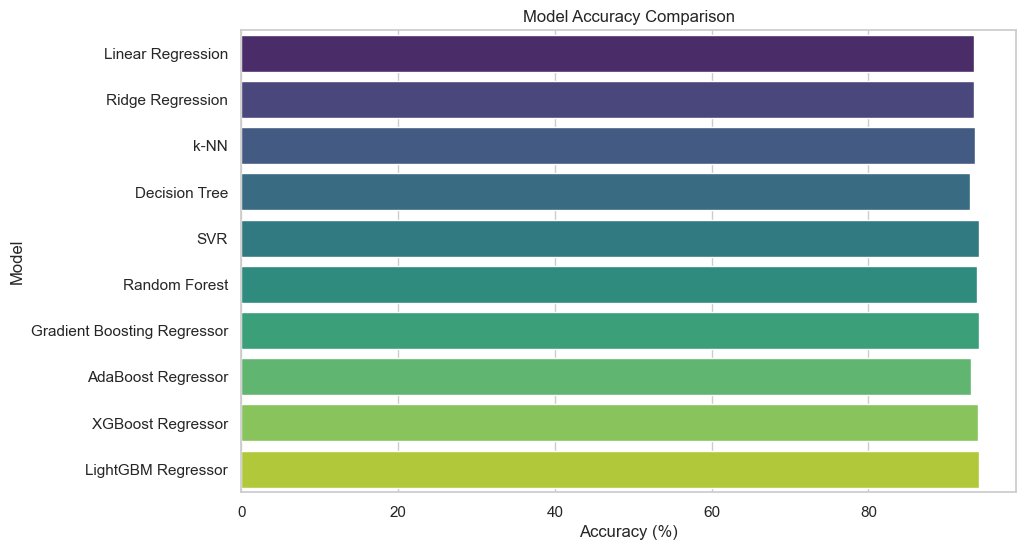

C:\Users\miynzi\AppData\Local\Temp\ipykernel_16792\234960111.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAPE', y='Model', data=results_df, palette='magma')


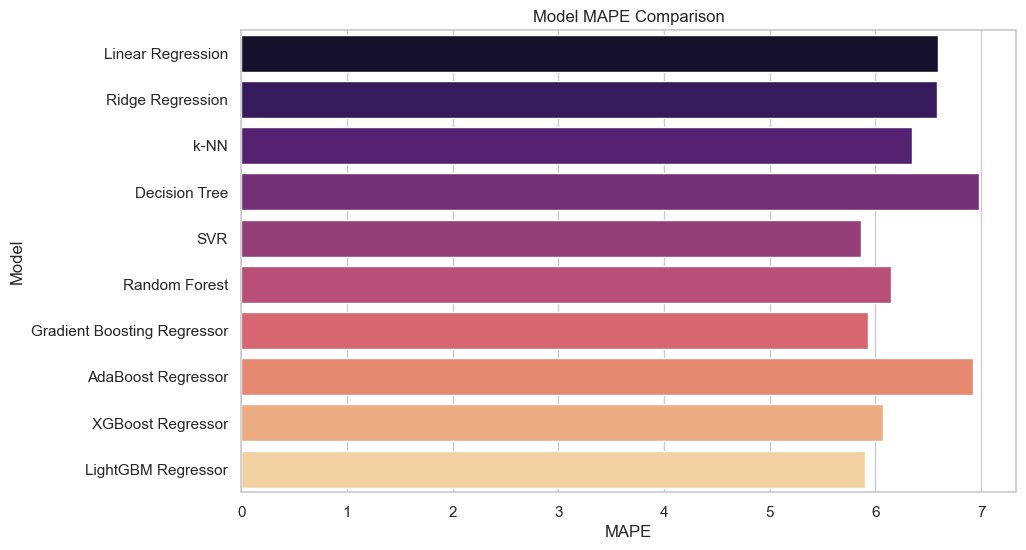

C:\Users\miynzi\AppData\Local\Temp\ipykernel_16792\234960111.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')


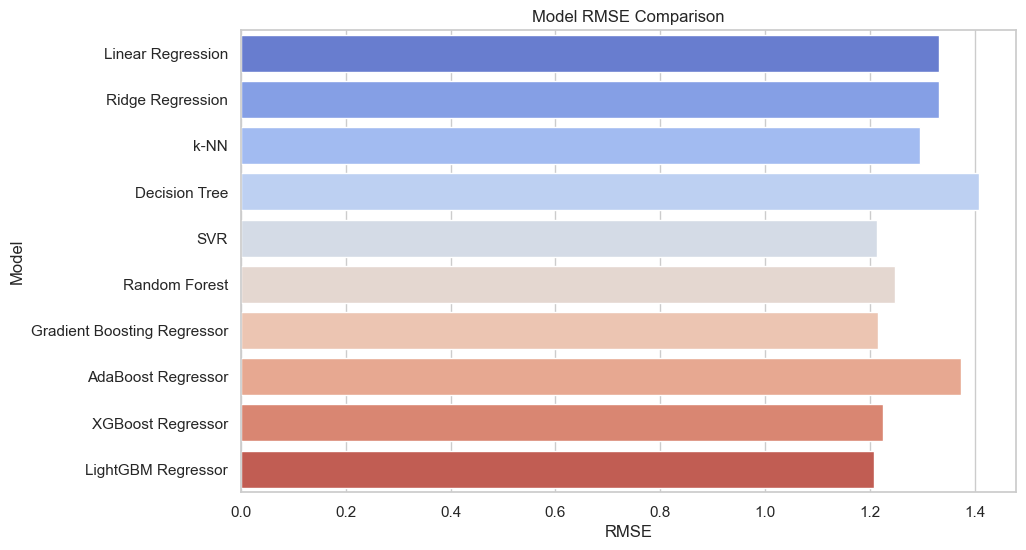

C:\Users\miynzi\AppData\Local\Temp\ipykernel_16792\234960111.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df, palette='Blues')


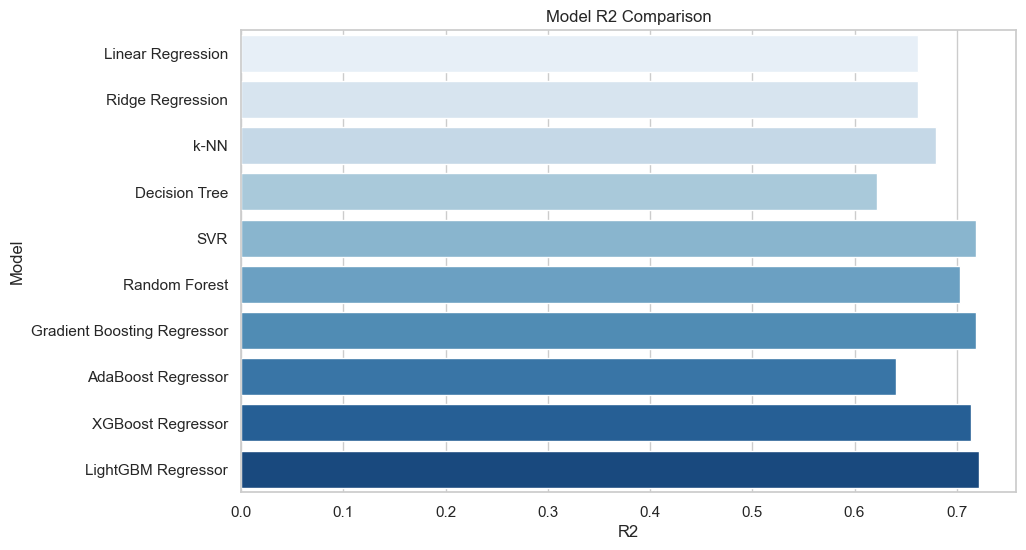

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tùy chỉnh cho biểu đồ
sns.set(style="whitegrid")

# Vẽ biểu đồ so sánh độ chính xác (Accuracy) của các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy (%)', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.show()

# Vẽ biểu đồ so sánh MAPE của các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x='MAPE', y='Model', data=results_df, palette='magma')
plt.title('Model MAPE Comparison')
plt.xlabel('MAPE')
plt.ylabel('Model')
plt.show()

# Vẽ biểu đồ so sánh RMSE của các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')
plt.title('Model RMSE Comparison')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

# Vẽ biểu đồ so sánh R2 của các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results_df, palette='Blues')
plt.title('Model R2 Comparison')
plt.xlabel('R2')
plt.ylabel('Model')
plt.show()

Chúng tôi sử dụng Grid Search để tìm ra mô hình tốt nhất

# Conclusion

## Results

In [204]:
# Tạo DataFrame từ danh sách kết quả
result_df = pd.DataFrame(entries, columns=['model', 'Mean Absolute Percentage Error', 'Root Mean Squared Error', 'R squared',  'Mean Absolute Error', 'Mean Squared Error', 'Test Set Accuracy (from Mean Absolute Percentage Error)'])
result_df  # Hiển thị DataFrame chứa các kết quả của các mô hình

model  Mean Absolute Percentage Error  \
0            Linear Regression                        6.587591   
1             Ridge Regression                        6.579857   
2                         k-NN                        6.348277   
3                Decision Tree                        6.982192   
4                          SVR                        5.863545   
5                Random Forest                        6.149810   
6  Gradient Boosting Regressor                        5.927527   
7           AdaBoost Regressor                        6.925058   
8            XGBoost Regressor                        6.072701   
9           LightGBM Regressor                        5.897165   

   Root Mean Squared Error  R squared  Mean Absolute Error  \
0                 1.332253   0.662086             0.978438   
1                 1.331890   0.662270             0.977376   
2                 1.296143   0.680156             0.931308   
3                 1.408766   0.622158             1.035412   
4                 1.214326   0.719261             0.857124   
5                 1.248223   0.703369             0.909216   
6                 1.215150   0.718880             0.878703   
7                 1.374442   0.640345             1.033630   
8                 1.225345   0.714143             0.903124   
9                 1.208438   0.721977             0.873829   

   Mean Squared Error  Test Set Accuracy (from Mean Absolute Percentage Error)  
0            1.774897                                            93.4124        
1            1.773932                                            93.4201        
2            1.679986                                            93.6517        
3            1.984622                                            93.0178        
4            1.474587                                            94.1365        
5            1.558060                                            93.8502        
6            1.476589                                            94.0725        
7            1.889091                                            93.0749        
8            1.501470                                            93.9273        
9            1.460321                                            94.1028

In [205]:
# Sắp xếp DataFrame theo độ chính xác trên tập kiểm tra (Accuracy) giảm dần
result_df = result_df.sort_values(by='Test Set Accuracy (from Mean Absolute Percentage Error)', ascending=False)
result_df  # Hiển thị DataFrame sau khi đã sắp xếp theo độ chính xác

model  Mean Absolute Percentage Error  \
4                          SVR                        5.863545   
9           LightGBM Regressor                        5.897165   
6  Gradient Boosting Regressor                        5.927527   
8            XGBoost Regressor                        6.072701   
5                Random Forest                        6.149810   
2                         k-NN                        6.348277   
1             Ridge Regression                        6.579857   
0            Linear Regression                        6.587591   
7           AdaBoost Regressor                        6.925058   
3                Decision Tree                        6.982192   

   Root Mean Squared Error  R squared  Mean Absolute Error  \
4                 1.214326   0.719261             0.857124   
9                 1.208438   0.721977             0.873829   
6                 1.215150   0.718880             0.878703   
8                 1.225345   0.714143             0.903124   
5                 1.248223   0.703369             0.909216   
2                 1.296143   0.680156             0.931308   
1                 1.331890   0.662270             0.977376   
0                 1.332253   0.662086             0.978438   
7                 1.374442   0.640345             1.033630   
3                 1.408766   0.622158             1.035412   

   Mean Squared Error  Test Set Accuracy (from Mean Absolute Percentage Error)  
4            1.474587                                            94.1365        
9            1.460321                                            94.1028        
6            1.476589                                            94.0725        
8            1.501470                                            93.9273        
5            1.558060                                            93.8502        
2            1.679986                                            93.6517        
1            1.773932                                            93.4201        
0            1.774897                                            93.4124        
7            1.889091                                            93.0749        
3            1.984622                                            93.0178

Mô hình tốt nhất là mô hình SVR, với RMSE là 1.21 và độ chính xác 94.14% dựa trên MAPE. Mô hình LightGBM Regressor đứng thứ hai với các giá trị tương ứng là 1.20 và 94.10%. 

Cả 10 mô hình đều có thể đạt được độ chính xác lớn hơn 90% và vì vậy rất hài lòng với những kết quả này.

Cho dù tỷ lệ phần trăm này có vẻ cao đến mức nào, chúng ta hãy nhìn vào sai số trung bình.

In [206]:
# Tính và in ra lỗi trung bình tuyệt đối (MAE) của mô hình SVR (Support Vector Regressor)
print('Average error of SVR: ${:.2f}'.format(np.mean(abs(np.expm1(svr_best_model.predict(X_test_clean)) - np.expm1(y_test_clean.values)))))

# Tính và in ra lỗi trung bình tuyệt đối (MAE) của mô hình LGBMRegressor
print('Average error of LGBMRegressor: ${:.2f}'.format(np.mean(abs(np.expm1(lgbm_best_model.predict(X_test_clean)) - np.expm1(y_test_clean.values)))))

Average error of SVR: $30111713.50
Average error of LGBMRegressor: $30736942.55


In [207]:
# Lấy ra hai mô hình có độ chính xác tốt nhất từ DataFrame đã sắp xếp
top_models = result_df.head(2)  # Chọn hai mô hình có độ chính xác cao nhất

# In ra các chỉ số của hai mô hình tốt nhất
for index, row in top_models.iterrows():  # Lặp qua từng dòng trong DataFrame của các mô hình top 2
    print(f"\nModel: {row['model']}")  # In tên mô hình
    print(f"Mean Absolute Percentage Error: {row['Mean Absolute Percentage Error']:.4f}")  # In MAPE
    print(f"Root Mean Squared Error: {row['Root Mean Squared Error']:.4f}")  # In RMSE
    print(f"R squared: {row['R squared']:.4f}")  # In R^2 (hệ số xác định)
    print(f"Mean Absolute Error: {row['Mean Absolute Error']:.4f}")  # In MAE
    print(f"Mean Squared Error: {row['Mean Squared Error']:.4f}")  # In MSE
    print(f"Test Set Accuracy: {row['Test Set Accuracy (from Mean Absolute Percentage Error)']:.4f}%")  # In độ chính xác tính từ MAPE


Model: SVR
Mean Absolute Percentage Error: 5.8635
Root Mean Squared Error: 1.2143
R squared: 0.7193
Mean Absolute Error: 0.8571
Mean Squared Error: 1.4746
Test Set Accuracy: 94.1365%

Model: LightGBM Regressor
Mean Absolute Percentage Error: 5.8972
Root Mean Squared Error: 1.2084
R squared: 0.7220
Mean Absolute Error: 0.8738
Mean Squared Error: 1.4603
Test Set Accuracy: 94.1028%


Ngay cả đối với 2 mô hình tốt nhất, có thể thấy rằng mô hình vẫn chênh lệch 30 triệu USD cho mỗi dự đoán. Đây là một số tiền đáng kể, nhưng xét về mặt logic dựa trên dữ liệu thì điều đó rất hợp lý. 

Đối với một bộ phim bom tấn có doanh thu trên 600 triệu USD, việc nằm trong khoảng 30 triệu USD là khá gần và là một dự đoán tuyệt vời. 

Vấn đề xảy ra với những bộ phim nhỏ hơn, chẳng hạn như một bộ phim chỉ kiếm được 40 triệu USD. Nếu chúng ta lệch mục tiêu 35 triệu USD trong ví dụ này thì điều đó thật bất lợi. Phát hiện này tiếp tục nhắc lại sự khó khăn trong việc dự đoán sự thành công của các bộ phim, vì phần lớn dữ liệu bị sai lệch nặng nề bởi những bộ phim đình đám nhất, nên khó có thể chính xác đối với các sản phẩm nhỏ hơn. 

Vì vậy, sau khi suy ngẫm, việc giảm khoảng 30 triệu USD thực sự không phải là quá tệ và hài lòng với kết quả nỗ lực của mình. Ngành công nghiệp điện ảnh thực sự ở khắp mọi nơi và có rất nhiều yếu tố khó định lượng hoặc không có trong tập dữ liệu, đóng vai trò quan trọng trong thành công của bộ phim, chẳng hạn như độ 'hype' xung quanh bộ phim, hoạt động tiếp thị, hiệu quả của hoạt động tiếp thị, v.v. 

Nhìn chung, đã làm rất tốt dựa trên dữ liệu phải làm việc và hài lòng với những kết quả thu được.